In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_parquet(path='df_limpo.parquet.gzip')

In [3]:
# Selecionando apenas as colunas importantes
df = df[['FullName', 'LapTime', 'LapNumber', 'Stint', 'PitStopBool', 'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'TrackStatus', 'CurrentPosition', 'Country', 'Year', 'FinalPostion', 'GridPosition', 'TrackTemp', 'Rainfall']]

df = df.rename(columns={'FinalPostion': 'FinalPosition'})

In [4]:
# Transformando a coluna LapTime em segundos, para melhor análise
df['LapTime'] = df['LapTime'].dt.total_seconds()

In [5]:
# Remove as linhas onde o tipo de pneu está como UNKNOWN
df = df[df['Compound'] != 'UNKNOWN']

In [183]:
# Removendo as linhas da corrida da Bélgica de 2021, pois estão incompletas
# df = df.drop(df[(df['Country'] == 'Belgium') & (df['Year'] == 2021)].index)

In [6]:
# Setando um df separado apenas para os gráficos de barras, já que esses gráficos não vão utilizar a coluna LapTime
df_barras = df

# Removendo voltas que não possuem tempo.
df = df[df['LapTime'].notna()]

### Selecionamos apenas as voltas com TrackStatus = 1
#### TrackStatus: 
‘1’: Track clear (beginning of session or to indicate the end
of another status)

‘2’: Yellow flag (sectors are unknown)

‘3’: ??? Never seen so far, does not exist?

‘4’: Safety Car

‘5’: Red Flag

‘6’: Virtual Safety Car deployed

‘7’: Virtual Safety Car ending (As indicated on the drivers steering wheel, on tv and so on; status ‘1’ will mark the actual end)

In [186]:
df = df.loc[df['TrackStatus'] == '1']

### Criar a coluna PitStops utilizando a fórmula -> PitStops = Stint - 1

In [187]:
df['PitStops'] = df['Stint'] - 1

pitstops = df.pop('PitStops')

df.insert(6, 'PitStops', pitstops)

### Selecionar a melhor volta de todos corredores em uma mesma pista:

In [188]:
def get_drivers_bast_lap(df, year, country):
    df = df.loc[(df['Year'] == year) & (df['Country'] == country)]
    fastest_laps = df.loc[df.groupby('FullName')['LapTime'].idxmin()]
    fastest_laps = fastest_laps[['FullName', 'LapTime', 'LapNumber', 'Stint', 'PitStops', 'Compound', 'TyreLife', 'FreshTyre', 'TrackTemp', 'Rainfall']]
    fastest_laps = fastest_laps.sort_values(by=['LapTime'], ascending=True)
    print(f'Printando o DataFrame com as melhores voltas de todos os pilotos no circuito {country}, ano {year}:')
    display(fastest_laps)
    modas = fastest_laps.mode(numeric_only=True).iloc[0]
    print(f'Printando o DataFrame com a moda dos atributos no circuito {country}, ano {year}:')
    display(modas)


get_drivers_bast_lap(df, 2023, 'Bahrain')


Printando o DataFrame com as melhores voltas de todos os pilotos no circuito Bahrain, ano 2023:


FullName  LapTime  LapNumber  Stint  PitStops Compound  TyreLife  \
662       Guanyu Zhou   93.996       56.0    4.0       3.0     SOFT       5.0   
98       Pierre Gasly   95.068       42.0    4.0       3.0     SOFT       2.0   
809      Lando Norris   95.257       50.0    6.0       5.0     SOFT       7.0   
366    Logan Sargeant   96.037       42.0    4.0       3.0     SOFT       2.0   
206   Fernando Alonso   96.156       36.0    3.0       2.0     HARD       2.0   
43     Max Verstappen   96.236       44.0    3.0       2.0     HARD       8.0   
150      Sergio Perez   96.344       37.0    3.0       2.0     HARD       3.0   
422   Kevin Magnussen   96.471       42.0    4.0       3.0     SOFT       2.0   
299      Lance Stroll   96.546       32.0    3.0       2.0     HARD       2.0   
850    Lewis Hamilton   96.546       36.0    3.0       2.0     HARD       6.0   
704   Nico Hulkenberg   96.616       42.0    4.0       3.0     SOFT       5.0   
534      Yuki Tsunoda   96.637       42.0    4.0       3.0     SOFT       5.0   
752      Esteban Ocon   96.797       34.0    4.0       3.0     HARD       2.0   
970    George Russell   97.035       42.0    3.0       2.0     HARD      11.0   
908      Carlos Sainz   97.130       37.0    3.0       2.0     HARD       6.0   
592   Alexander Albon   97.144       43.0    4.0       3.0     SOFT       3.0   
264   Charles Leclerc   97.170       37.0    3.0       2.0     HARD       4.0   
1016  Valtteri Bottas   97.379       31.0    3.0       2.0     HARD       2.0   
466     Nyck De Vries   97.709       30.0    3.0       2.0     HARD       3.0   
1045    Oscar Piastri  100.691        3.0    1.0       0.0     SOFT       3.0   

      FreshTyre  TrackTemp  Rainfall  
662       False       28.7     False  
98         True       29.3     False  
809       False       28.9     False  
366        True       29.3     False  
206        True       29.6     False  
43         True       29.2     False  
150        True       29.5     False  
422        True       29.3     False  
299        True       29.6     False  
850        True       29.6     False  
704       False       29.2     False  
534       False       29.3     False  
752        True       29.6     False  
970        True       29.3     False  
908        True       29.5     False  
592       False       29.2     False  
264        True       29.5     False  
1016       True       29.6     False  
466        True       29.6     False  
1045       True       31.2     False

Printando o DataFrame com a moda dos atributos no circuito Bahrain, ano 2023:


LapTime      96.546
LapNumber      42.0
Stint           3.0
PitStops        2.0
TyreLife        2.0
FreshTyre      True
TrackTemp      29.6
Rainfall      False
Name: 0, dtype: object

### Função para remover os OUTLIERS

In [189]:
def remove_outliers_by_laptime(df):
    Q1 = df.groupby('Compound')['LapTime'].quantile(.25)
    Q3 = df.groupby('Compound')['LapTime'].quantile(0.75)
    IQR = Q3 - Q1
    LIMITE_SUPERIOR = Q3 + (1.5 * IQR)

    # Criar uma nova coluna IsLapTimeOutlier, marcando as linhas com valores acima do limite superior como True
    df['IsLapTimeOutlier'] = df.apply(lambda row: row['LapTime'] > LIMITE_SUPERIOR[row['Compound']], axis=1)

    # Remover os outliers (onde IsLapTimeOutlier é True)
    df_cleaned = df[df['IsLapTimeOutlier'] == False].copy()
    
    # Remover a coluna IsLapTimeOutlier para limpar o DataFrame
    df_cleaned.drop(columns=['IsLapTimeOutlier'], inplace=True)
    
    return df_cleaned

### Seleciona o total de voltas em cada Stint

In [190]:
def get_total_laps_by_stint(df, year, country):
    df = df.loc[(df['Year'] == year) & (df['Country'] == country)].sort_values(by=['FullName', 'LapNumber'])
    # Calcular o número de voltas por Stint
    stint_laps = df.groupby(['FullName', 'Stint']).size().reset_index(name='NumLaps')

    # Exibir o resultado
    display(stint_laps)

get_total_laps_by_stint(df, 2023, 'Bahrain')

FullName  Stint  NumLaps
0   Alexander Albon    1.0        9
1   Alexander Albon    2.0       15
2   Alexander Albon    3.0       13
3   Alexander Albon    4.0       16
4      Carlos Sainz    1.0       11
5      Carlos Sainz    2.0       18
6      Carlos Sainz    3.0       24
7   Charles Leclerc    1.0       11
8   Charles Leclerc    2.0       20
9   Charles Leclerc    3.0        6
10     Esteban Ocon    1.0       10
11     Esteban Ocon    2.0        3
12     Esteban Ocon    3.0       17
13     Esteban Ocon    4.0        7
14  Fernando Alonso    1.0       12
15  Fernando Alonso    2.0       20
16  Fernando Alonso    3.0       21
17   George Russell    1.0       11
18   George Russell    2.0       18
19   George Russell    3.0       24
20      Guanyu Zhou    1.0       10
21      Guanyu Zhou    2.0       20
22      Guanyu Zhou    3.0       20
23      Guanyu Zhou    4.0        2
24  Kevin Magnussen    1.0       13
25  Kevin Magnussen    2.0       14
26  Kevin Magnussen    3.0       10
27  Kevin Magnussen    4.0       15
28     Lance Stroll    1.0       13
29     Lance Stroll    2.0       15
30     Lance Stroll    3.0       25
31     Lando Norris    1.0        8
32     Lando Norris    2.0        7
33     Lando Norris    3.0       10
34     Lando Norris    4.0       10
35     Lando Norris    5.0        8
36     Lando Norris    6.0        7
37     Lando Norris    7.0        1
38   Lewis Hamilton    1.0       10
39   Lewis Hamilton    2.0       18
40   Lewis Hamilton    3.0       25
41   Logan Sargeant    1.0       10
42   Logan Sargeant    2.0       18
43   Logan Sargeant    3.0        9
44   Logan Sargeant    4.0       15
45   Max Verstappen    1.0       12
46   Max Verstappen    2.0       22
47   Max Verstappen    3.0       19
48  Nico Hulkenberg    1.0        9
49  Nico Hulkenberg    2.0       15
50  Nico Hulkenberg    3.0       13
51  Nico Hulkenberg    4.0       15
52    Nyck De Vries    1.0        9
53    Nyck De Vries    2.0       16
54    Nyck De Vries    3.0       27
55    Oscar Piastri    1.0       11
56     Pierre Gasly    1.0        7
57     Pierre Gasly    2.0       16
58     Pierre Gasly    3.0       14
59     Pierre Gasly    4.0       16
60     Sergio Perez    1.0       15
61     Sergio Perez    2.0       17
62     Sergio Perez    3.0       21
63  Valtteri Bottas    1.0        9
64  Valtteri Bottas    2.0       18
65  Valtteri Bottas    3.0       26
66     Yuki Tsunoda    1.0        8
67     Yuki Tsunoda    2.0       16
68     Yuki Tsunoda    3.0       13
69     Yuki Tsunoda    4.0       16

### Seleciona o tempo total das voltas durante determinado Stint

In [191]:
def get_total_time_by_stint(df, year, country):
    df = df.loc[(df['Year'] == year) & (df['Country'] == country)].sort_values(by=['FullName', 'LapNumber'])
    # Agrupar por Driver e Stint e somar os tempos de volta em cada Stint
    stint_times = df.groupby(['FullName', 'Stint', 'Compound'])['LapTime'].sum().reset_index()
    stint_times = stint_times.rename(columns={'LapTime': 'TotalStintTime'})
    # Exibir o resultado
    display(stint_times)

get_total_time_by_stint(df, 2023, 'Bahrain')

FullName  Stint Compound  TotalStintTime
0   Alexander Albon    1.0     SOFT         908.854
1   Alexander Albon    2.0     SOFT        1513.004
2   Alexander Albon    3.0     HARD        1296.393
3   Alexander Albon    4.0     SOFT        1562.540
4      Carlos Sainz    1.0     SOFT        1100.093
5      Carlos Sainz    2.0     HARD        1794.006
6      Carlos Sainz    3.0     HARD        2366.074
7   Charles Leclerc    1.0     SOFT        1090.694
8   Charles Leclerc    2.0     HARD        1989.954
9   Charles Leclerc    3.0     HARD         606.490
10     Esteban Ocon    1.0     SOFT        1007.699
11     Esteban Ocon    2.0     HARD         320.893
12     Esteban Ocon    3.0     HARD        1731.996
13     Esteban Ocon    4.0     HARD         727.057
14  Fernando Alonso    1.0     SOFT        1202.784
15  Fernando Alonso    2.0     HARD        1986.460
16  Fernando Alonso    3.0     HARD        2058.808
17   George Russell    1.0     SOFT        1105.602
18   George Russell    2.0     HARD        1797.482
19   George Russell    3.0     HARD        2362.895
20      Guanyu Zhou    1.0     SOFT        1015.047
21      Guanyu Zhou    2.0     HARD        2009.981
22      Guanyu Zhou    3.0     SOFT        1994.174
23      Guanyu Zhou    4.0     SOFT         221.669
24  Kevin Magnussen    1.0     HARD        1322.708
25  Kevin Magnussen    2.0     HARD        1410.709
26  Kevin Magnussen    3.0     SOFT        1001.897
27  Kevin Magnussen    4.0     SOFT        1466.984
28     Lance Stroll    1.0     SOFT        1304.197
29     Lance Stroll    2.0     HARD        1500.564
30     Lance Stroll    3.0     HARD        2457.190
31     Lando Norris    1.0     SOFT         809.409
32     Lando Norris    2.0     HARD         727.184
33     Lando Norris    3.0     SOFT        1016.970
34     Lando Norris    4.0   MEDIUM        1011.867
35     Lando Norris    5.0     HARD         811.476
36     Lando Norris    6.0     SOFT         709.505
37     Lando Norris    7.0     SOFT         124.847
38   Lewis Hamilton    1.0     SOFT        1002.233
39   Lewis Hamilton    2.0     HARD        1795.797
40   Lewis Hamilton    3.0     HARD        2464.244
41   Logan Sargeant    1.0     SOFT        1011.899
42   Logan Sargeant    2.0     SOFT        1813.615
43   Logan Sargeant    3.0     HARD         902.243
44   Logan Sargeant    4.0     SOFT        1463.426
45   Max Verstappen    1.0     SOFT        1181.676
46   Max Verstappen    2.0     SOFT        2171.778
47   Max Verstappen    3.0     HARD        1860.970
48  Nico Hulkenberg    1.0     SOFT         916.546
49  Nico Hulkenberg    2.0     HARD        1520.371
50  Nico Hulkenberg    3.0     HARD        1306.207
51  Nico Hulkenberg    4.0     SOFT        1465.500
52    Nyck De Vries    1.0     SOFT         914.137
53    Nyck De Vries    2.0     HARD        1614.308
54    Nyck De Vries    3.0     HARD        2691.663
55    Oscar Piastri    1.0     SOFT        1133.541
56     Pierre Gasly    1.0     SOFT         709.973
57     Pierre Gasly    2.0     HARD        1611.337
58     Pierre Gasly    3.0     HARD        1394.692
59     Pierre Gasly    4.0     SOFT        1546.149
60     Sergio Perez    1.0     SOFT        1485.944
61     Sergio Perez    2.0     SOFT        1682.768
62     Sergio Perez    3.0     HARD        2056.907
63  Valtteri Bottas    1.0     SOFT         905.689
64  Valtteri Bottas    2.0     HARD        1810.037
65  Valtteri Bottas    3.0     HARD        2563.890
66     Yuki Tsunoda    1.0     SOFT         808.767
67     Yuki Tsunoda    2.0     HARD        1612.488
68     Yuki Tsunoda    3.0     HARD        1296.904
69     Yuki Tsunoda    4.0     SOFT        1559.687

### Análise "tempo de volta x desgaste"

In [192]:
df['Country'].unique()

array(['Bahrain', 'Spain', 'Austria', 'Great Britain', 'Hungary',
       'Belgium', 'Italy', 'Abu Dhabi'], dtype=object)

/tmp/ipykernel_1621/2513310175.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsLapTimeOutlier'] = df.apply(lambda row: row['LapTime'] > LIMITE_SUPERIOR[row['Compound']], axis=1)


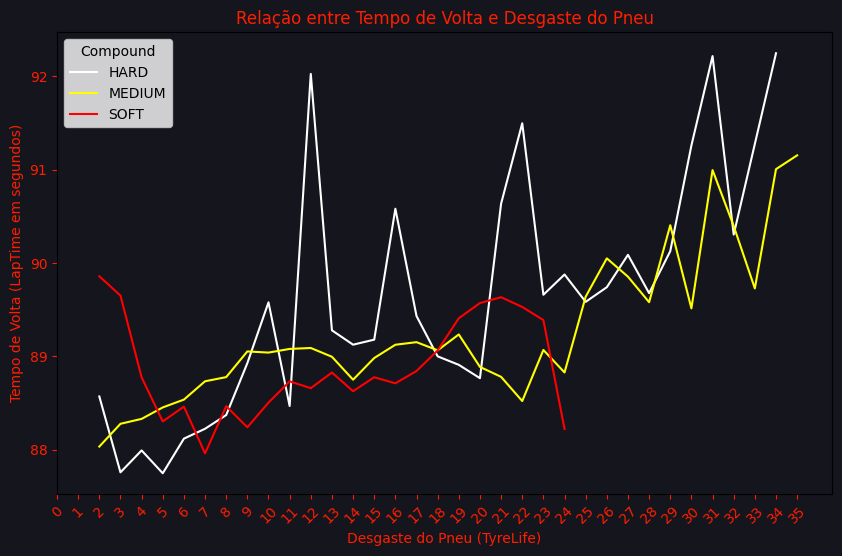

O ponto ideal do composto HARD, o pneu tinha dado 5 voltas e o tempo médio foi de 87.746 segundos.
O ponto ideal do composto MEDIUM, o pneu tinha dado 2 voltas e o tempo médio foi de 88.03212500000001 segundos.
O ponto ideal do composto SOFT, o pneu tinha dado 7 voltas e o tempo médio foi de 87.95917647058823 segundos.


In [193]:
def laptime_and_tyrelife_analysis_all_drivers_mean(df, year, country):
    # Aqui buscamos apenas voltas que não sejam a primeira volta da corrida e voltas que não sejam a primeira volta de determinado tipo de pneu, pois a primeira volta do pneu é bem mais lenta, pois inclui o tempo do pitsop (troca de pneu)
    df = df.loc[(df['Year'] == year) & (df['Country'] == country) & (df['LapNumber'] != 1) & (df['TyreLife'] != 1) & (df['PitStopBool'] == False)]
    
    # Limpando os outliers com a função que criamos anteriormente
    df = remove_outliers_by_laptime(df)

    # Agrupando a média da coluna LapTime por composto e vida do pneu
    tyre_life_analysis = df.groupby(['Compound', 'TyreLife'])['LapTime'].mean().reset_index()

    # Plotando o gráfico
    plt.figure(figsize=(10, 6), facecolor='#15151E')
    sns.lineplot(data=tyre_life_analysis, x='TyreLife', y='LapTime', hue='Compound', palette=['White', 'Yellow', 'Red'])
    plt.title('Relação entre Tempo de Volta e Desgaste do Pneu', color='#FF1E00')
    plt.xlabel('Desgaste do Pneu (TyreLife)', color='#FF1E00')
    plt.ylabel('Tempo de Volta (LapTime em segundos)', color='#FF1E00')
    x_ticks = np.arange(0, tyre_life_analysis['TyreLife'].max() + 1, 1)  # Define ticks de 1 em 1
    plt.xticks(x_ticks, rotation=45)
    ax = plt.gca()  # Acessa o eixo atual
    ax.tick_params(axis='x', colors='#FF1E00')  # Cor dos números do eixo X
    ax.tick_params(axis='y', colors='#FF1E00')   # Cor dos números do eixo Y
    ax.set_facecolor('#15151E')  # Define a cor de fundo (usando uma cor hexadecimal)
    plt.show()

    # Selecionando a volta
    optimal_point = tyre_life_analysis.loc[tyre_life_analysis.groupby('Compound')['LapTime'].idxmin()]
    for index, row in optimal_point.iterrows():
        print(f'O ponto ideal do composto {row["Compound"]}, o pneu tinha dado {str(int(row["TyreLife"]))} voltas e o tempo médio foi de {row["LapTime"]} segundos.')
laptime_and_tyrelife_analysis_all_drivers_mean(df, 2022, 'Spain')

/tmp/ipykernel_1621/2513310175.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsLapTimeOutlier'] = df.apply(lambda row: row['LapTime'] > LIMITE_SUPERIOR[row['Compound']], axis=1)
/tmp/ipykernel_1621/1920529561.py:10: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=df, x='TyreLife', y='LapTime', hue='Compound', palette=['Red', 'Yellow', 'White'])


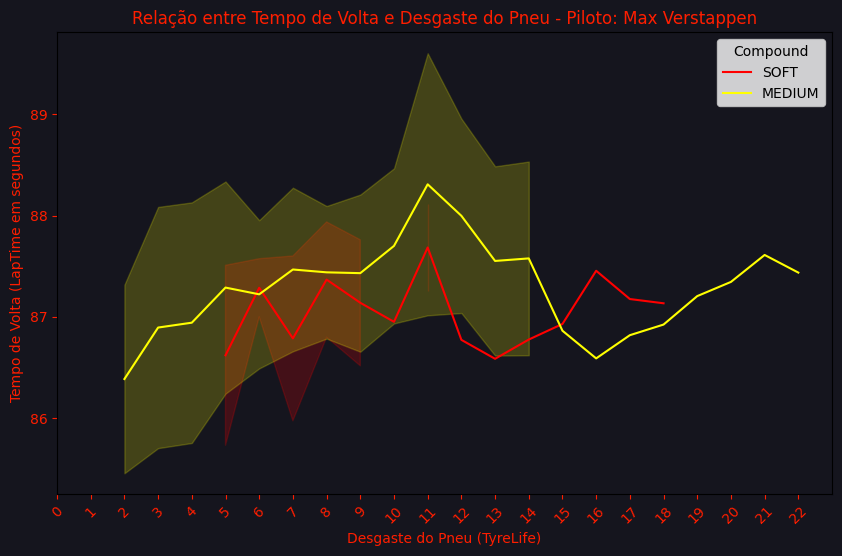

O ponto ideal do composto MEDIUM, o pneu tinha dado 2 voltas e o tempo médio foi de 85.456 segundos.
O ponto ideal do composto SOFT, o pneu tinha dado 5 voltas e o tempo médio foi de 85.732 segundos.


In [194]:
def laptime_and_tyrelife_analysis_driver(df, year, country, driver):
    # Aqui buscamos apenas voltas que não sejam a primeira volta da corrida e voltas que não sejam a primeira volta de determinado tipo de pneu, pois a primeira volta do pneu é bem mais lenta, pois inclui o tempo do pitsop (troca de pneu)
    df = df.loc[(df['Year'] == year) & (df['Country'] == country) & (df['LapNumber'] != 1) & (df['TyreLife'] != 1) & (df['FullName'] == driver) & (df['PitStopBool'] == False)]

    # Limpando os outliers com a função que criamos anteriormente
    df = remove_outliers_by_laptime(df)

    # Plotando o gráfico
    plt.figure(figsize=(10, 6), facecolor='#15151E')
    sns.lineplot(data=df, x='TyreLife', y='LapTime', hue='Compound', palette=['Red', 'Yellow', 'White'])
    plt.title('Relação entre Tempo de Volta e Desgaste do Pneu - Piloto: ' + driver, color='#FF1E00')
    plt.xlabel('Desgaste do Pneu (TyreLife)', color='#FF1E00')
    plt.ylabel('Tempo de Volta (LapTime em segundos)', color='#FF1E00')
    x_ticks = np.arange(0, df['TyreLife'].max() + 1, 1)  # Define ticks de 1 em 1
    plt.xticks(x_ticks, rotation=45)
    ax = plt.gca()  # Acessa o eixo atual
    ax.tick_params(axis='x', colors='#FF1E00')  # Cor dos números do eixo X
    ax.tick_params(axis='y', colors='#FF1E00')   # Cor dos números do eixo Y
    ax.set_facecolor('#15151E')  # Define a cor de fundo (usando uma cor hexadecimal)
    plt.show()

    # Selecionando a volta
    optimal_point = df.loc[df.groupby('Compound')['LapTime'].idxmin()]
    for index, row in optimal_point.iterrows():
        print(f'O ponto ideal do composto {row["Compound"]}, o pneu tinha dado {str(int(row["TyreLife"]))} voltas e o tempo médio foi de {row["LapTime"]} segundos.')
laptime_and_tyrelife_analysis_driver(df, 2022, 'Spain', 'Max Verstappen')

### Gráfico contínuo de LapTime x LapNumber do piloto vencedor de determinada corrida

In [195]:
def plot_laptime_with_tyre_changes(df, year, country):
    # Dicionário com as cores dos pneus
    compound_colors = {
        'SOFT': '#da291c',
        'MEDIUM': '#ffd12e',
        'HARD': '#f0f0ec',
        'INTERMEDIATE': '#43b02a',
        'WET': '#0067ad'
    }

    # Filtrar o DataFrame para o ano e país fornecido
    race_data = df[(df['Year'] == year) & (df['Country'] == country)]

    # Pegar o vencedor da corrida (assumindo que 'FinalPosition' == 1 é o vencedor)
    winner_data = race_data[race_data['FinalPosition'] == 1]

    # Ordenar os dados por número de volta (LapNumber)
    winner_data = winner_data.sort_values(by='LapNumber')

    # Preparar a figura e o eixo
    fig, ax = plt.subplots(figsize=(16, 9), facecolor='#15151E')

    # Inicializar a variável para armazenar o ponto de início da linha
    previous_lap = winner_data.iloc[0]['LapNumber']
    previous_lap_time = winner_data.iloc[0]['LapTime']
    previous_compound = winner_data.iloc[0]['Compound']

    # Loop sobre as voltas do vencedor e plotar com a cor de cada pneu
    for idx, row in winner_data.iterrows():
        lap_number = row['LapNumber']
        lap_time = row['LapTime']
        compound = row['Compound']

        # Se o composto mudou, desenhar um segmento da linha
        if compound != previous_compound:
            # Plotar a linha com o composto anterior
            ax.plot(
                [previous_lap, lap_number],
                [previous_lap_time, lap_time],
                color=compound_colors[previous_compound],
                linewidth=2
            )

            # Atualizar o composto anterior
            previous_compound = compound
        else:
            # Plotar a linha se o composto for o mesmo
            ax.plot(
                [previous_lap, lap_number],
                [previous_lap_time, lap_time],
                color=compound_colors[compound],
                linewidth=2
            )

        # Atualizar o ponto anterior para a próxima iteração
        previous_lap = lap_number
        previous_lap_time = lap_time
    
    # Detalhar o eixo X com mais marcações
    max_lap = int(winner_data['LapNumber'].max())
    ax.set_xticks(range(0, max_lap + 1, 1))  # Define marcações a cada volta
    # Adicionar rótulos e título ao gráfico
    plt.title(f'{year} - {country} Grand Prix - Lap Times of the Winner: {winner_data.iloc[0]['FullName']}', color='#FF1E00')
    plt.xlabel('Lap Number', color='#FF1E00')
    plt.ylabel('Lap Time (s)', color='#FF1E00')
    plt.xticks(rotation=75)
    # Personalizar o gráfico (cor dos eixos e fundo)
    ax.tick_params(axis='x', colors='#FF1E00')
    ax.tick_params(axis='y', colors='#FF1E00')
    ax.set_facecolor('#15151E')
    # Definir os intervalos do eixo Y e formatar os rótulos
    min_time = winner_data['LapTime'].min()
    max_time = winner_data['LapTime'].max()

    ax.set_yticks(range(int(min_time), int(max_time) + 1, 1))  # Ajustar o intervalo conforme necessário

    # Remover as bordas superiores e direitas do gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Exibir o gráfico
    plt.show()

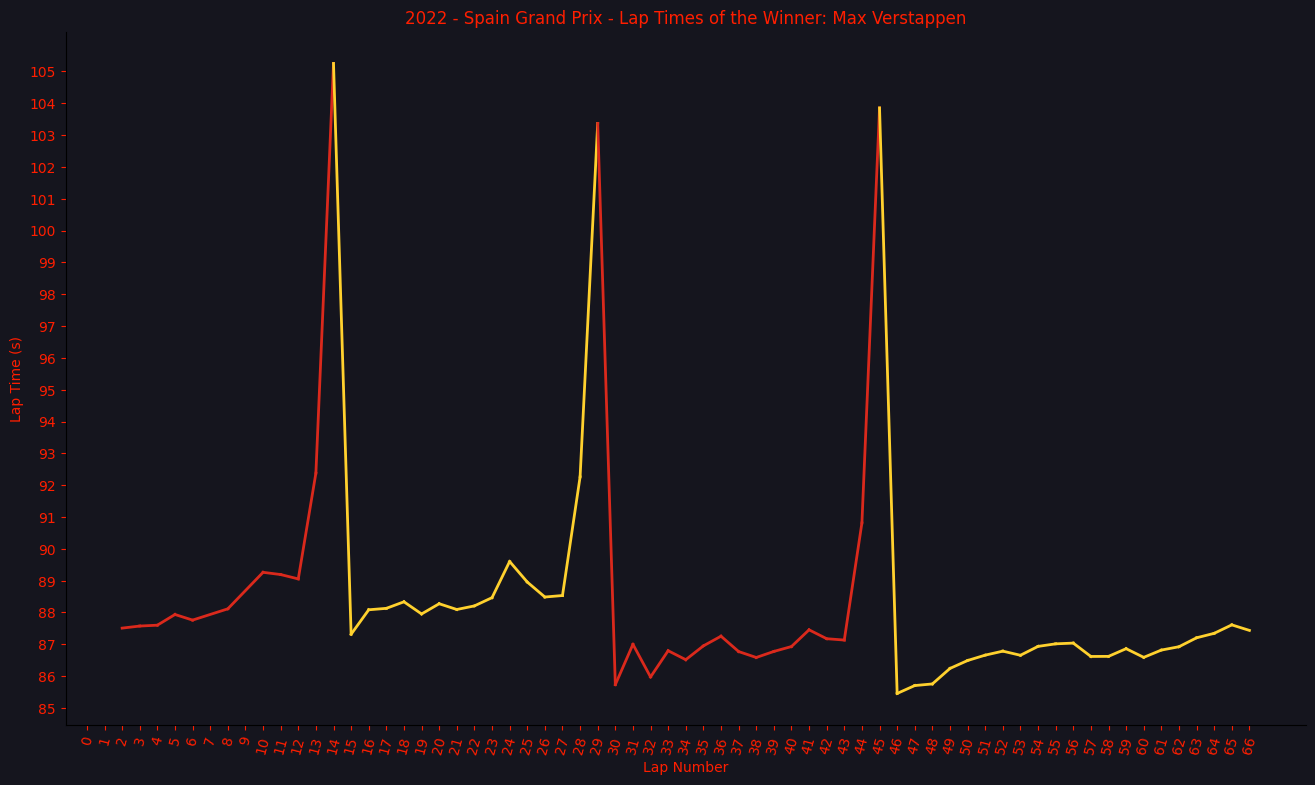

In [196]:
plot_laptime_with_tyre_changes(df, 2022, 'Spain')

### Gráfico de barras segmentado dos pilotos baseado no Stint

In [396]:
def get_tyre_strategy_by_year_and_country(df, year, country):
    # Dicionario com as cores possiveis dos pneus
    compound_colors = {
        'SOFT': '#da291c',
        'MEDIUM': '#ffd12e',
        'HARD': '#f0f0ec',
        'INTERMEDIATE': '#43b02a',
        'WET': '#0067ad'
    }

    df = df.loc[(df['Year'] == year) & (df['Country'] == country)]
    drivers = df.loc[(df['Year'] == year) & (df['Country'] == country)].sort_values('FinalPosition')['FullName'].unique()
    stints = df[["FullName", "Stint", "Compound", "LapNumber"]]
    stints = stints.groupby(["FullName", "Stint", "Compound"])
    stints = stints.count().reset_index()
    stints = stints.rename(columns={"LapNumber": "StintLength"})
    fig, ax = plt.subplots(figsize=(12, 16), facecolor='#15151E')

    # Pegando o piloto campeão
    winner = df[df['FinalPosition'] == 1]['FullName'].iloc[0]
    second = df[df['FinalPosition'] == 2]['FullName'].iloc[0]
    third = df[df['FinalPosition'] == 3]['FullName'].iloc[0]

    # Pegando o piloto que mais ganhou posições
    position_changes = df.groupby('FullName').apply(lambda g: g['GridPosition'].iloc[0] - g['FinalPosition'].iloc[-1], include_groups=False)
    most_improved_driver = position_changes.idxmax()
    total_laps = int(df['LapNumber'].max())

    for driver in drivers:
        driver_stints = stints.loc[stints["FullName"] == driver]
        previous_stint_end = 0
        total_positions_gained = position_changes[driver]
        for idx, row in driver_stints.iterrows():
            if driver == winner:
                edge_color = '#d4af37'
            elif driver == second:
                edge_color = '#c0c0c0'
            elif driver == third:
                edge_color = '#cd7f32'
            elif driver == most_improved_driver:
                edge_color = 'purple'
            else:
                edge_color = 'black'
            # Rachura para o piloto que mais ganhou posições
            hatch = '//' if driver == most_improved_driver else None
            # each row contains the compound name and stint length
            # we can use these information to draw horizontal bars
            bars = plt.barh(
                y=driver,
                width=row["StintLength"],
                left=previous_stint_end,
                color=compound_colors[row['Compound']],
                edgecolor=edge_color,
                hatch=hatch,
                label=row['Compound'],
                fill=True
            )

            # Adicionar o texto com o número de voltas por stint dentro da barra
            ax.text(
                previous_stint_end + row["StintLength"] / 2,  # Posição centralizada dentro da barra
                driver,
                f'{row["StintLength"]} laps',
                va='center',  # Alinhamento vertical do texto
                ha='center',  # Alinhamento horizontal do texto
                color='black',
                fontsize=10
            )

            previous_stint_end += row["StintLength"]
    
        # Adicionar o texto com o total de posições ganhas ao lado da barra
        ax.text(
            previous_stint_end + 2,  # Ajuste para o posicionamento do texto
            driver,
            f'{total_positions_gained} pos.',
            va='center',  # Alinhamento vertical do texto
            color='white',
            fontsize=10
        )
    
    # Ajustar a cor do texto dos labels no eixo Y
    for label in ax.get_yticklabels():
        if label.get_text() == winner:
            label.set_color('#d4af37') 
        elif label.get_text() == second:
            label.set_color('#c0c0c0')
        elif label.get_text() == third:
            label.set_color('#cd7f32')
        elif label.get_text() == most_improved_driver:
            label.set_color('purple')
        else:
           label.set_color('#FF1E00')

    plt.title(f'{year} - {country} Grand Prix (Total Laps: {total_laps}) - Tyre Strategy',  color='#FF1E00')
    plt.xlabel("Lap Number",  color='#FF1E00')
    ax.tick_params(axis='x', colors='#FF1E00')  # Cor dos números do eixo X
    ax.set_facecolor('#15151E')  # Define a cor de fundo
    plt.grid(False)
   
    ax.set_xticks(range(0, total_laps + 1, 5))
    ax.invert_yaxis()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    import matplotlib.patches as mpatches

    tyre_legend = [
        mpatches.Patch(color=compound_colors['SOFT'], label='SOFT'),
        mpatches.Patch(color=compound_colors['MEDIUM'], label='MEDIUM'),
        mpatches.Patch(color=compound_colors['HARD'], label='HARD'),
        mpatches.Patch(color=compound_colors['INTERMEDIATE'], label='INTERMEDIATE'),
        mpatches.Patch(color=compound_colors['WET'], label='WET')
    ]

    tyre_legend_artist = ax.legend(handles=tyre_legend, title="Tyre Compounds", loc='upper left', bbox_to_anchor=(-0.15, 1.1))
    ax.add_artist(tyre_legend_artist)  # Adiciona a legenda dos pneus separadamente
    pilot_legend = [
        mpatches.Patch(color='#d4af37', label='Winner'),
        mpatches.Patch(color='#c0c0c0', label='2nd Place'),
        mpatches.Patch(color='#cd7f32', label='3rd Place'),
        mpatches.Patch(color='purple', label='Most Positions Gained')
    ]
    plt.legend(handles=pilot_legend, title="Driver Highlights", loc='upper left', bbox_to_anchor=(0.03, 1.1))


    plt.tight_layout()
    plt.show()

### Printando o gráfico para cada corrida em todos os anos
Esse gráfico apresenta informações sobre a estratégia de pneus e pitstops de todos os pilotos em determinada corrida

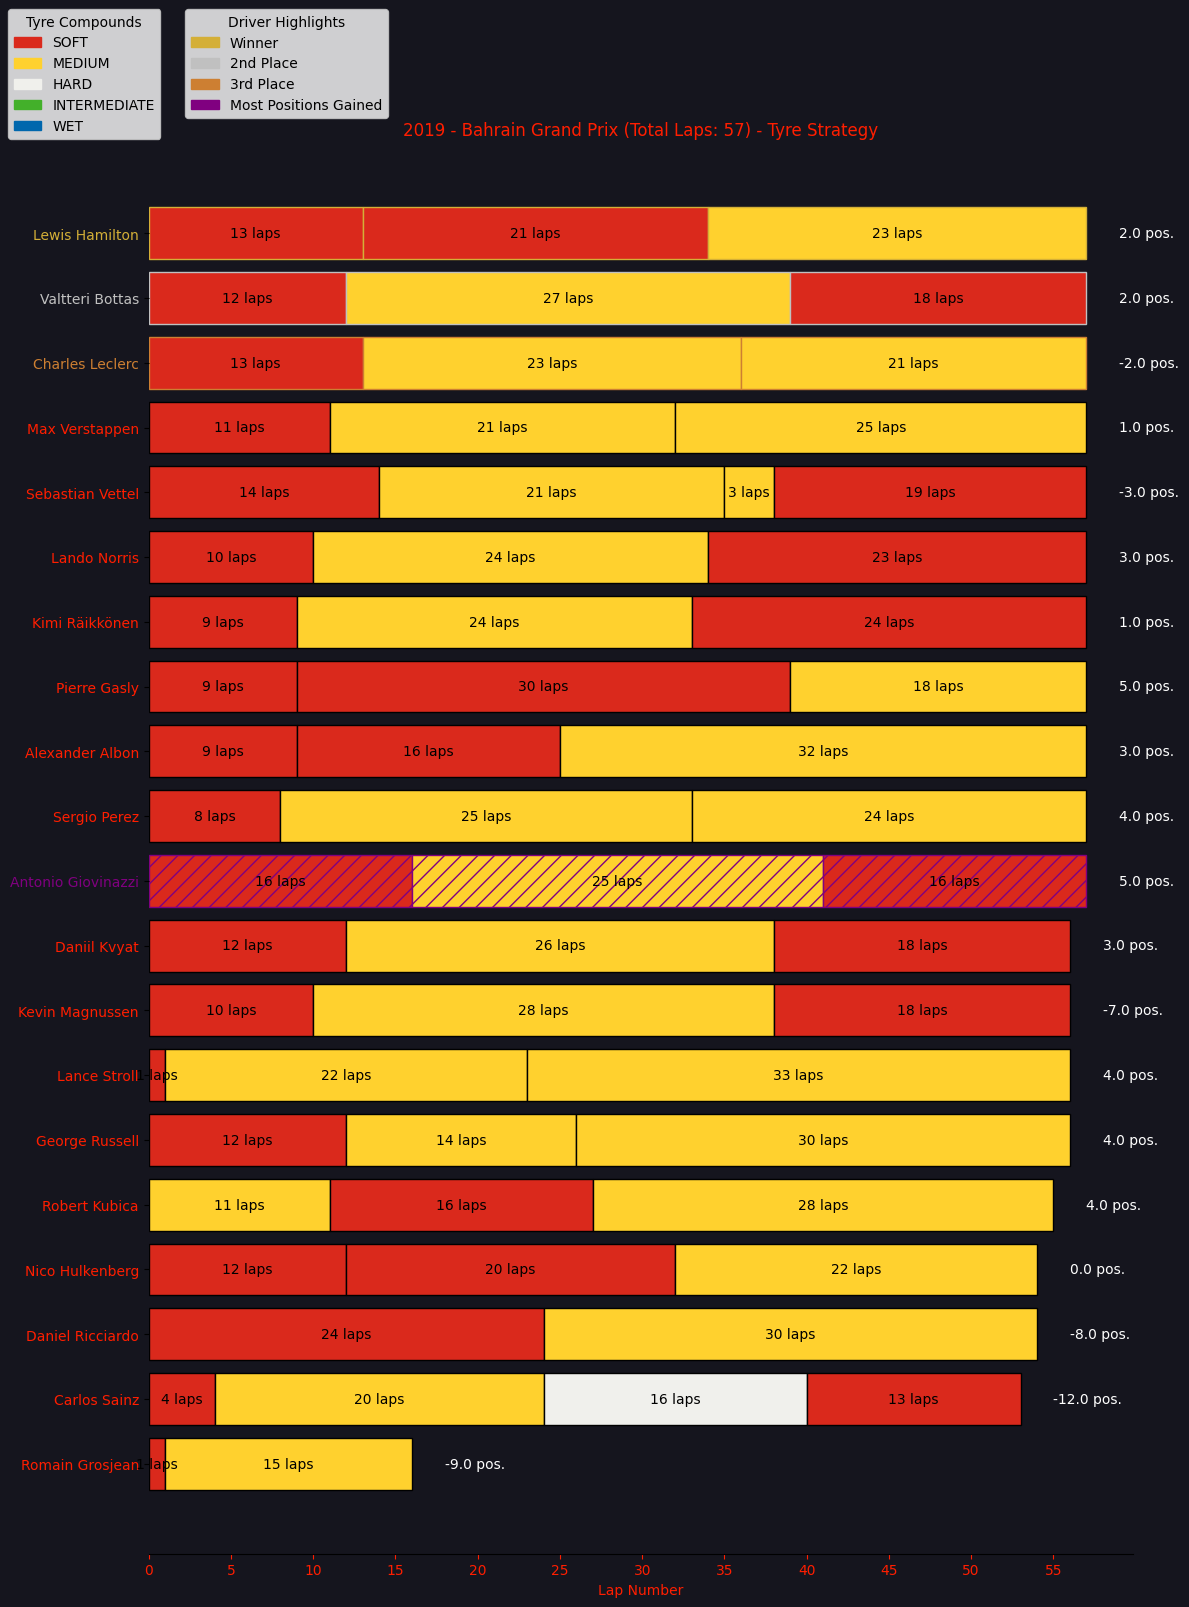

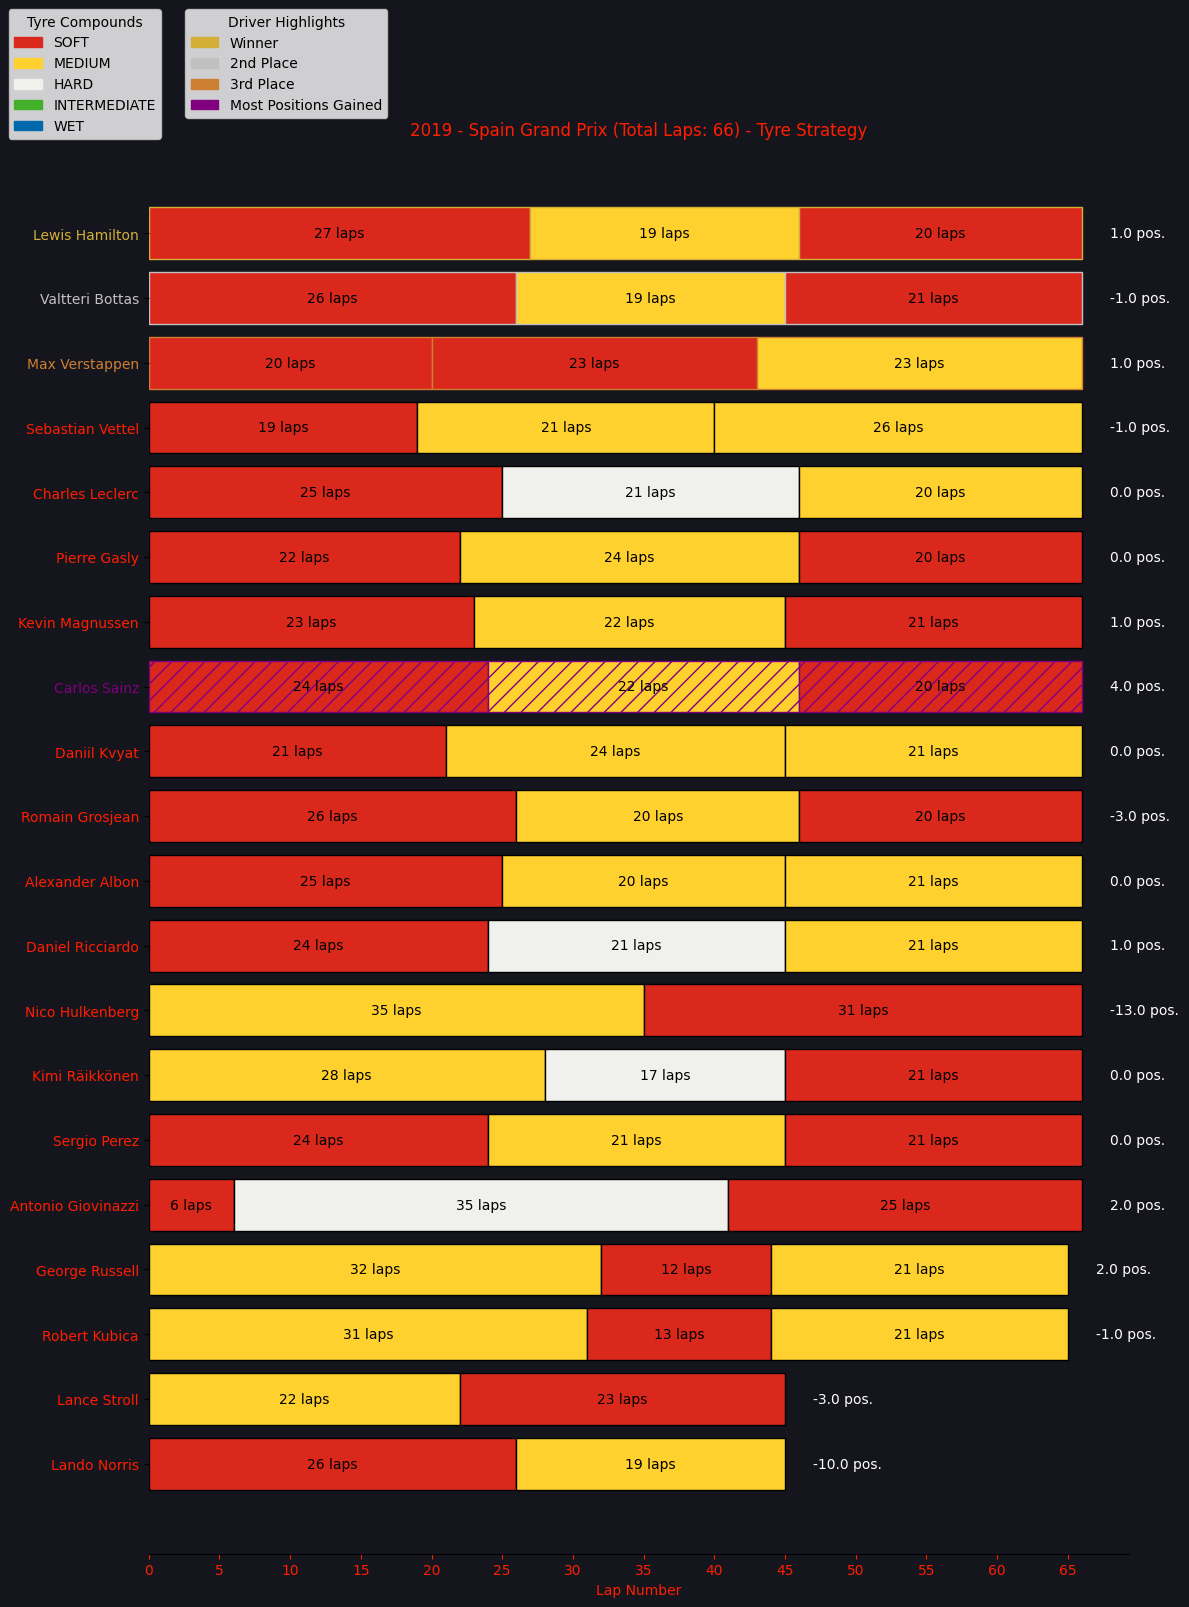

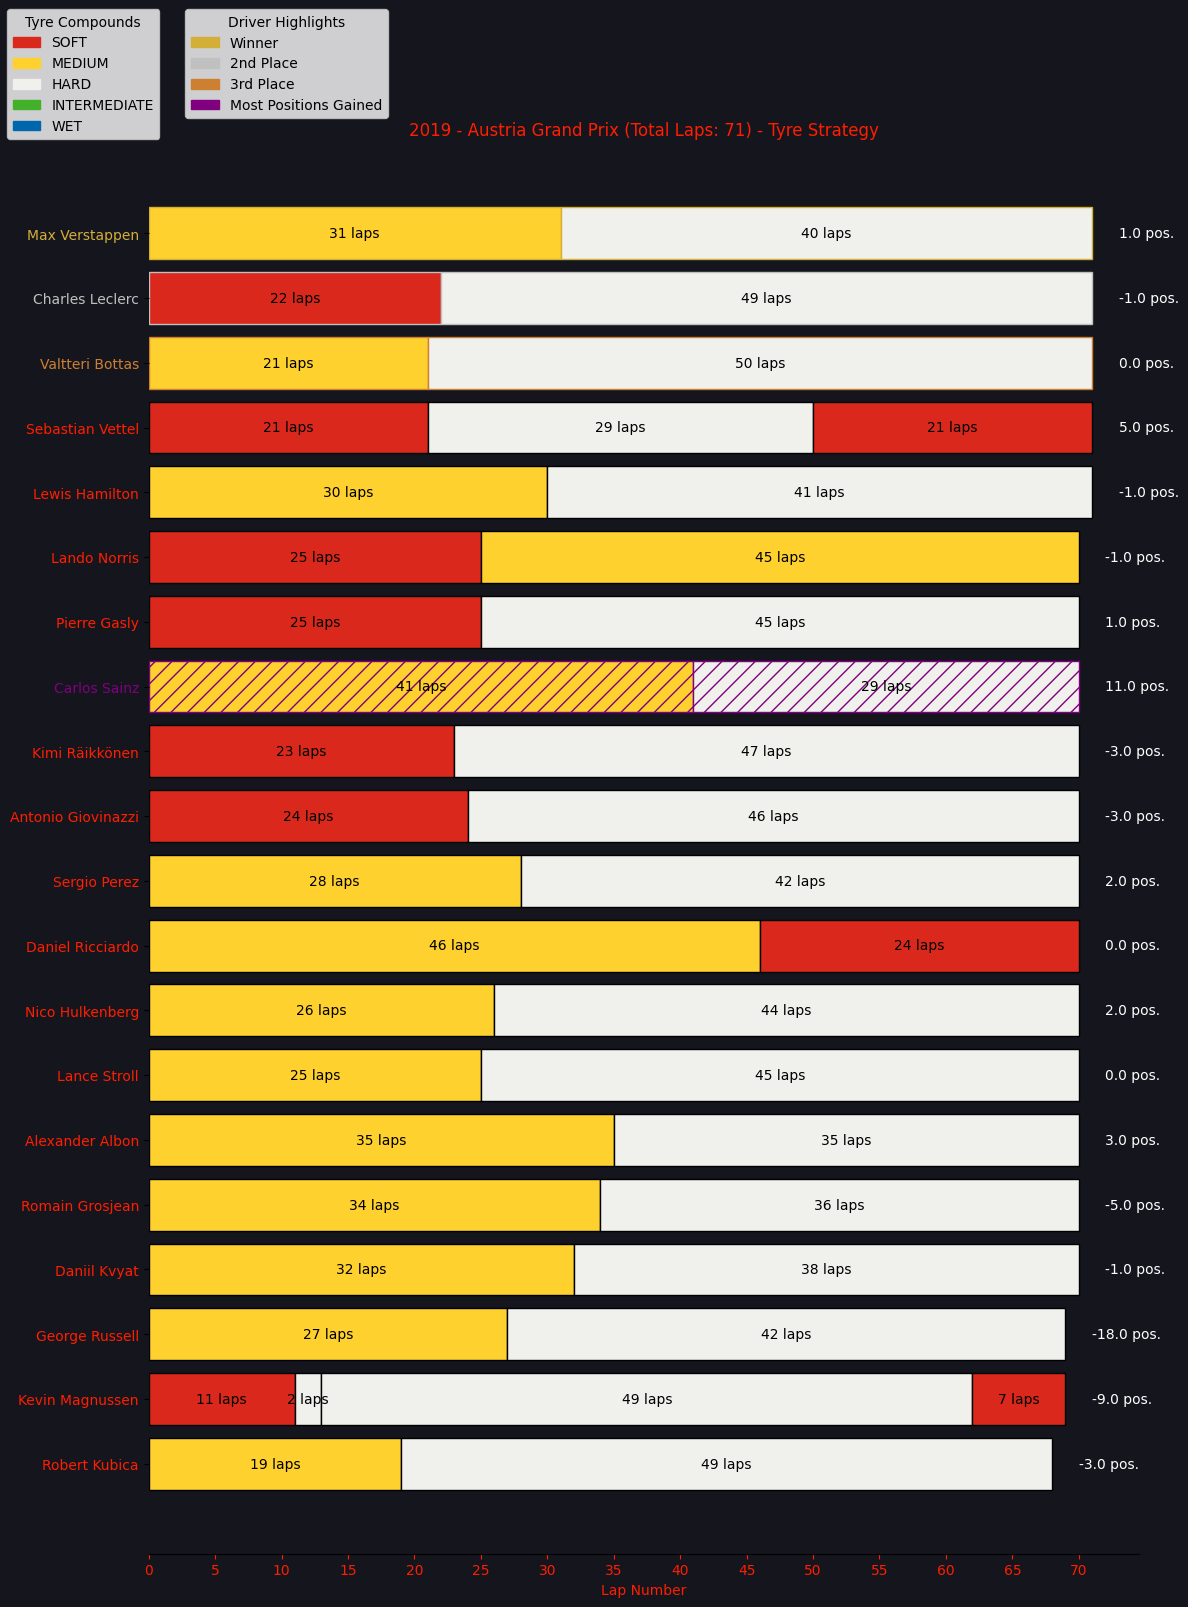

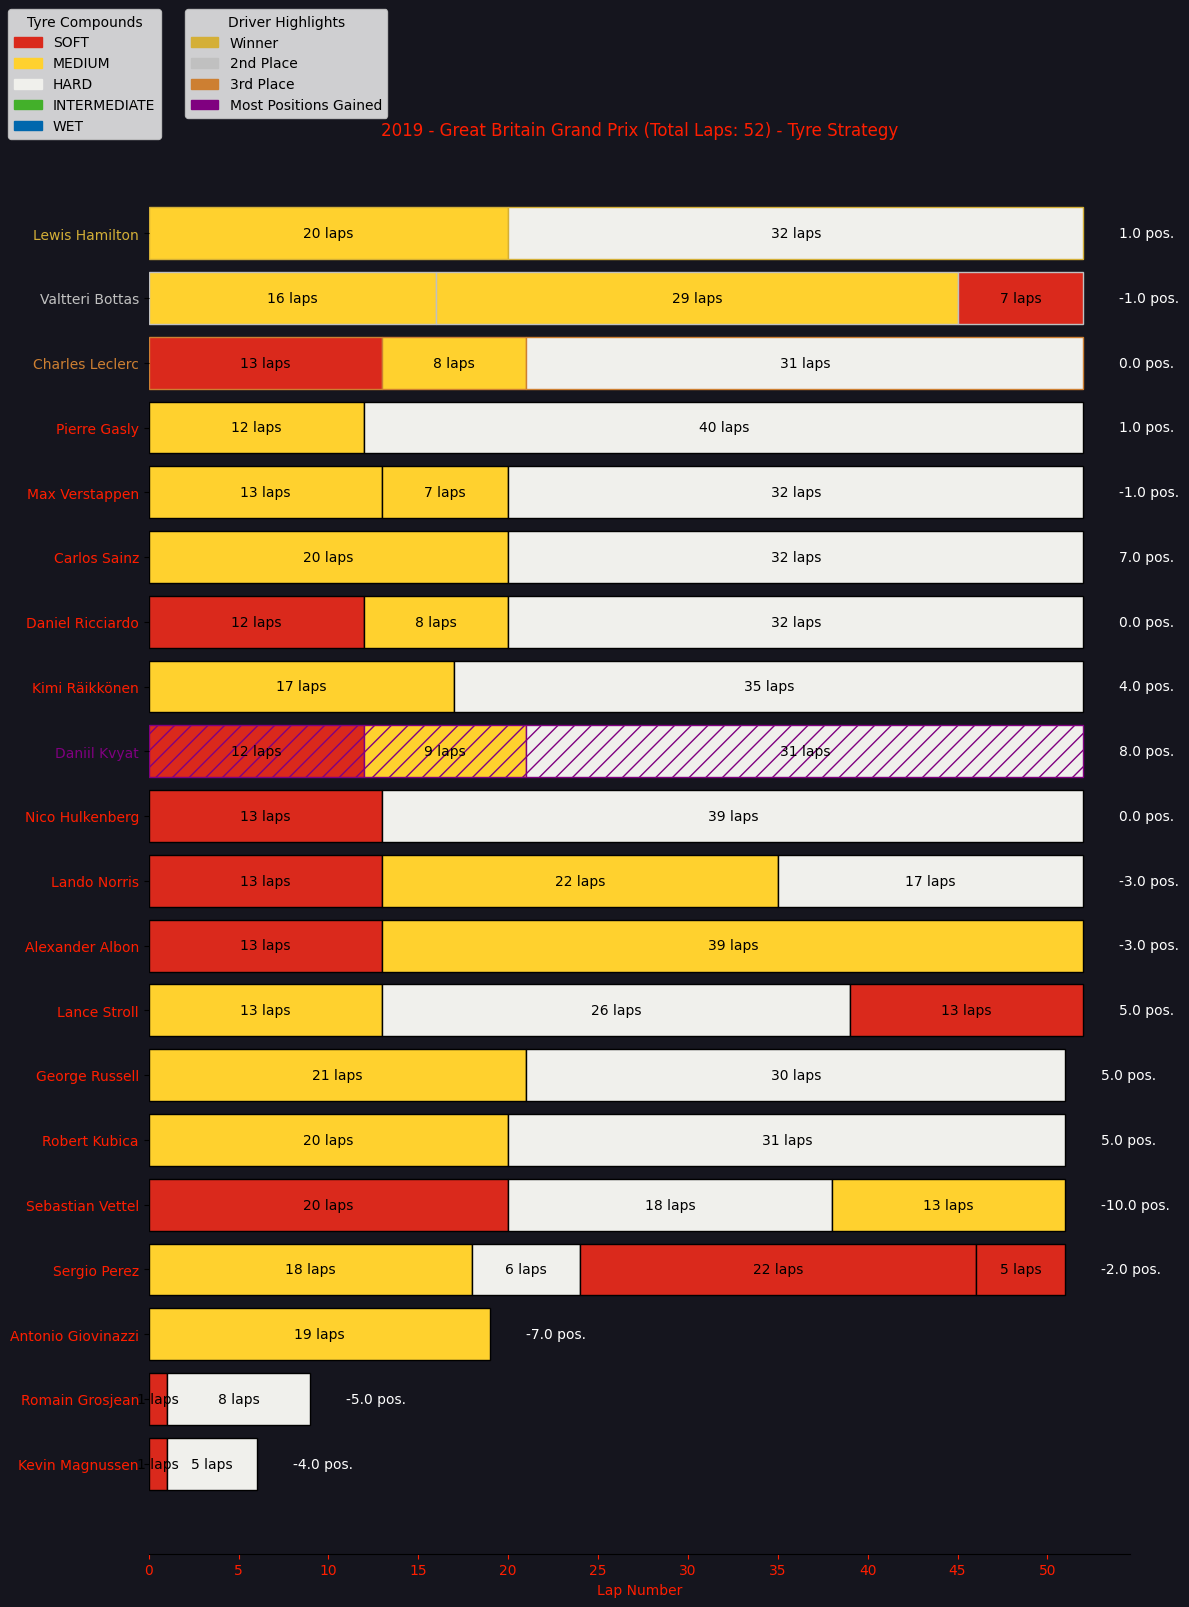

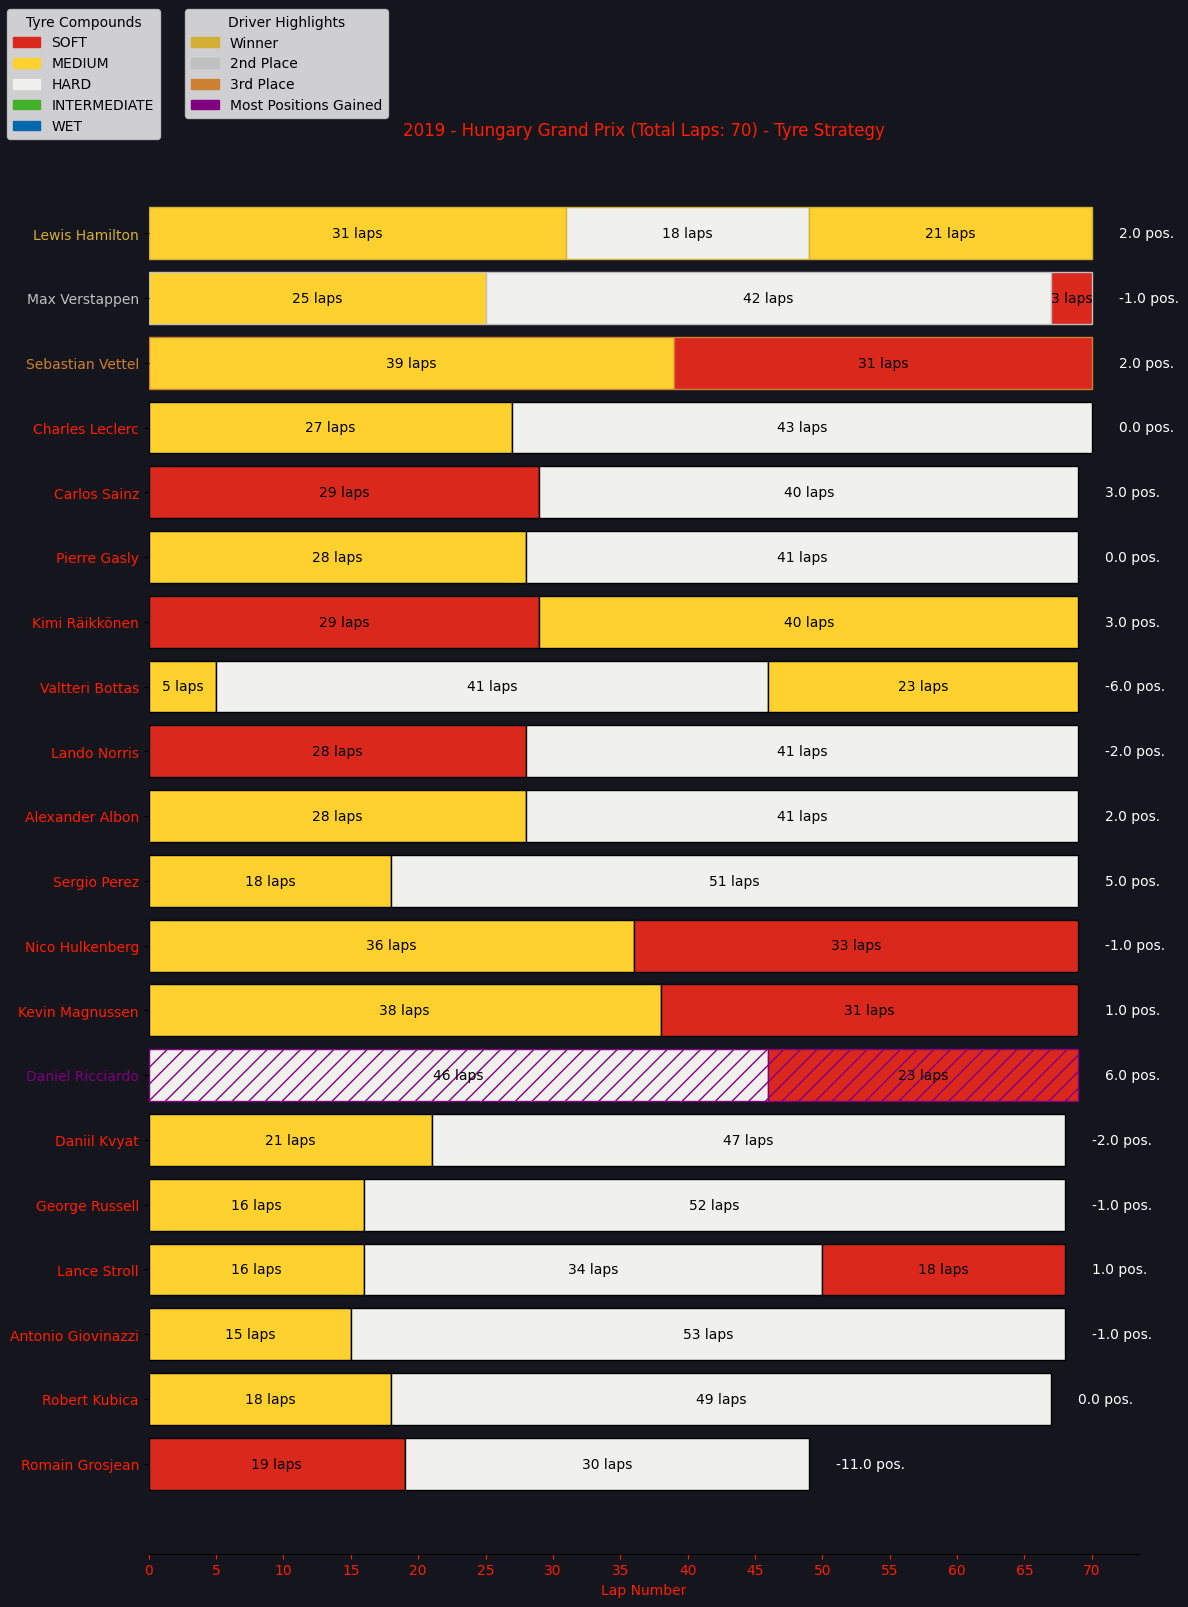

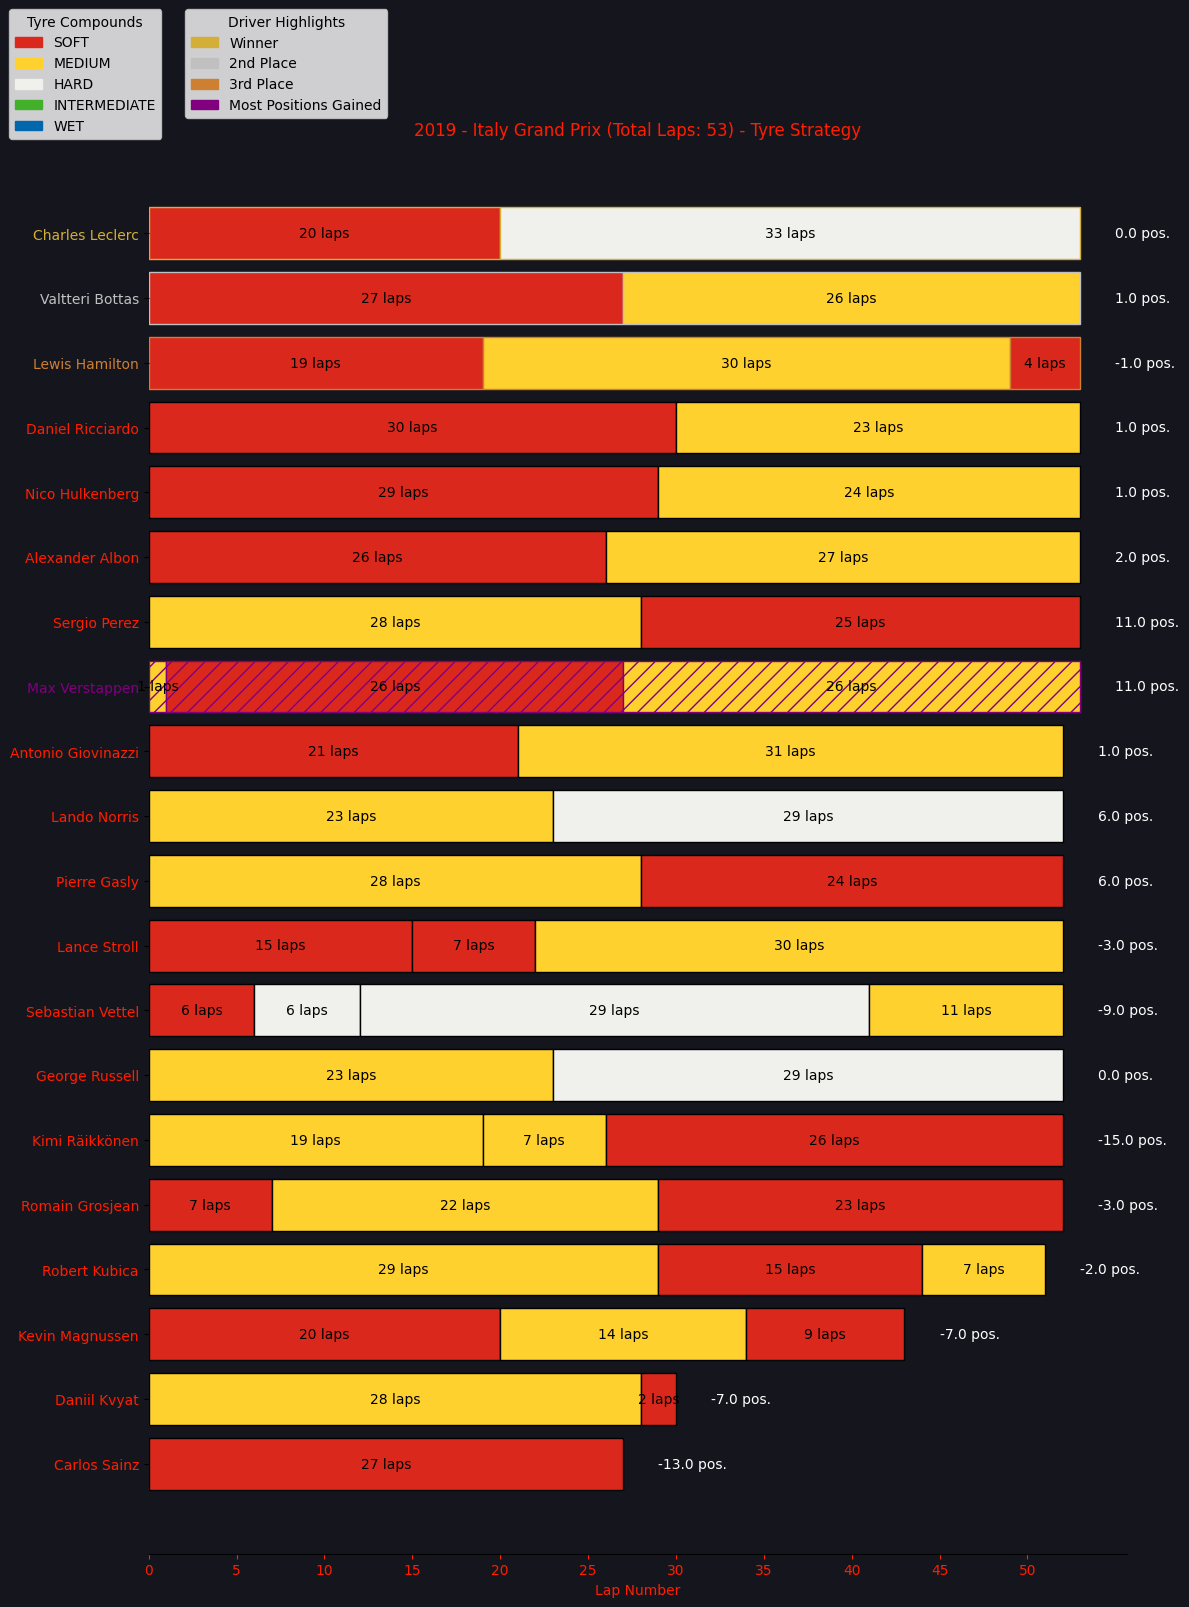

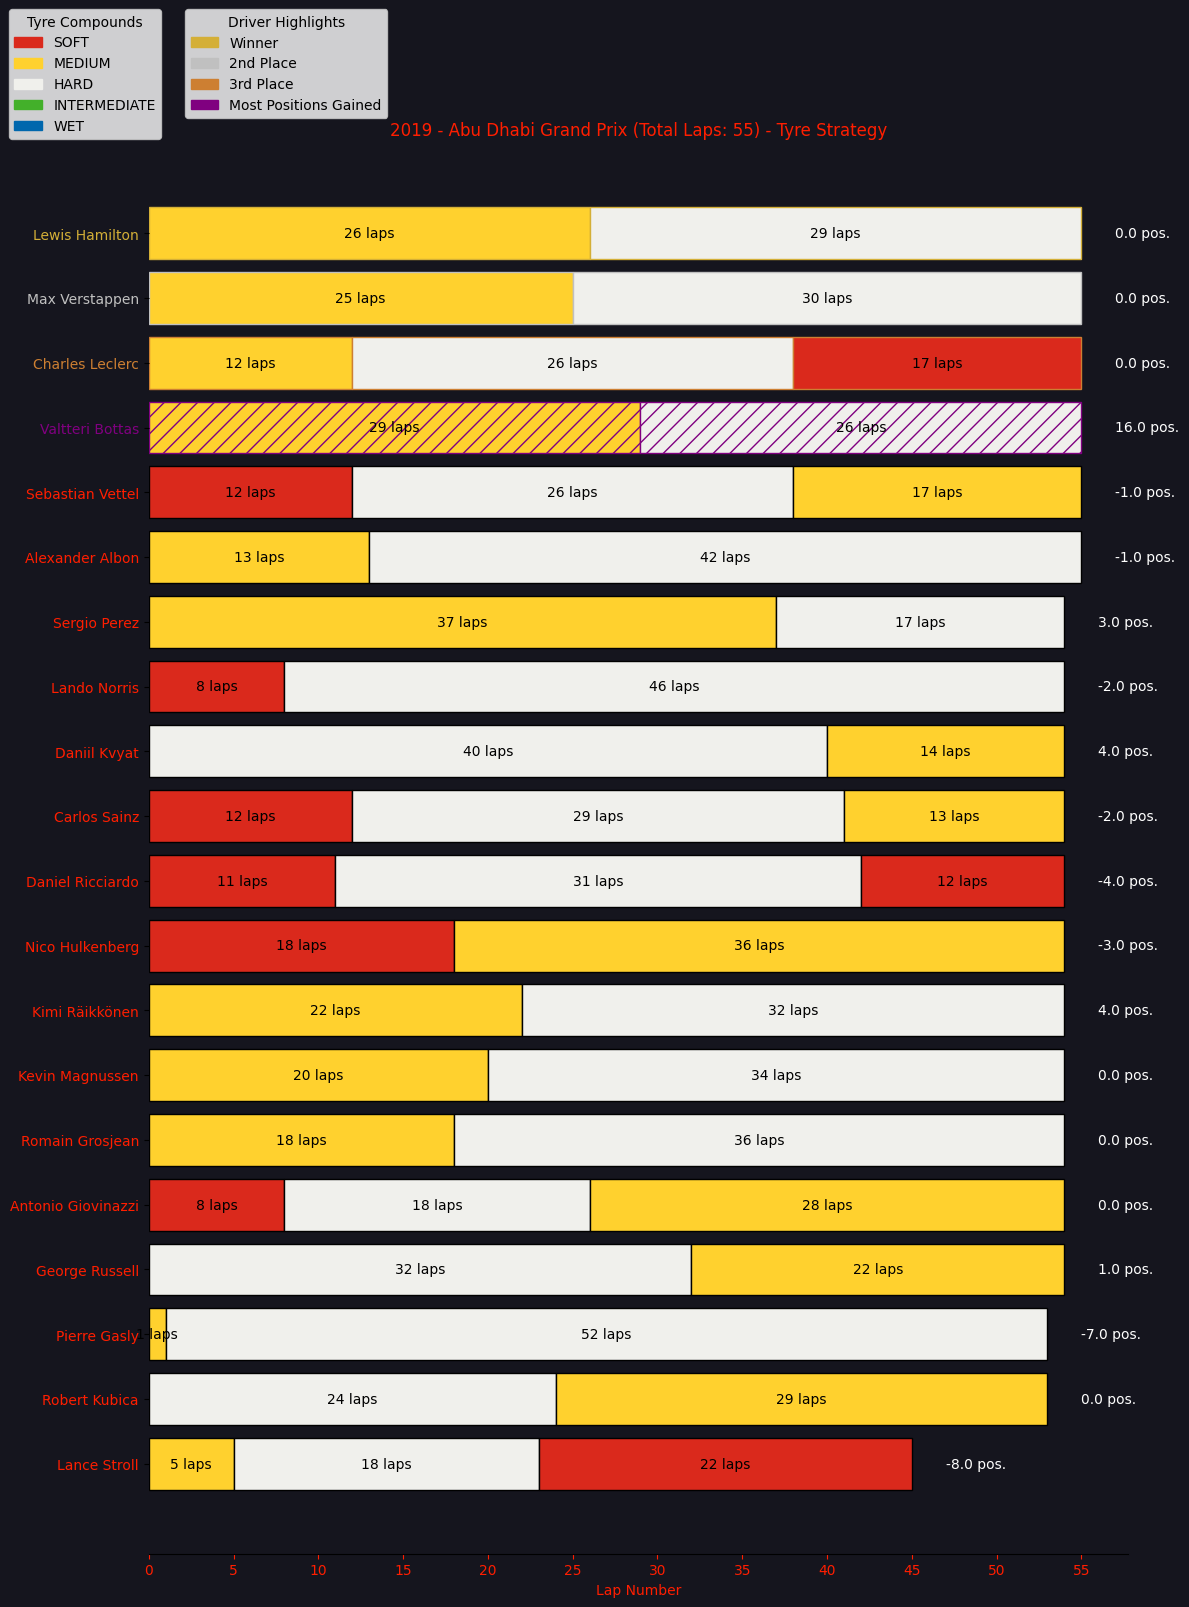

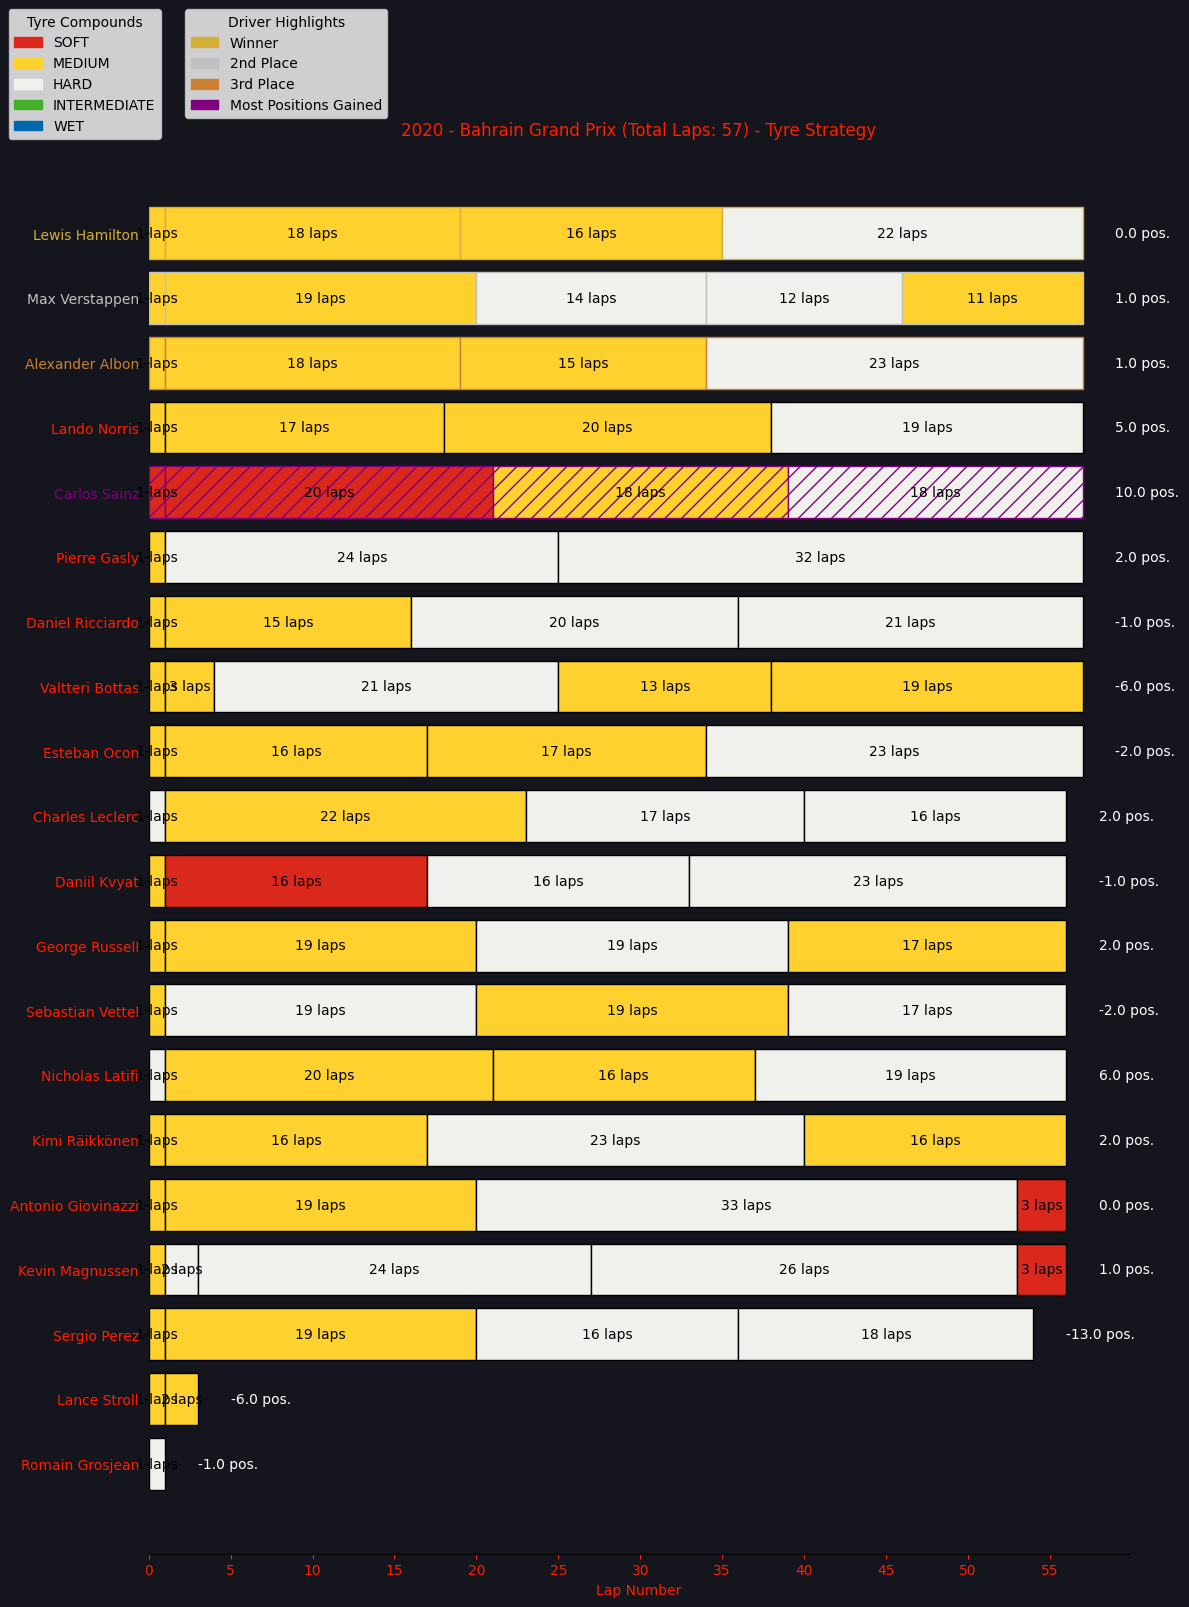

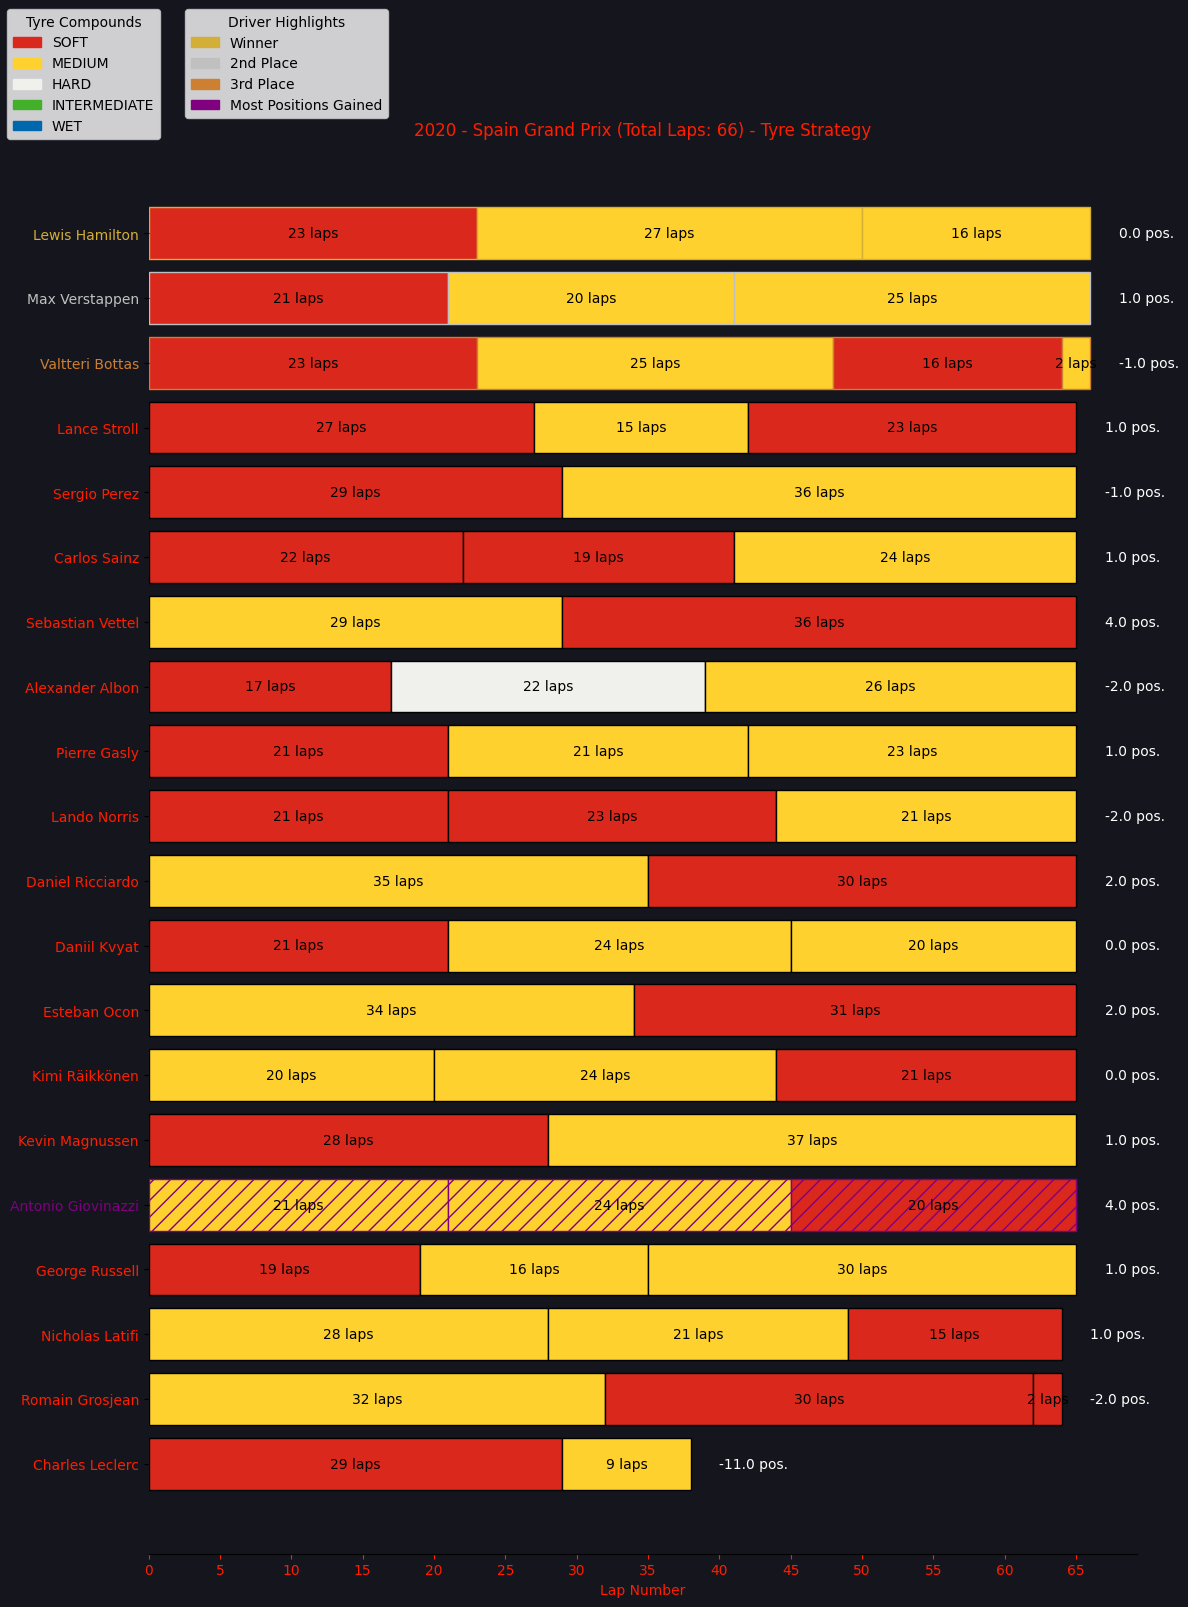

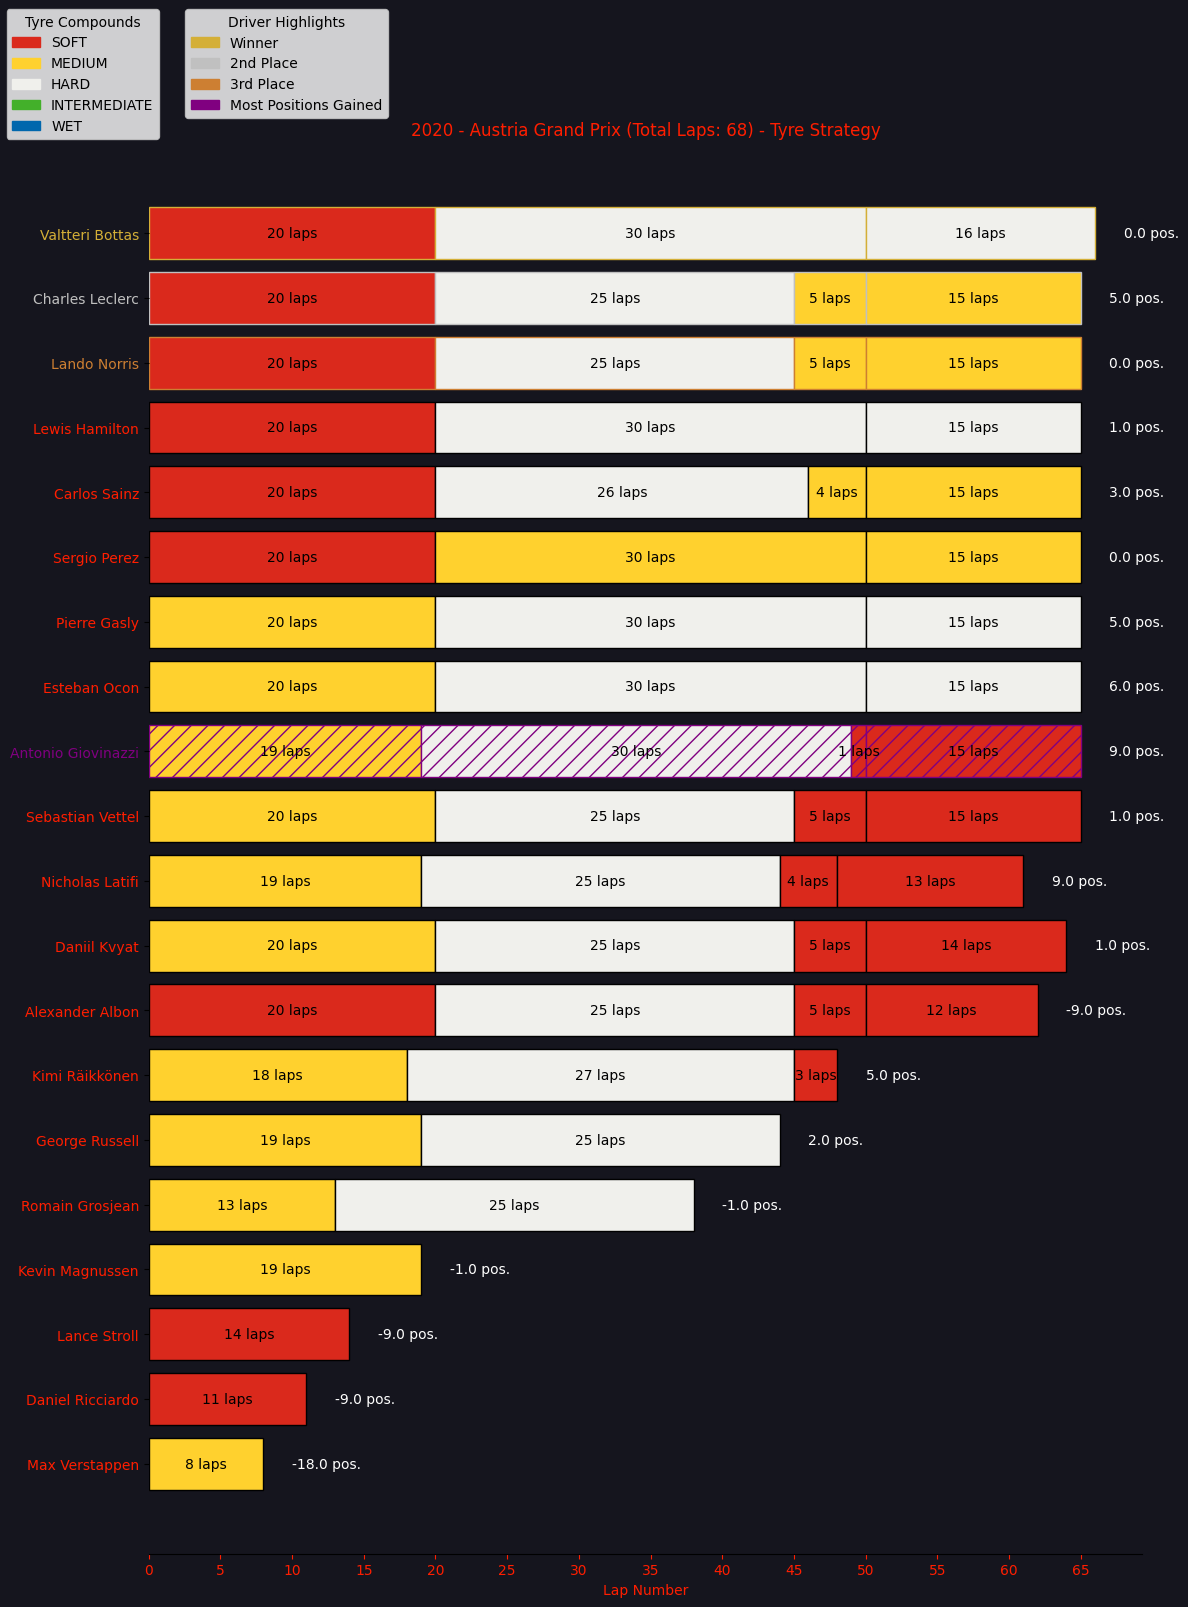

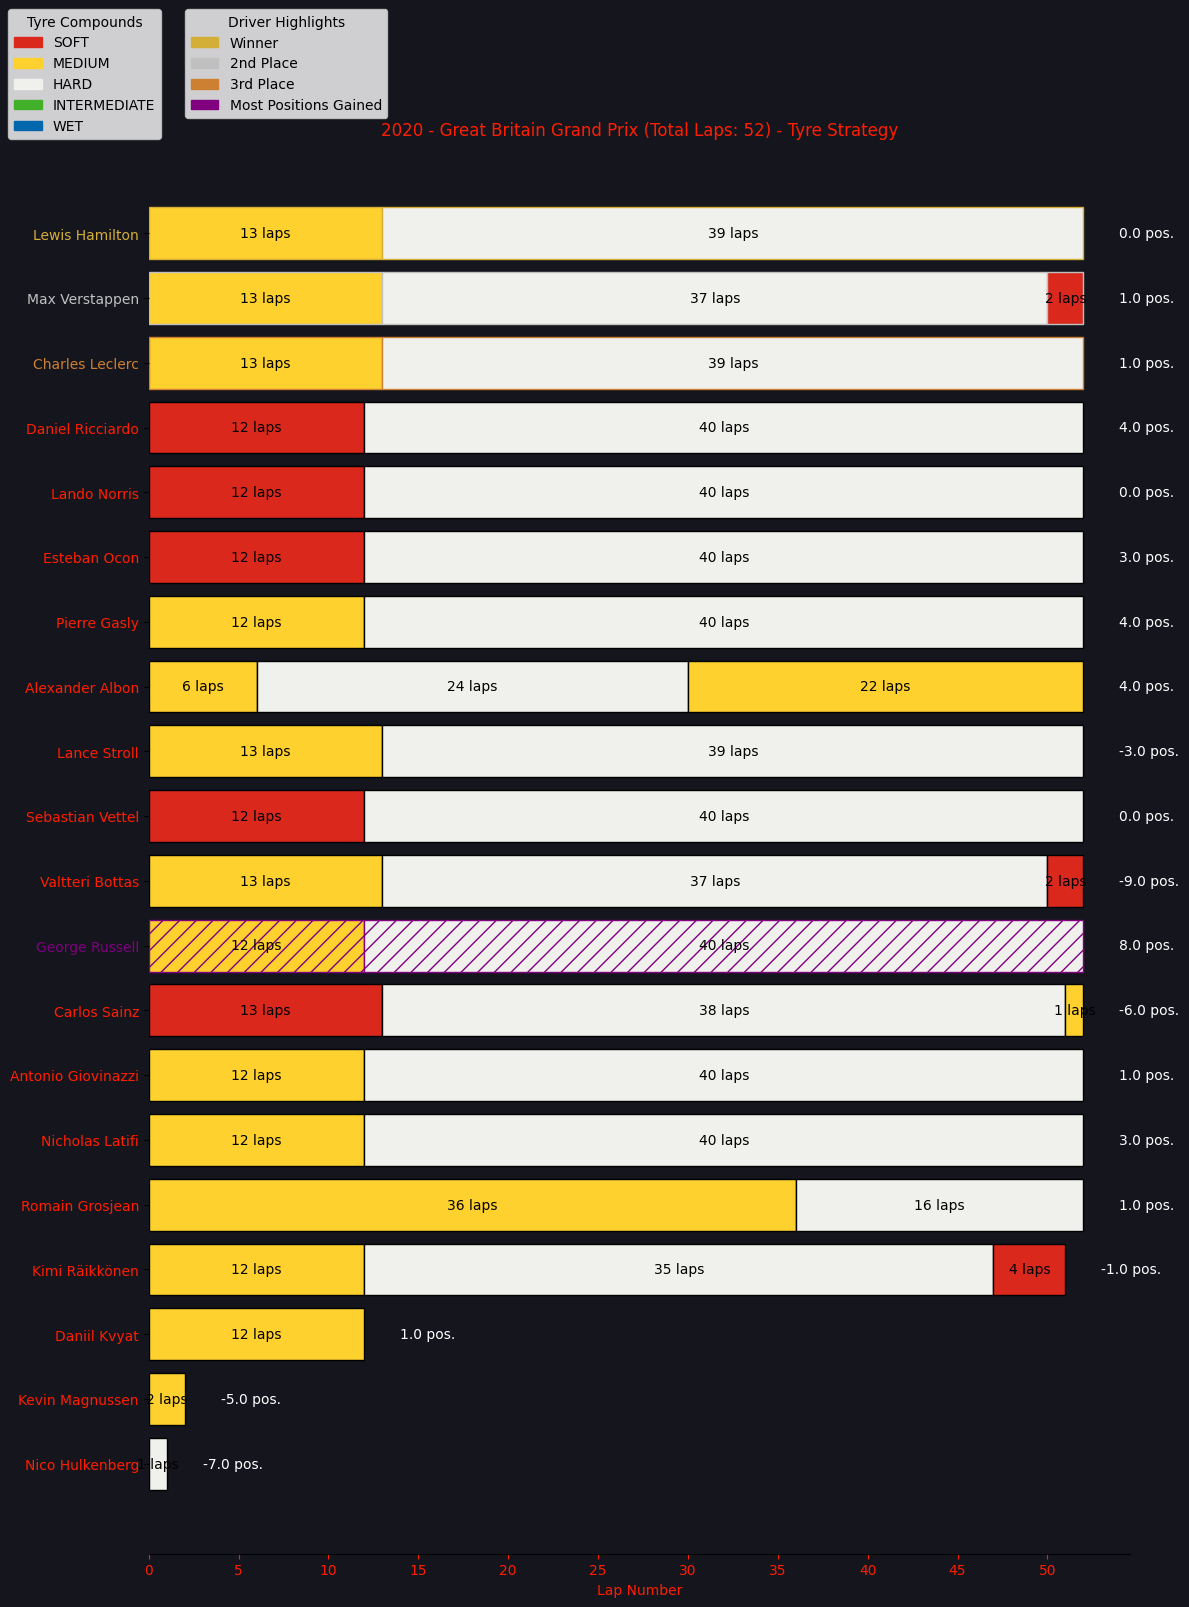

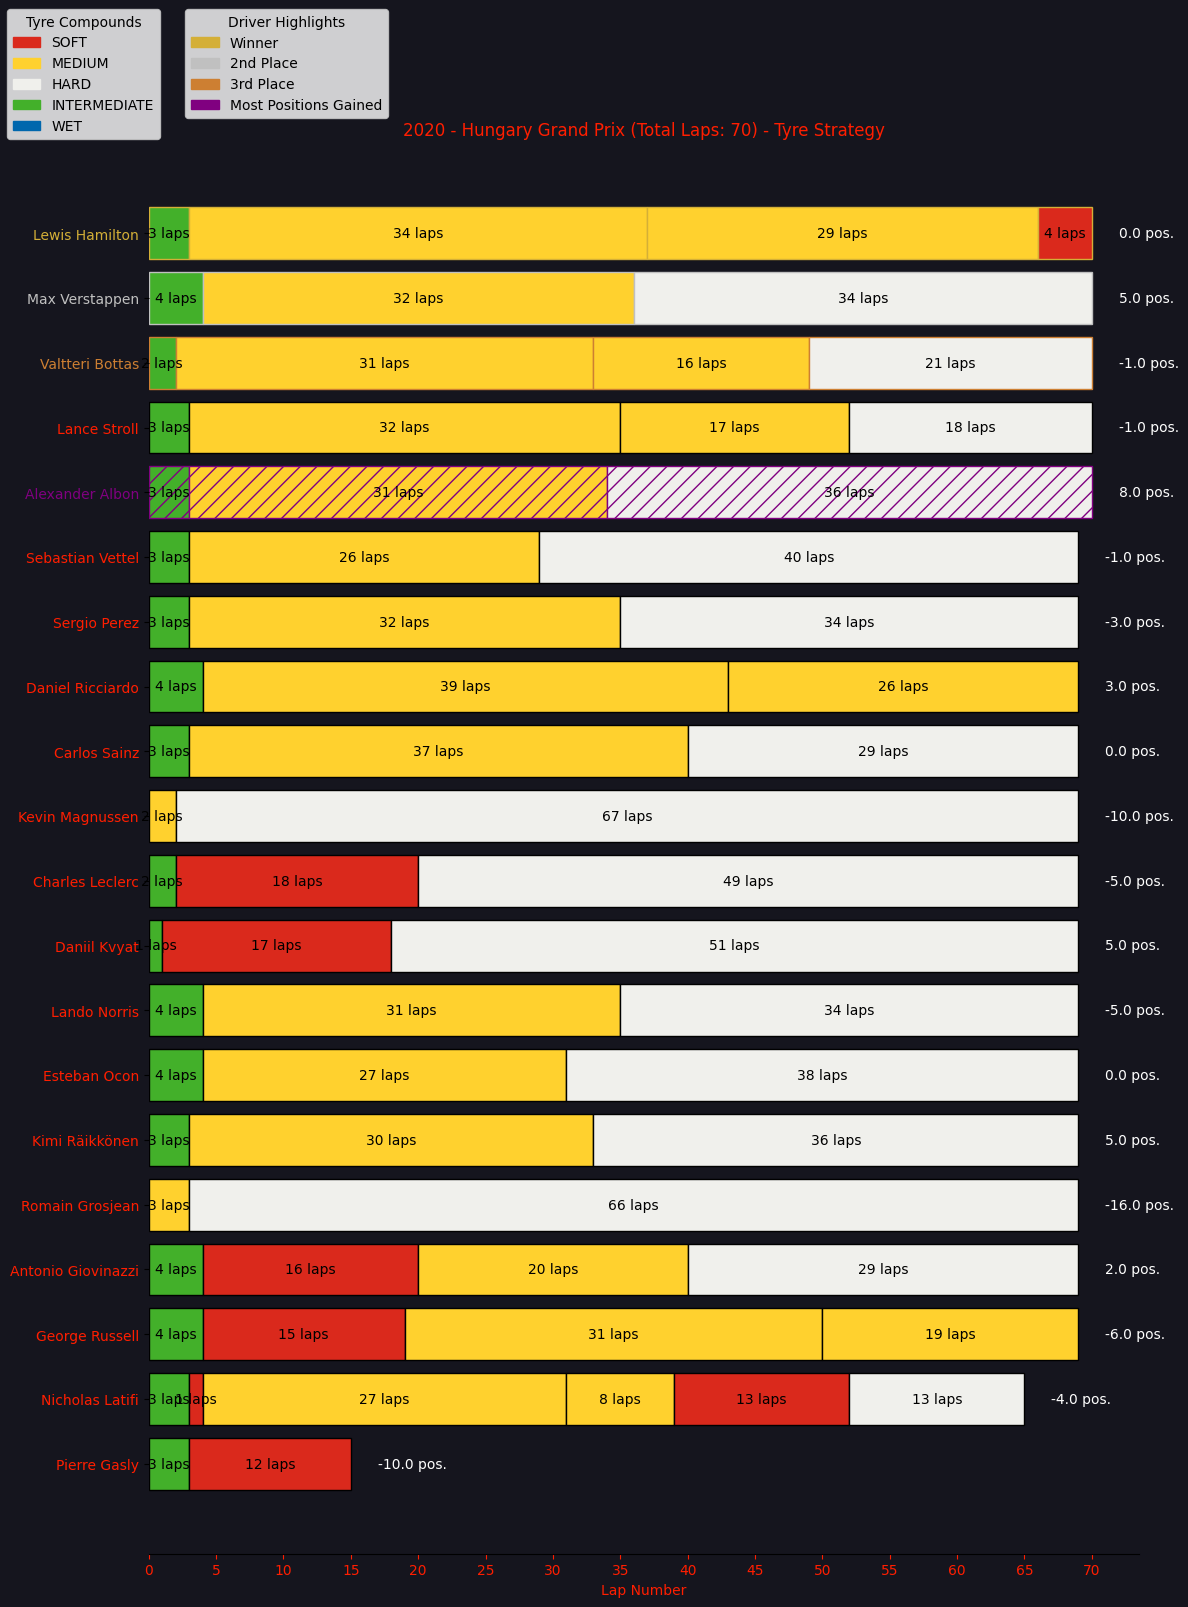

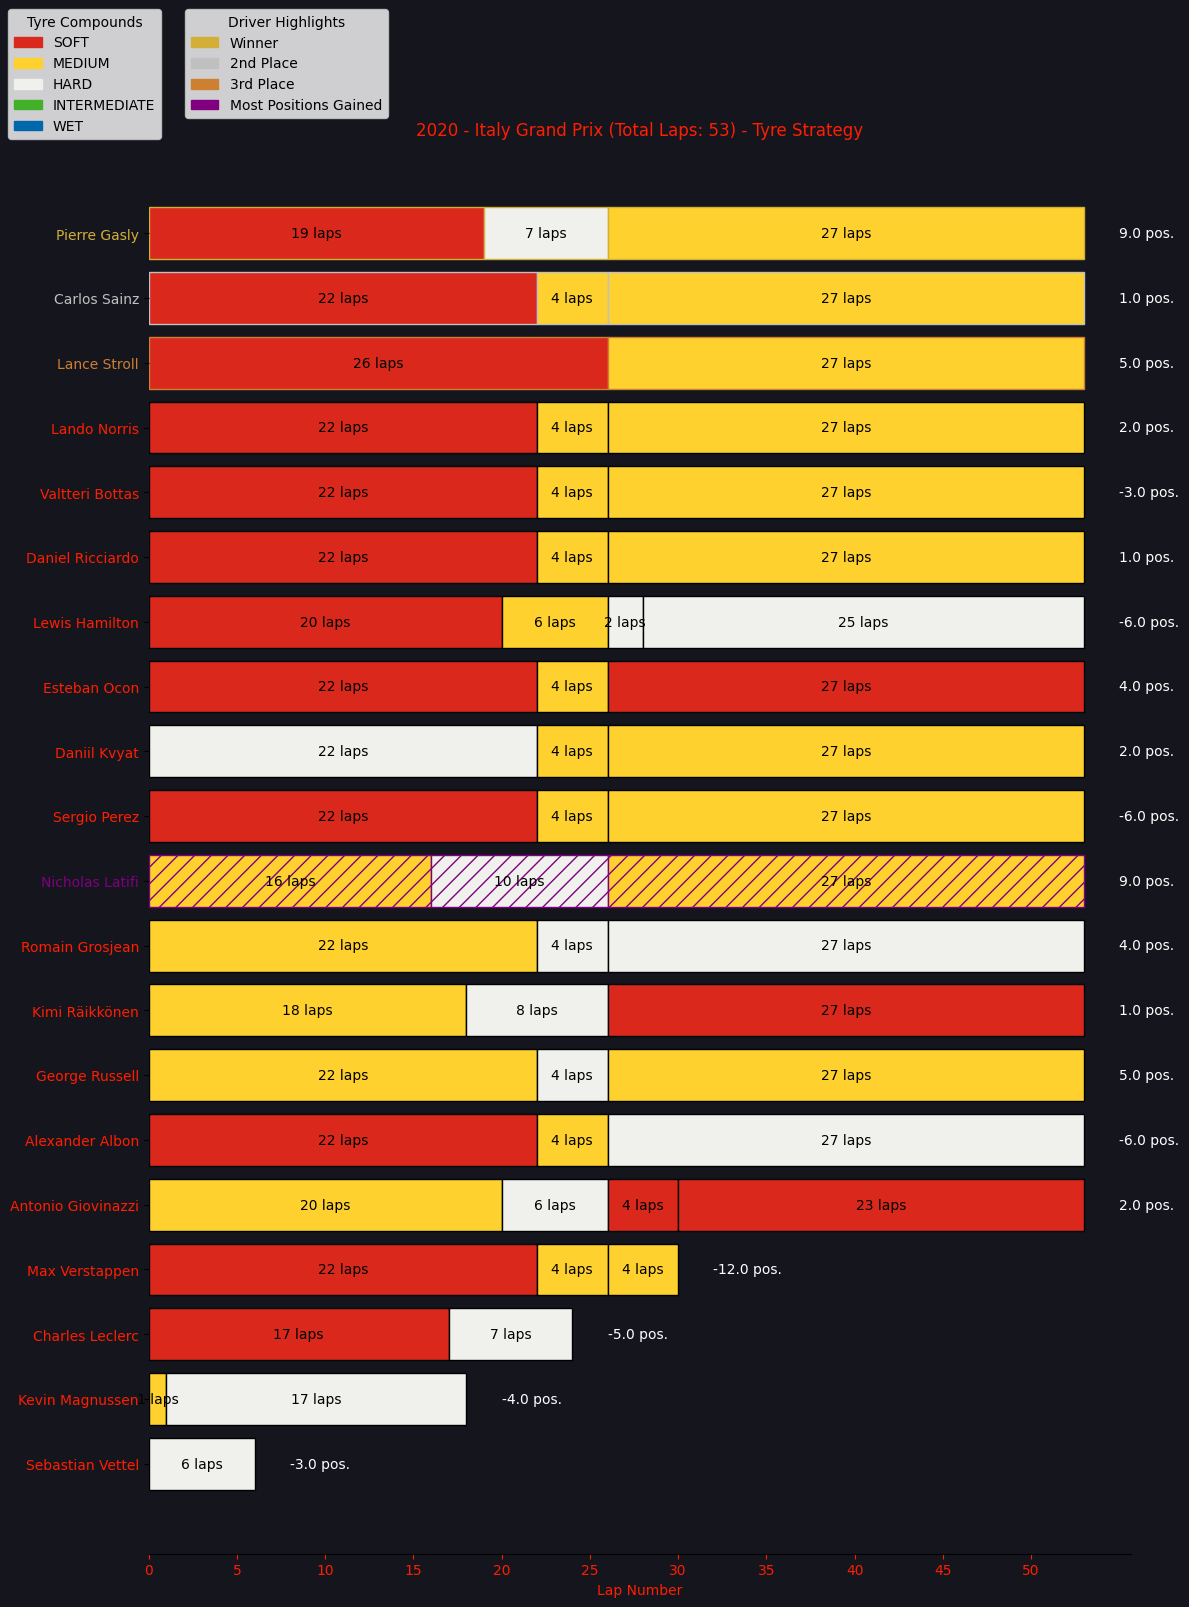

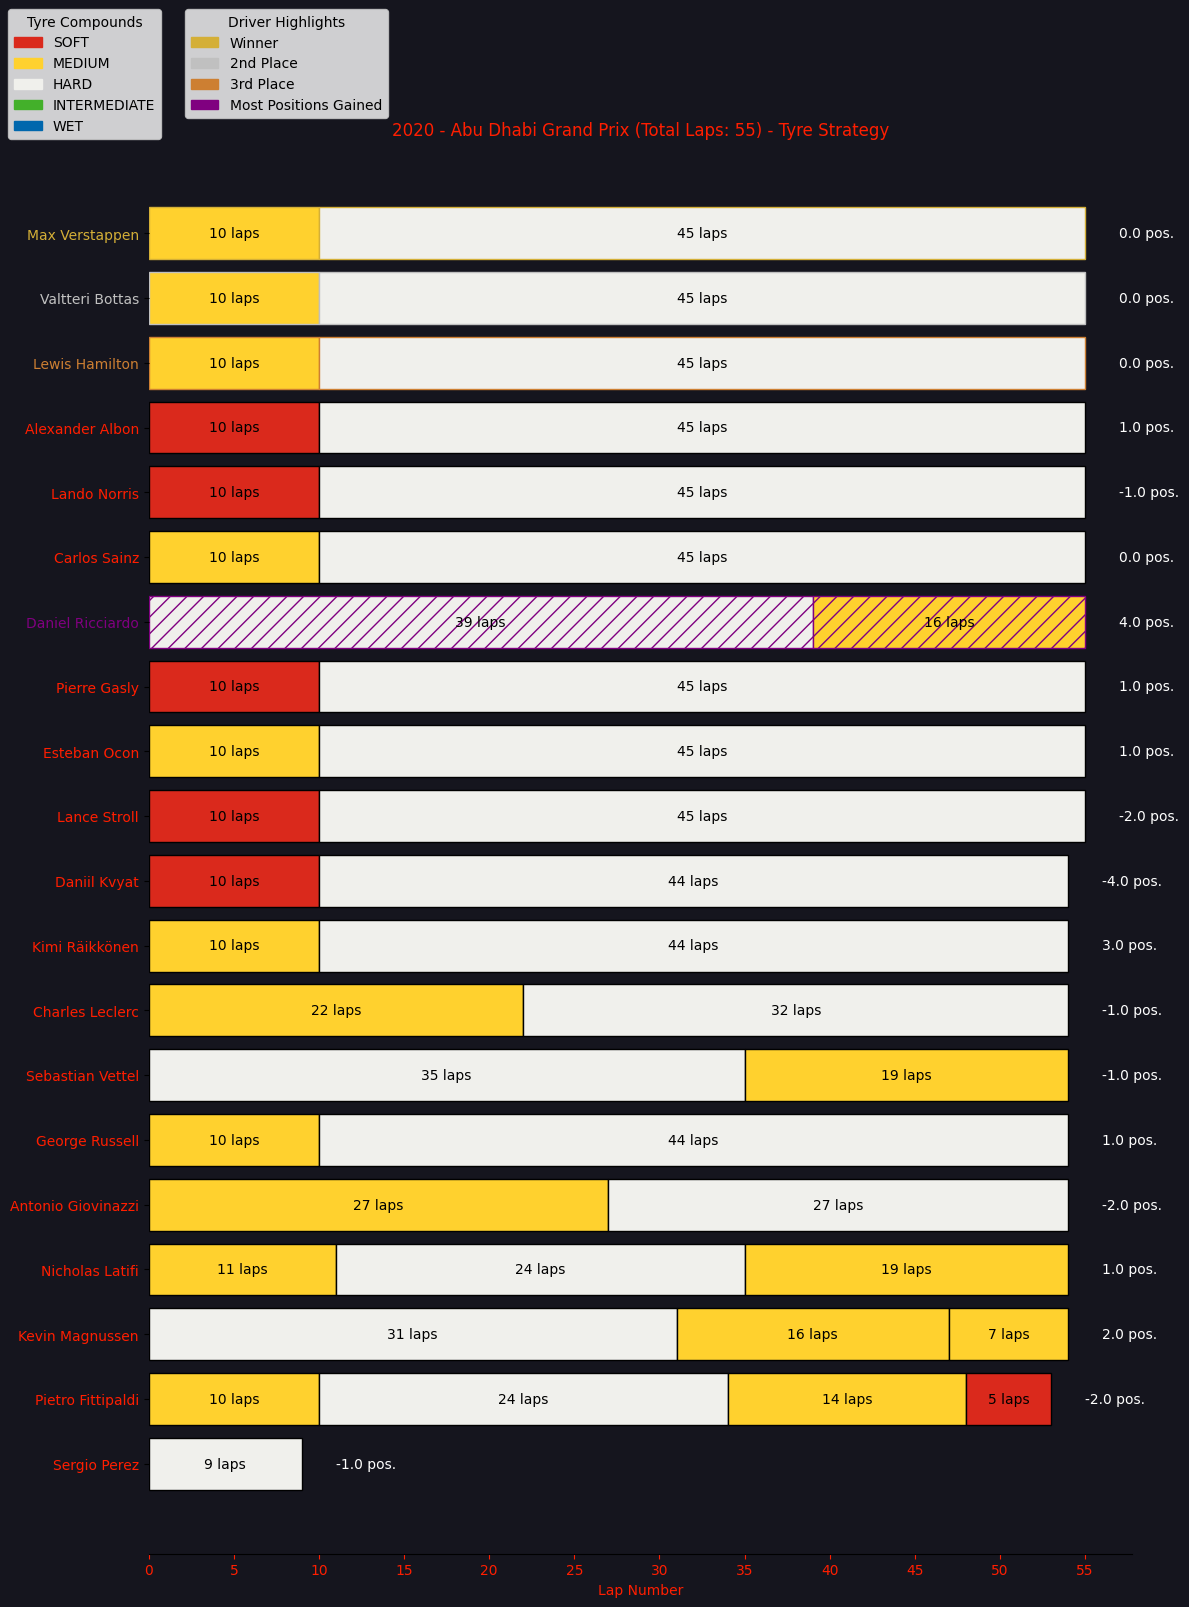

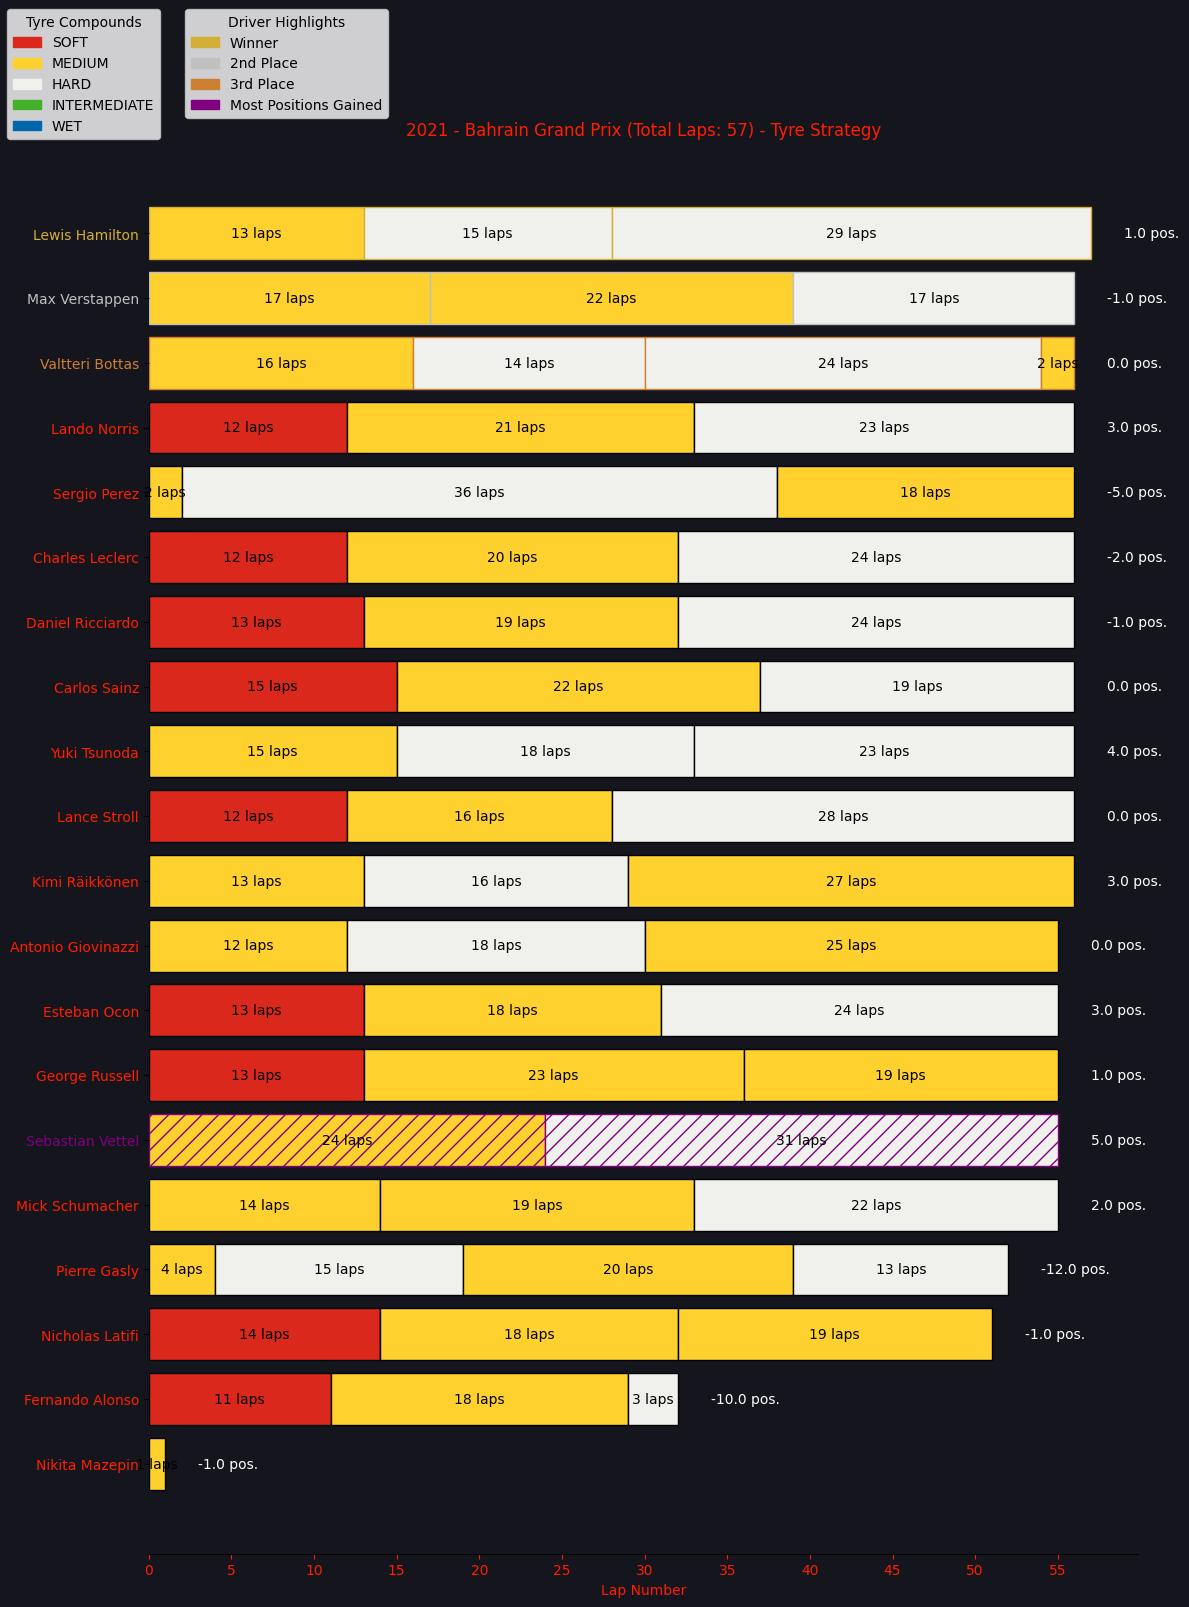

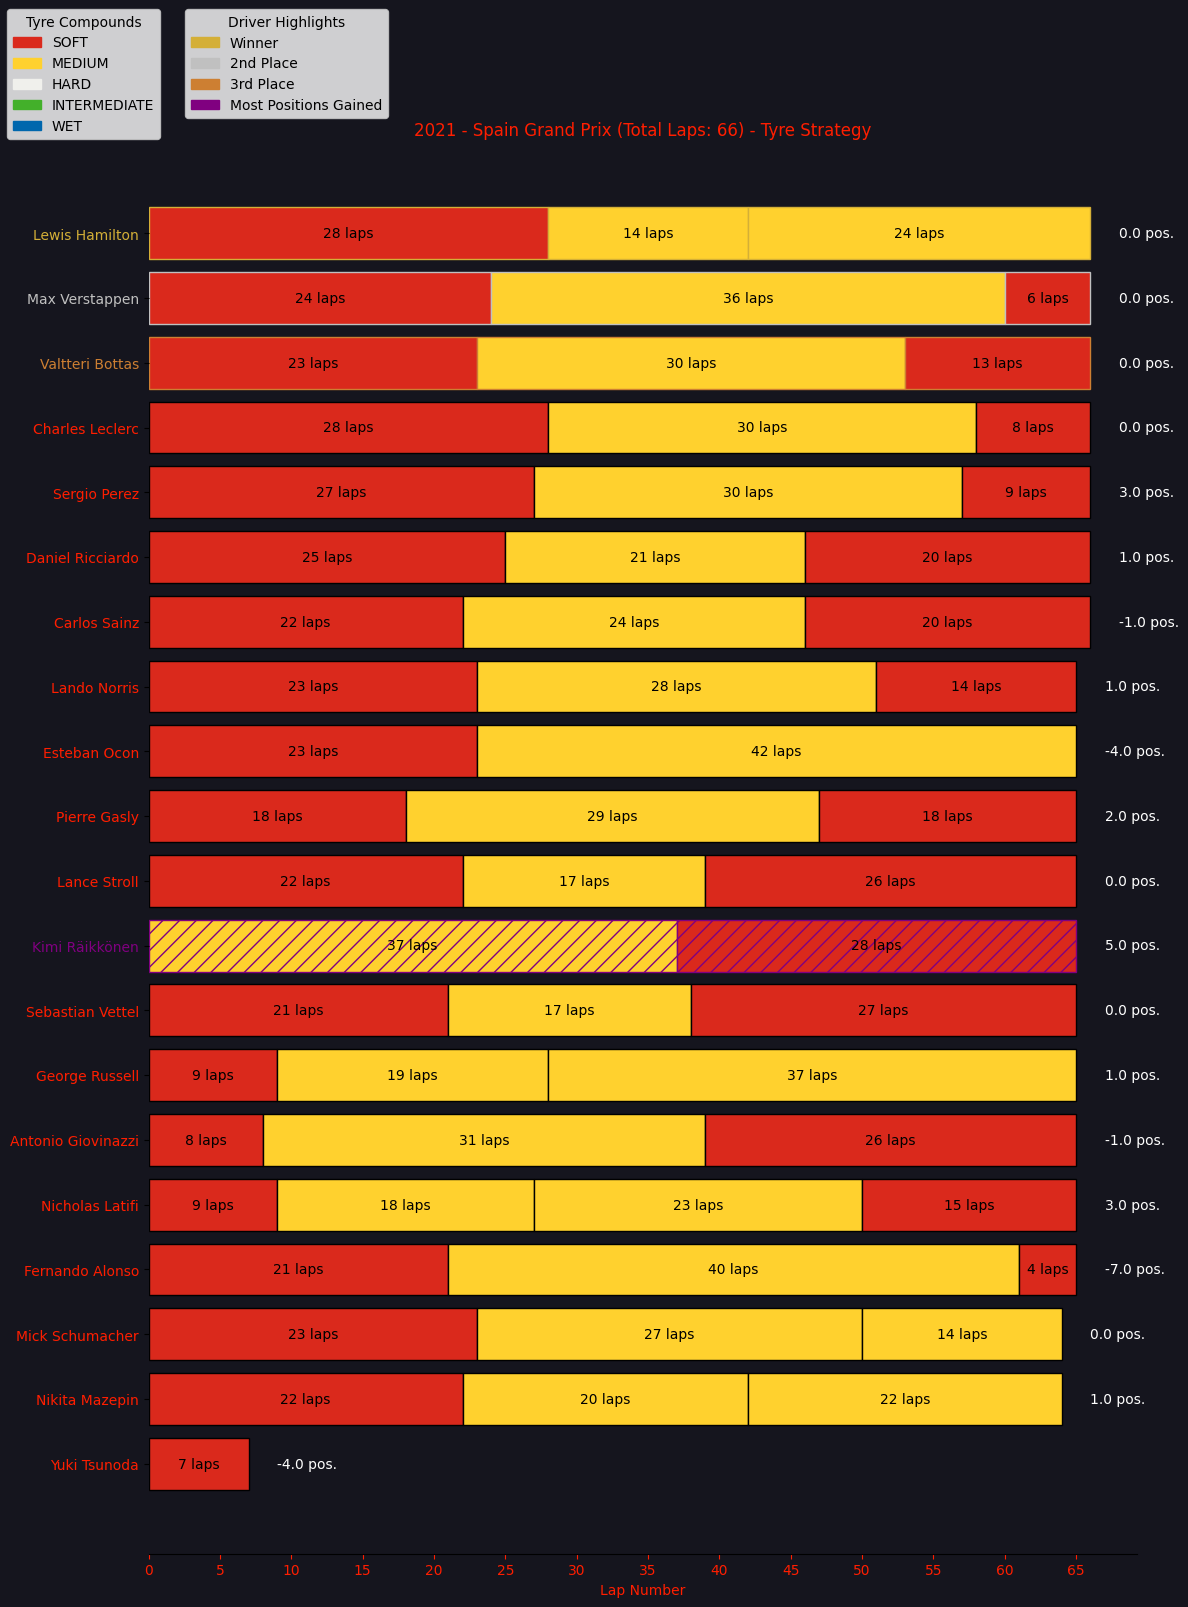

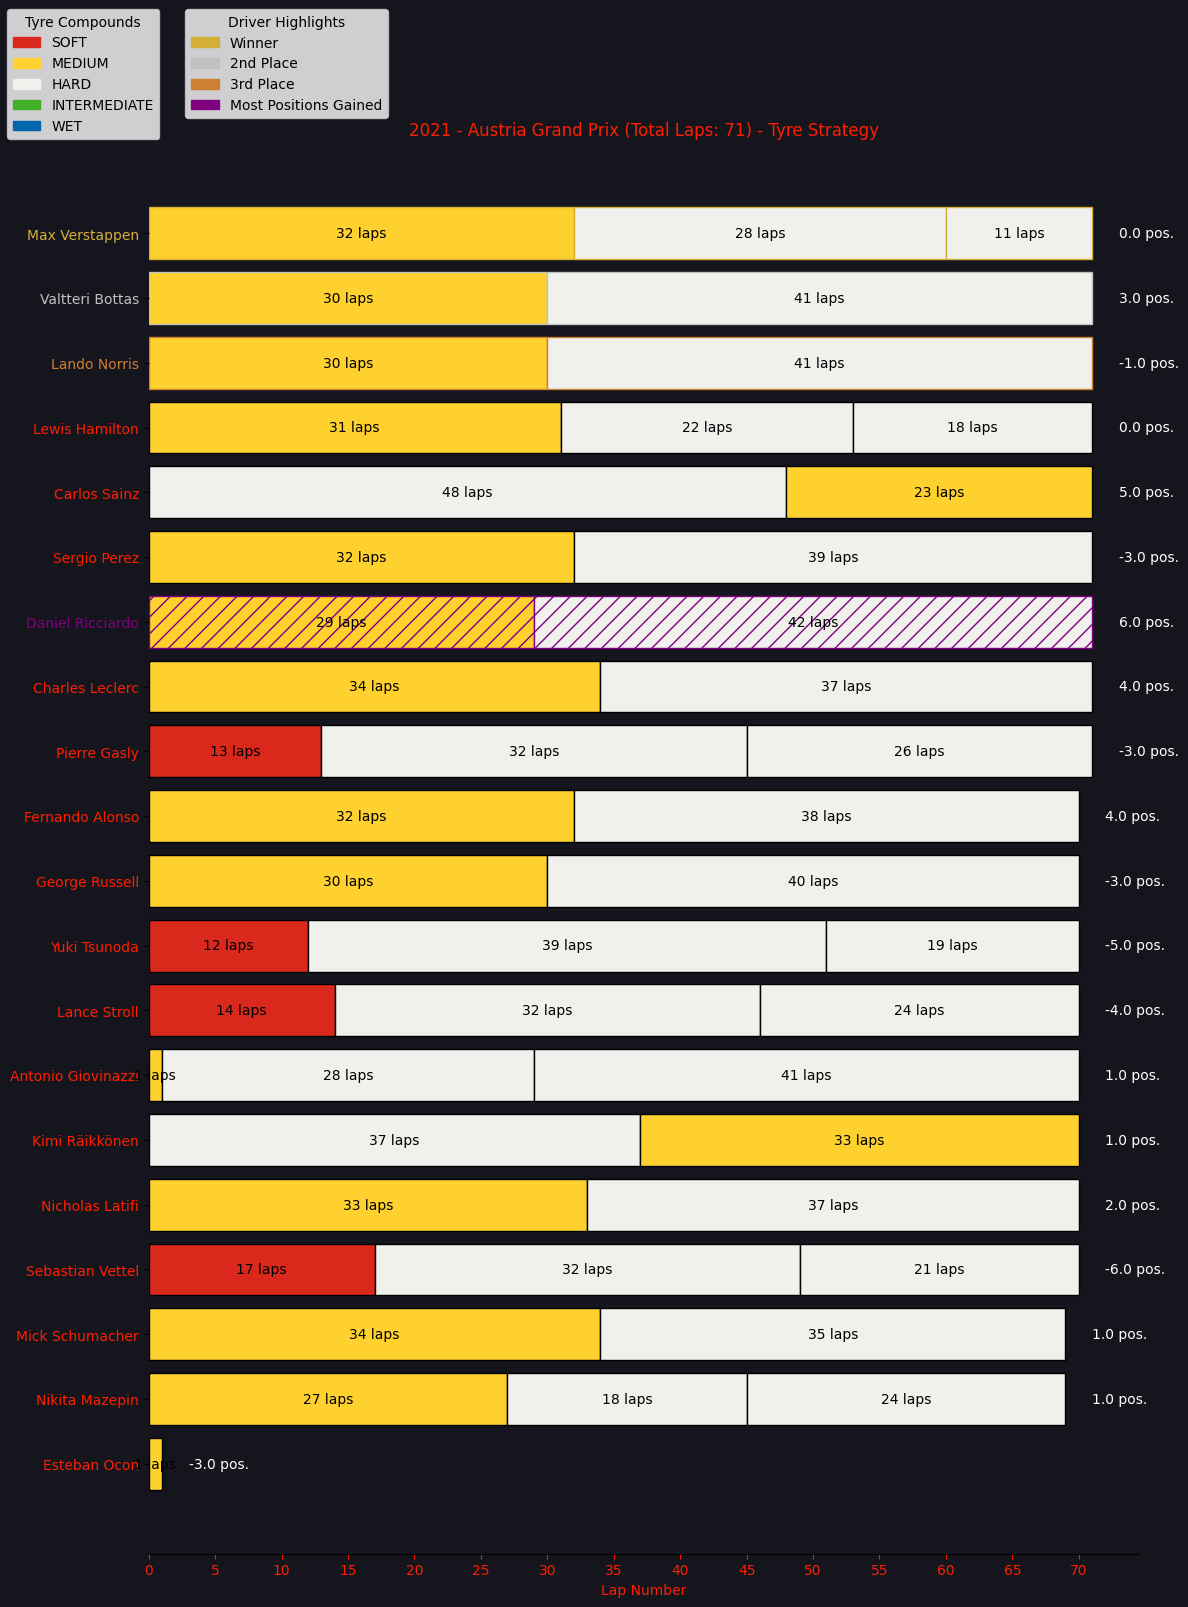

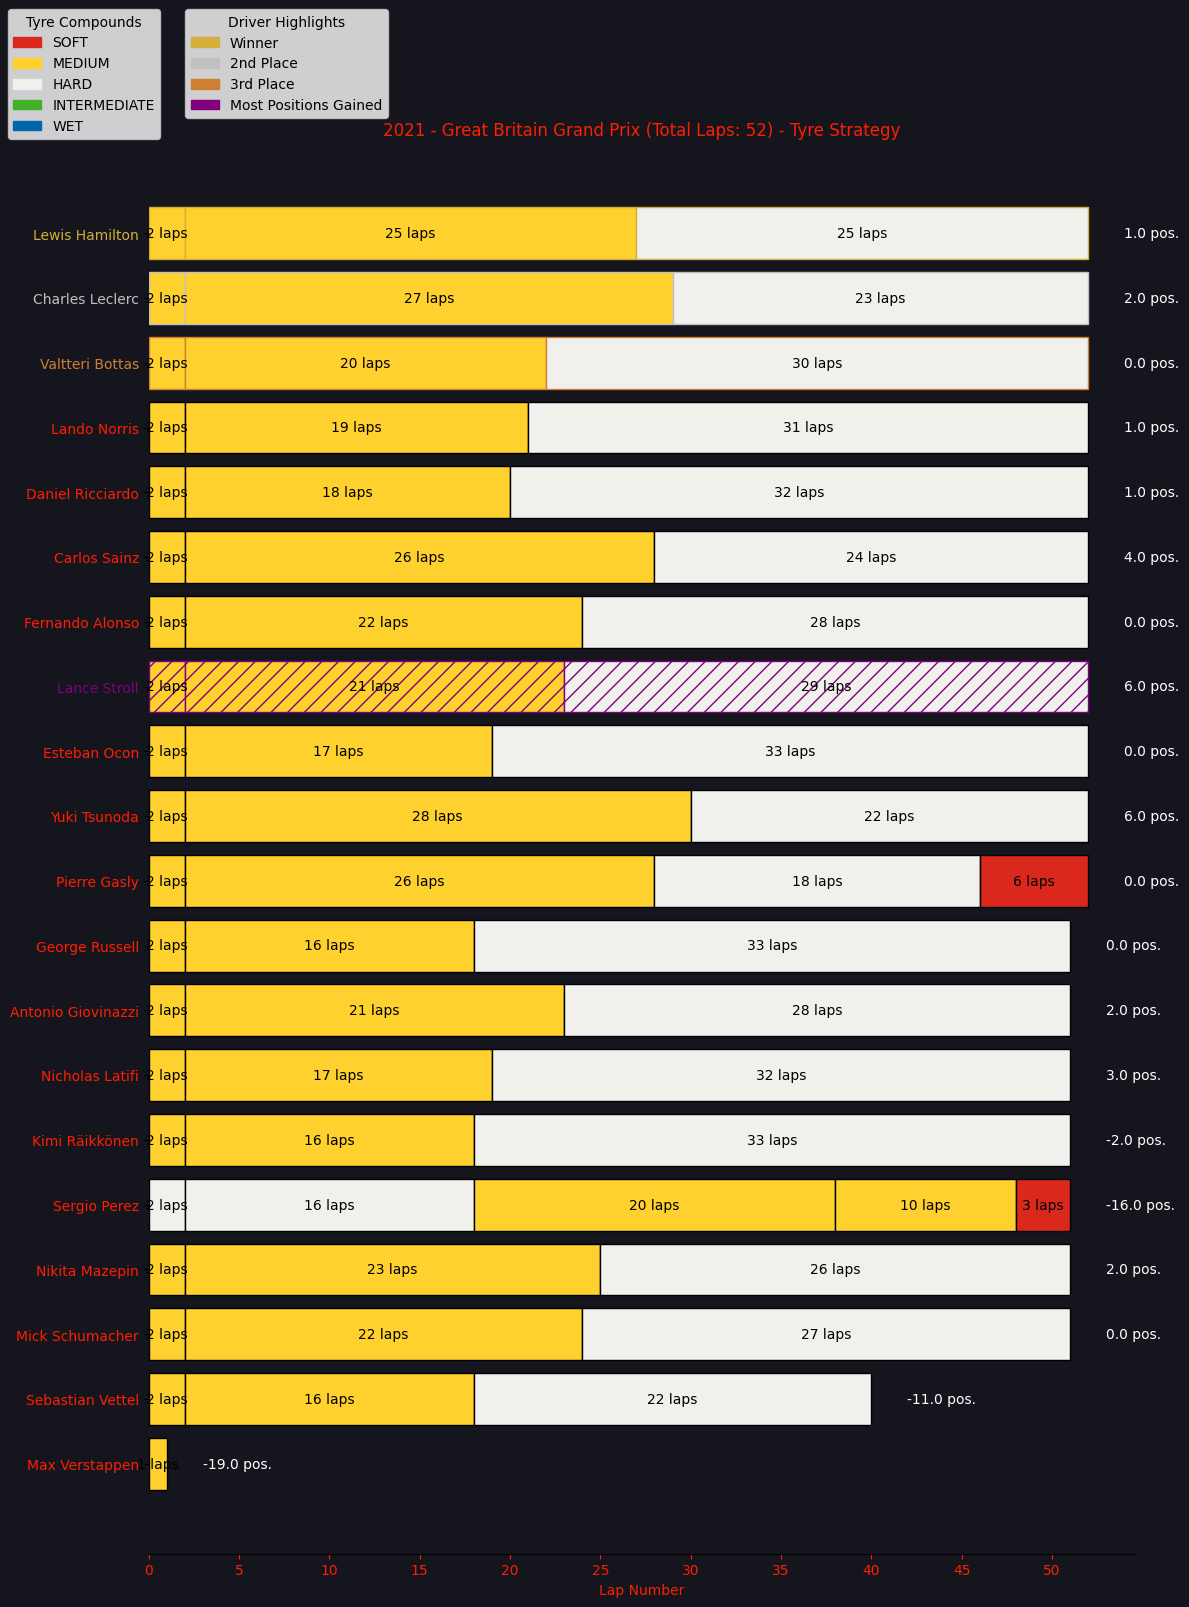

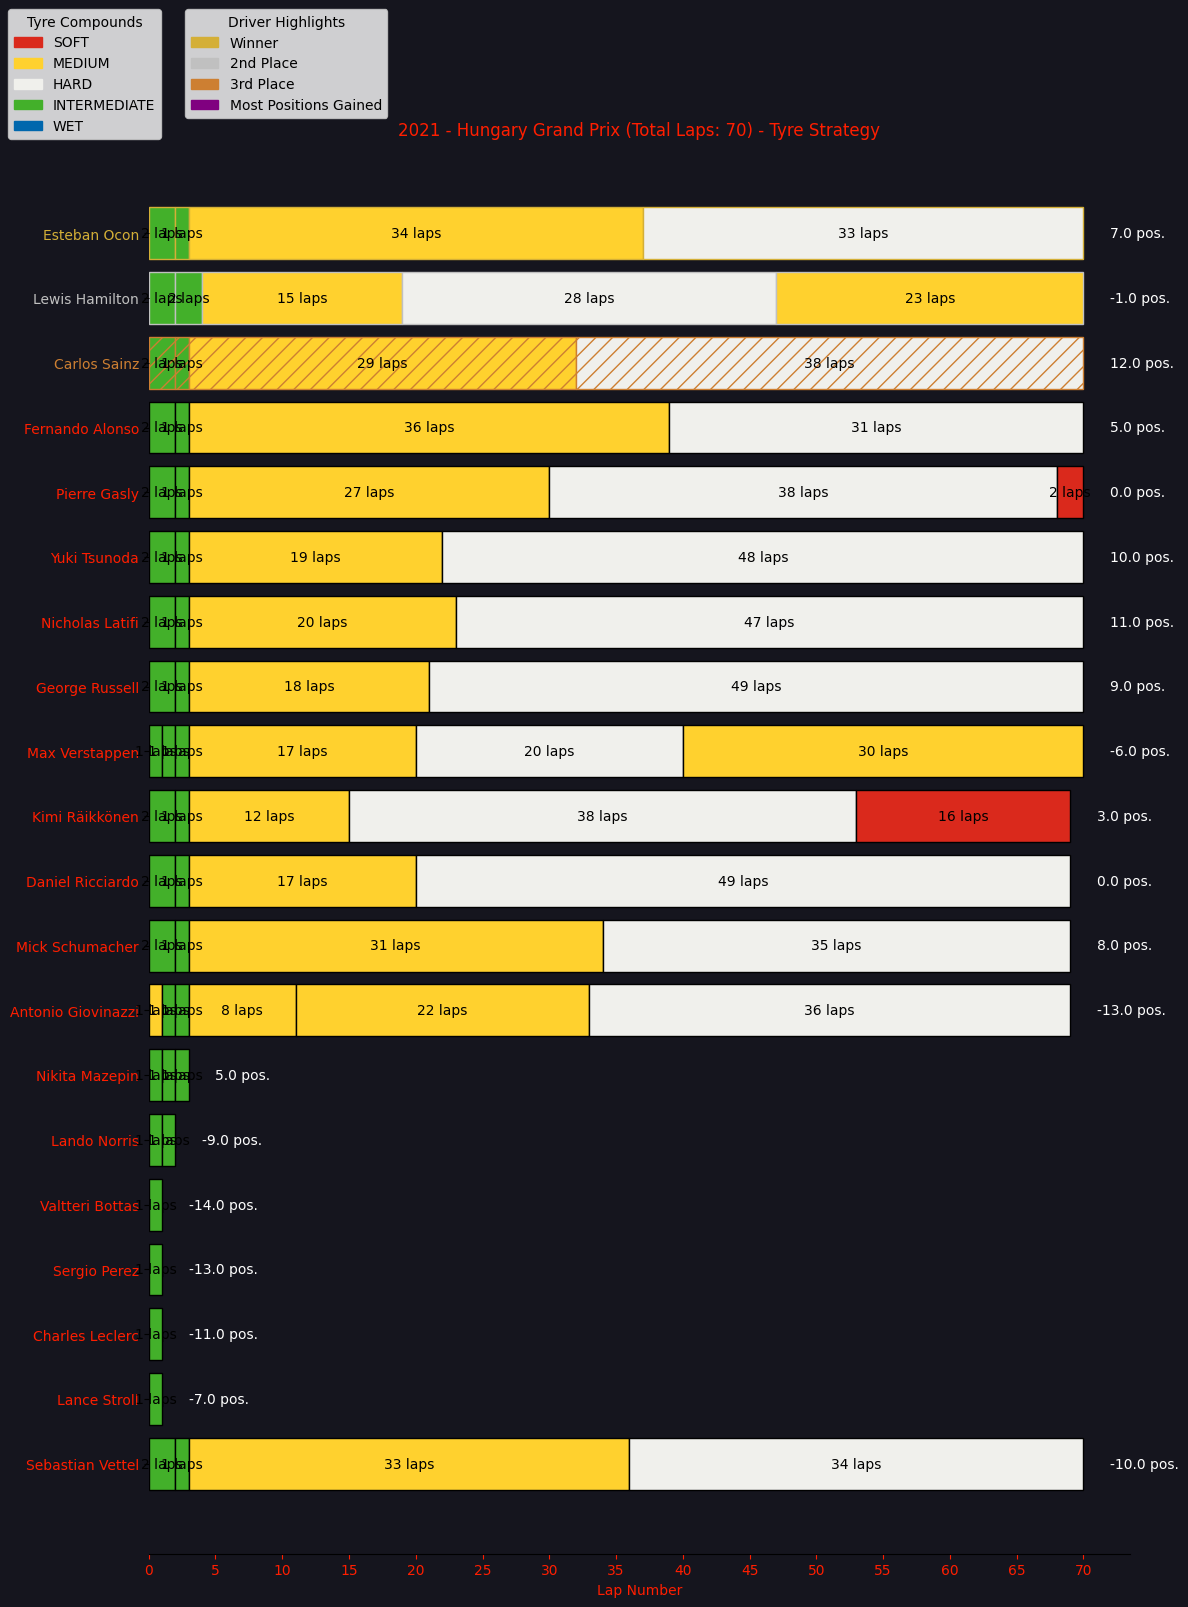

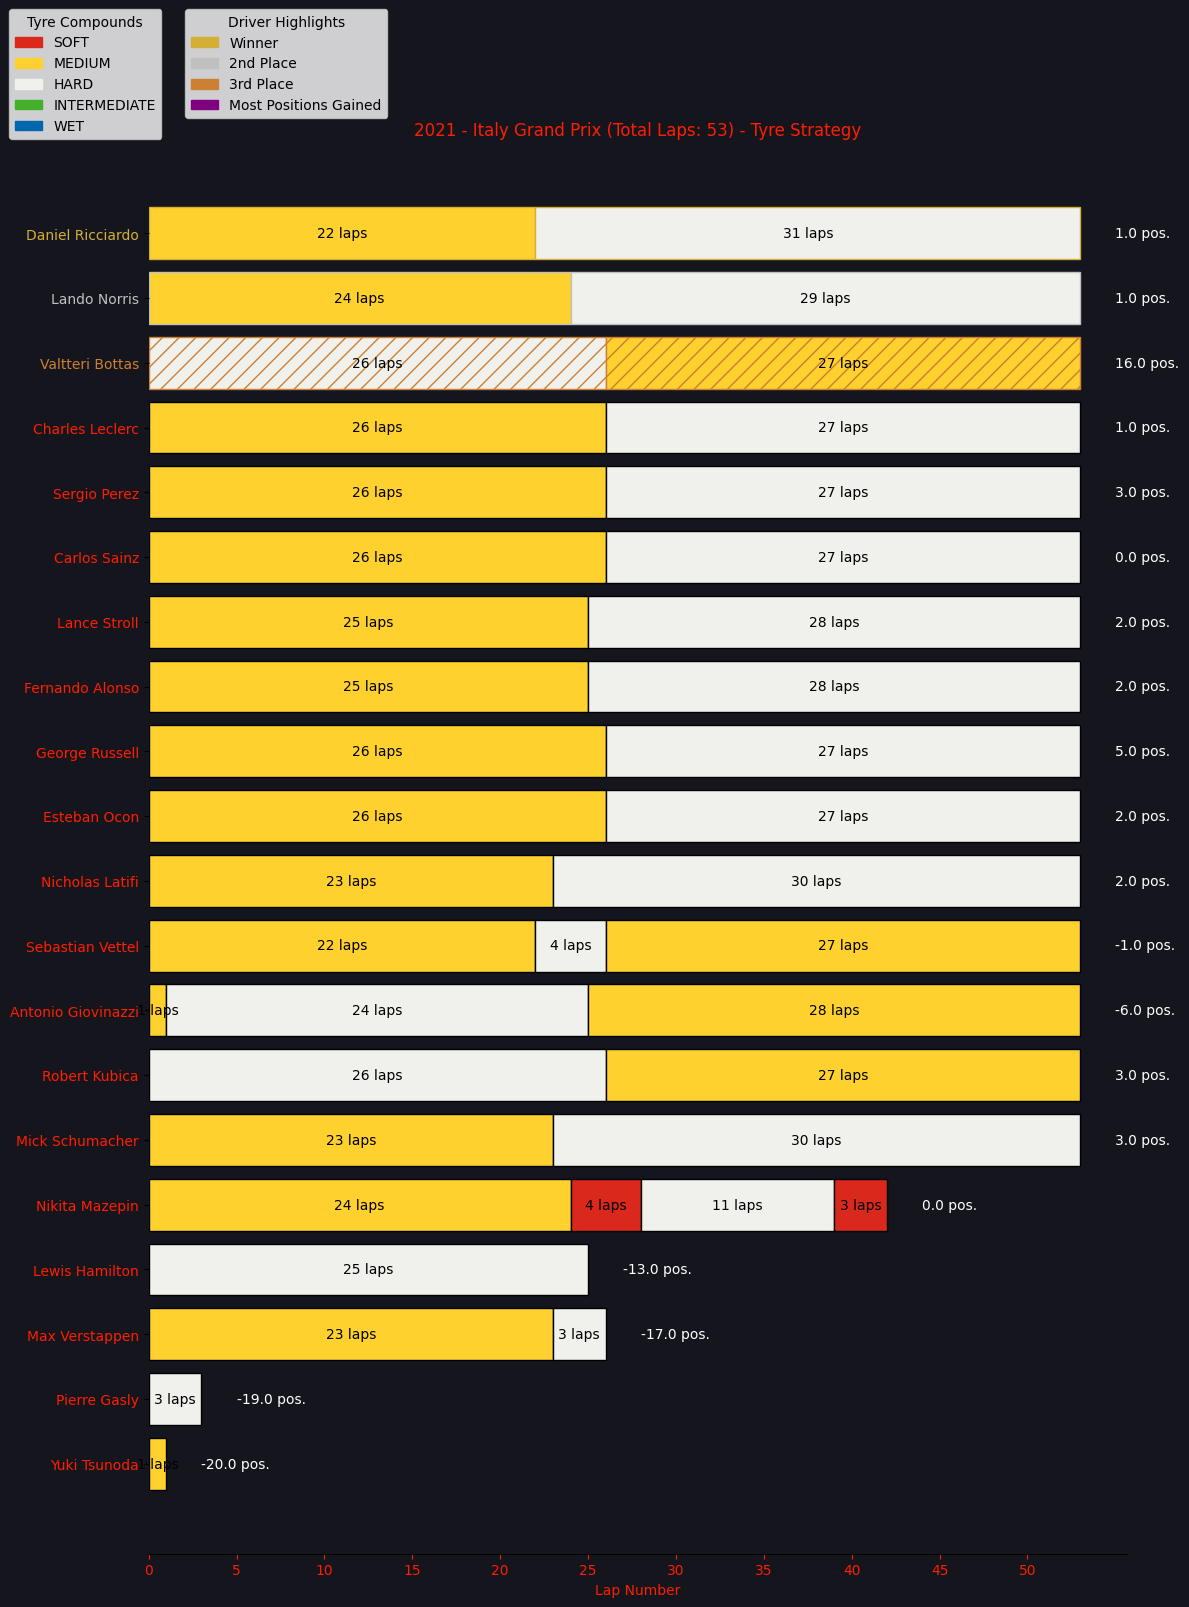

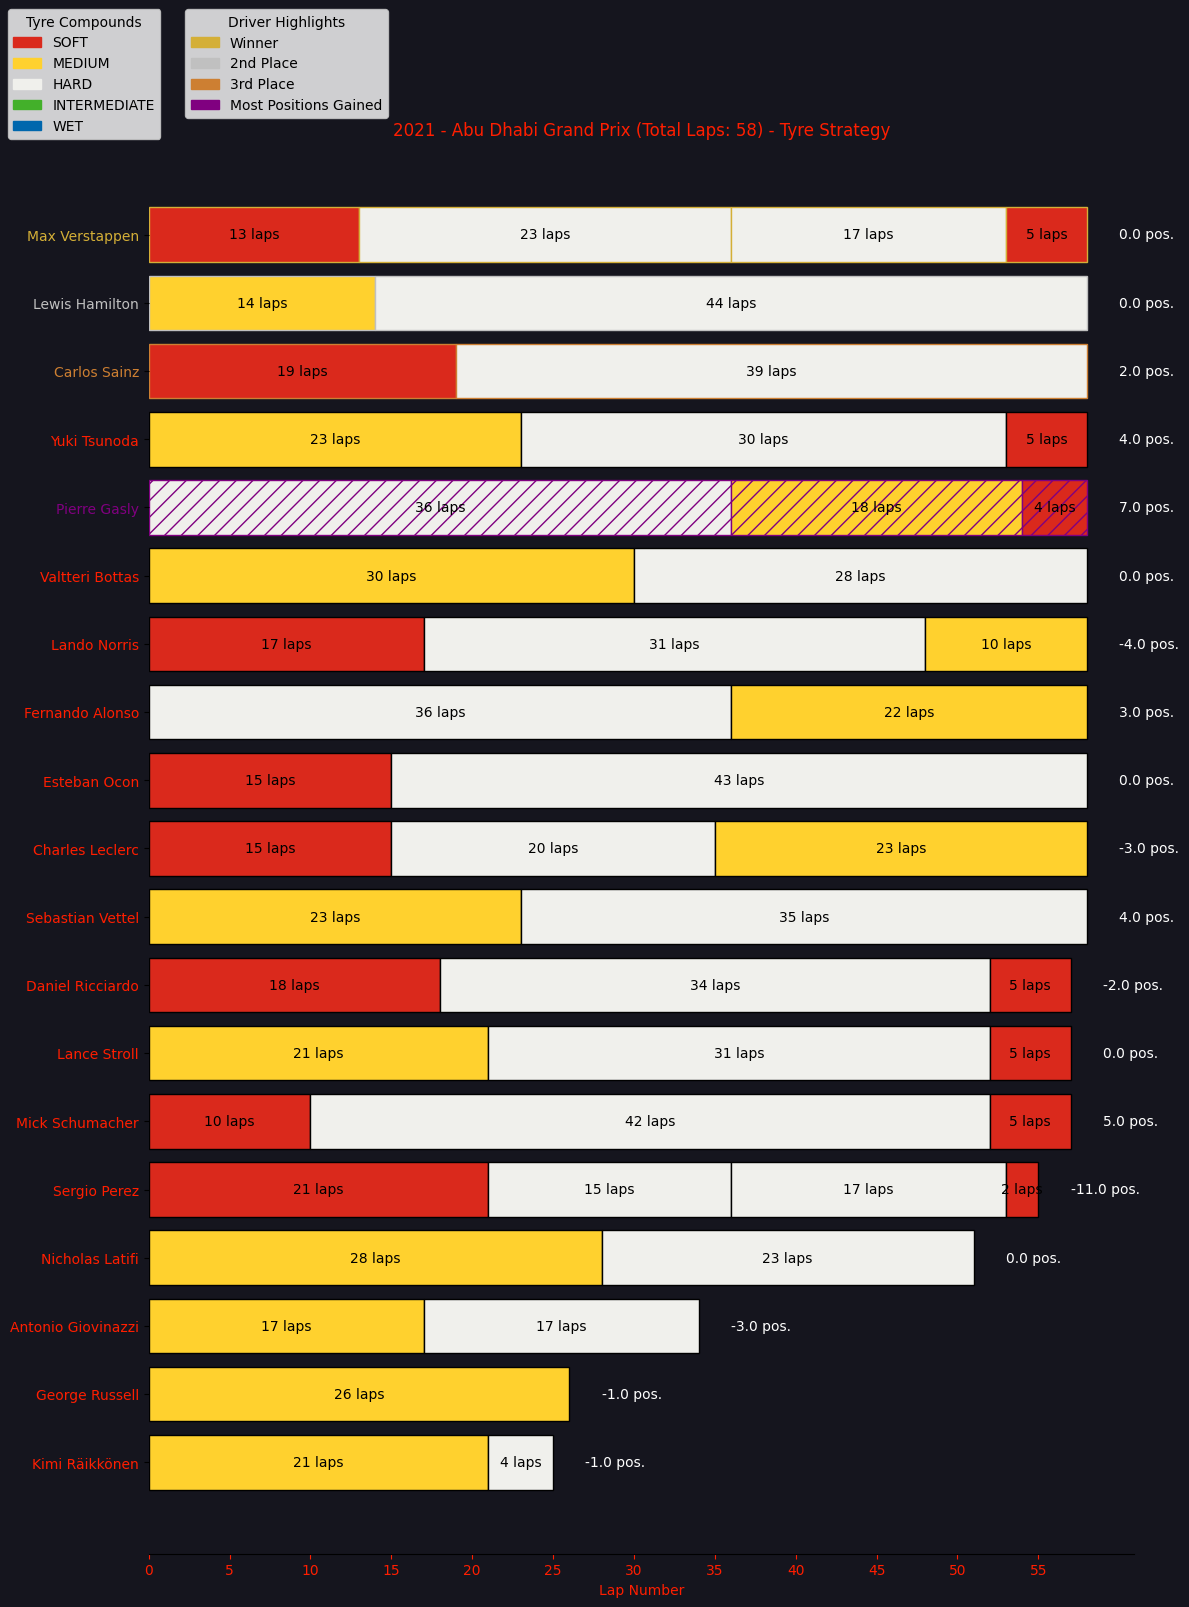

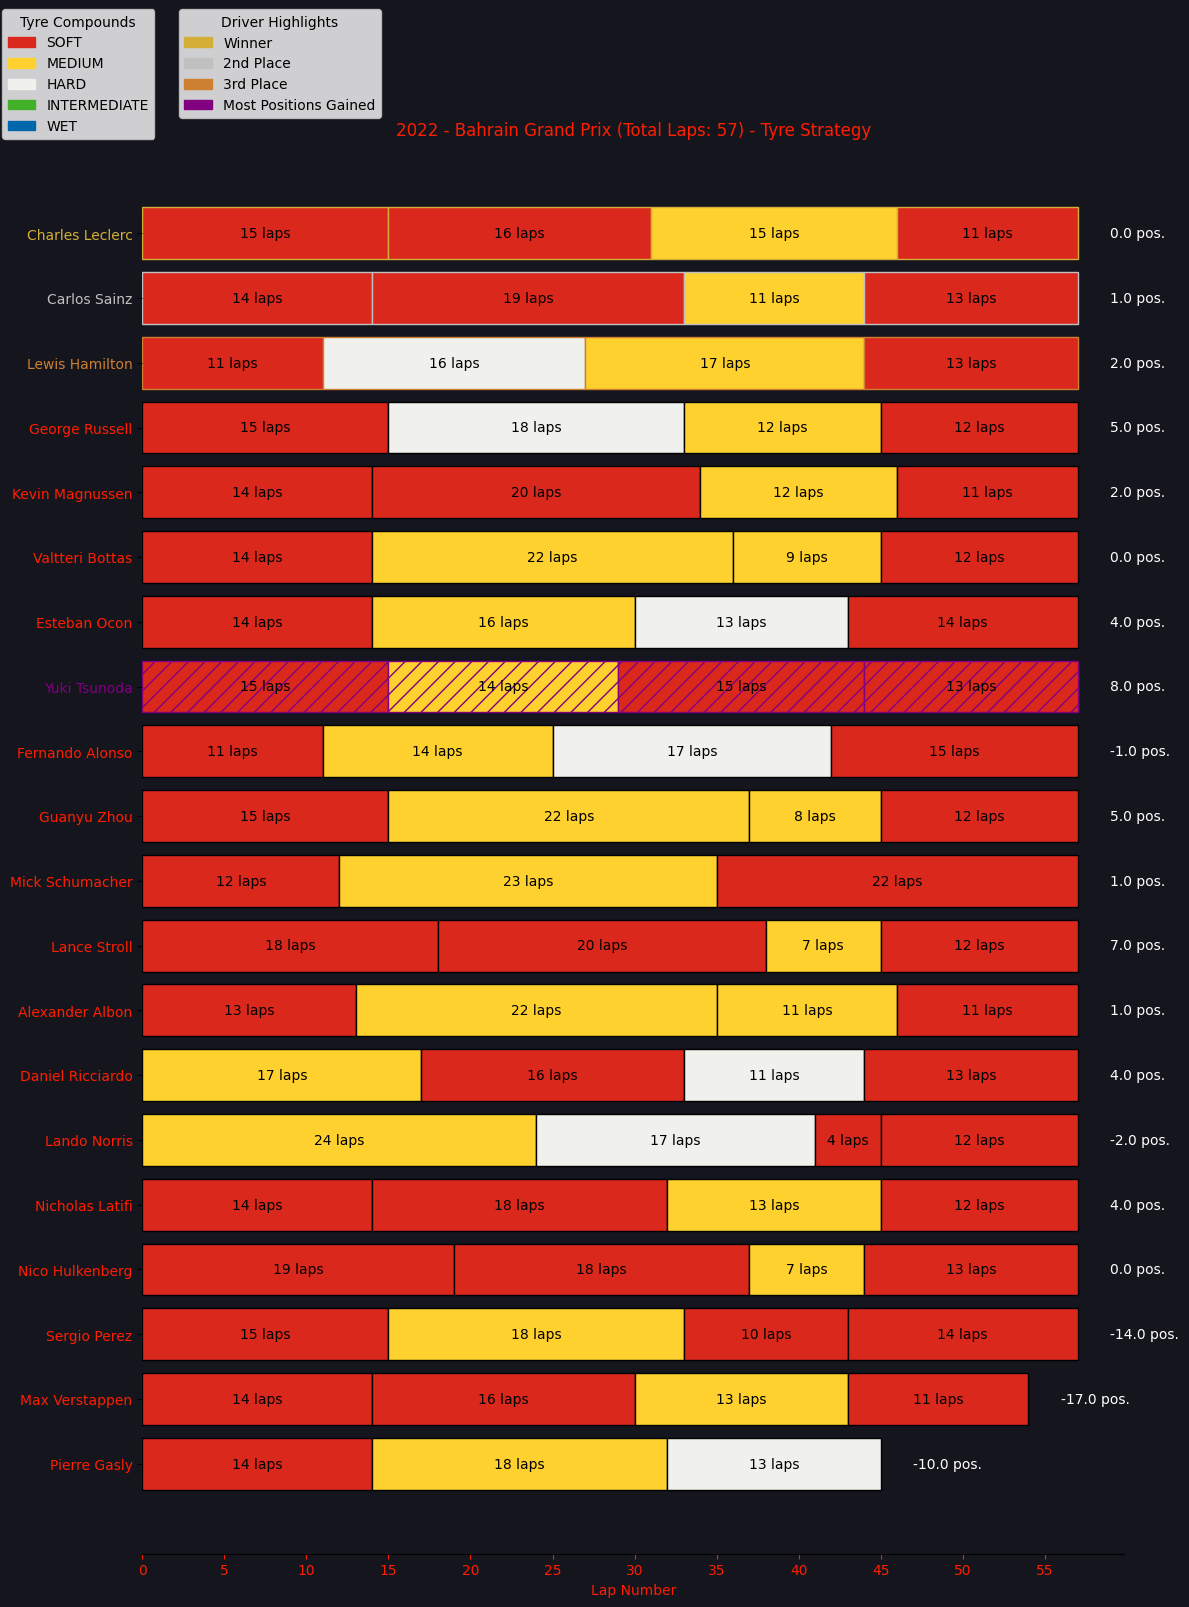

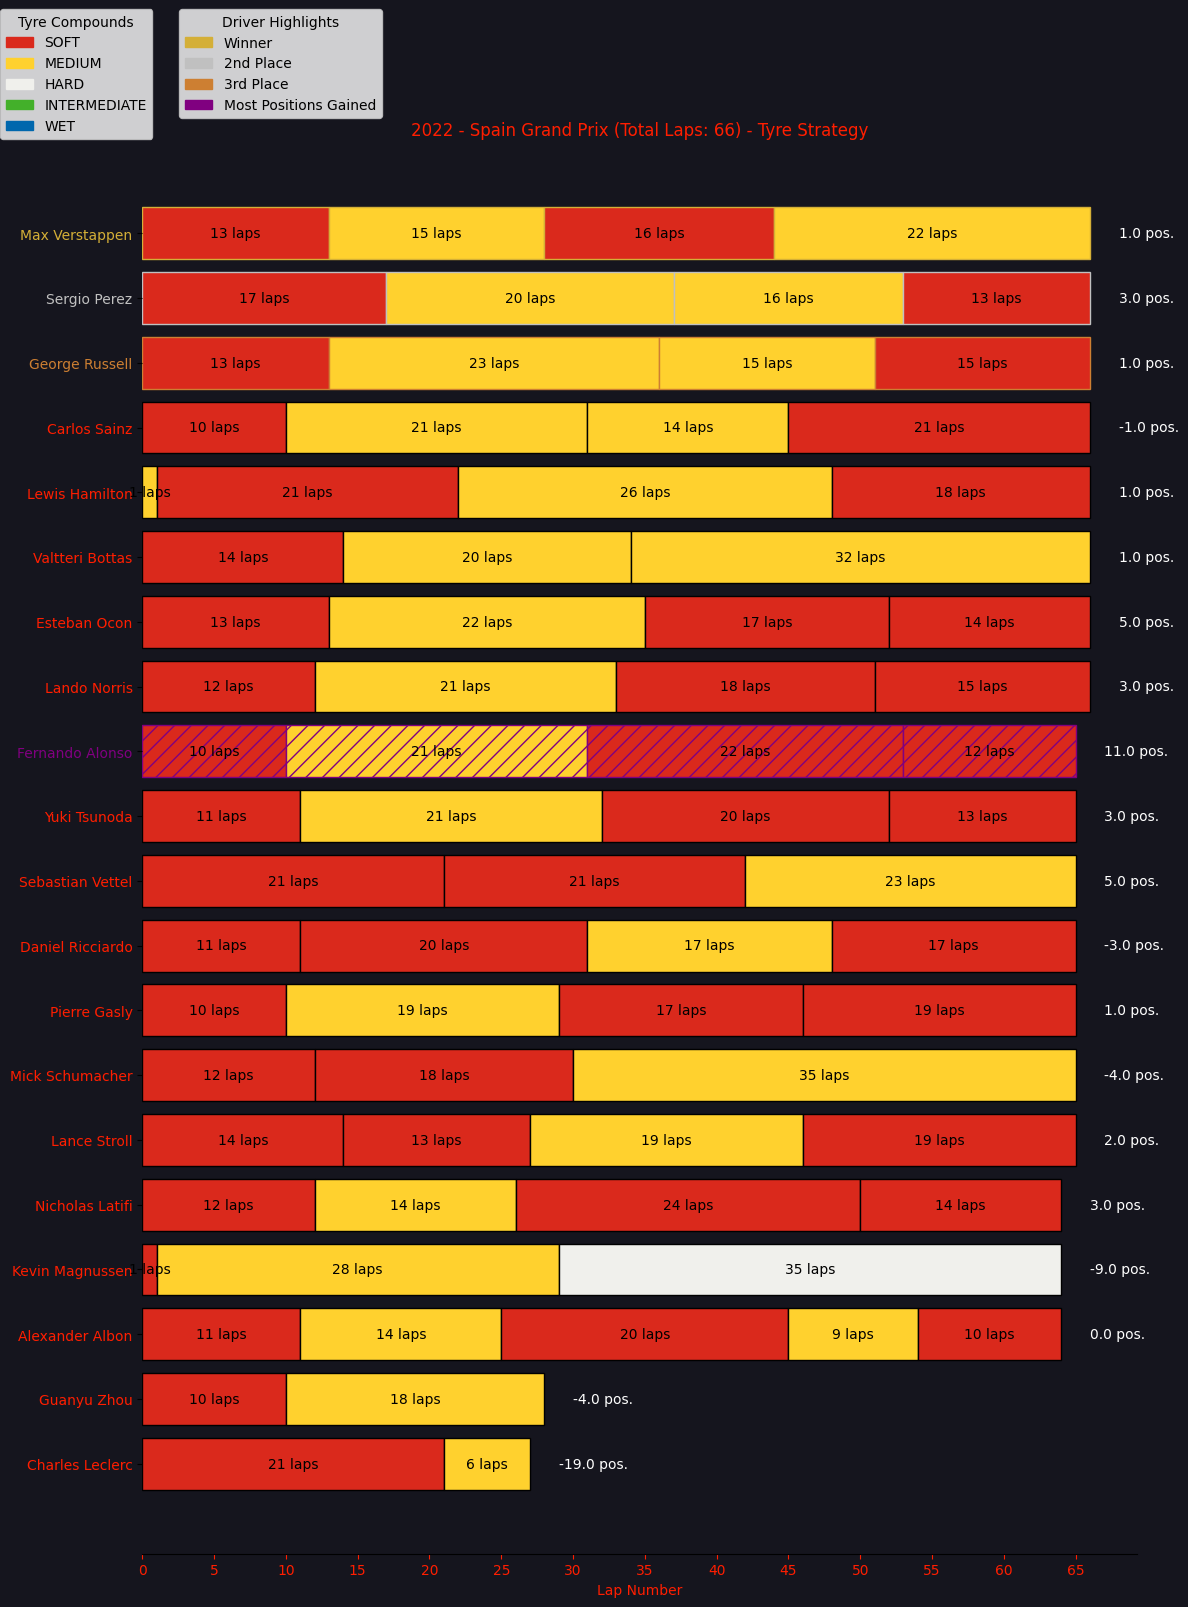

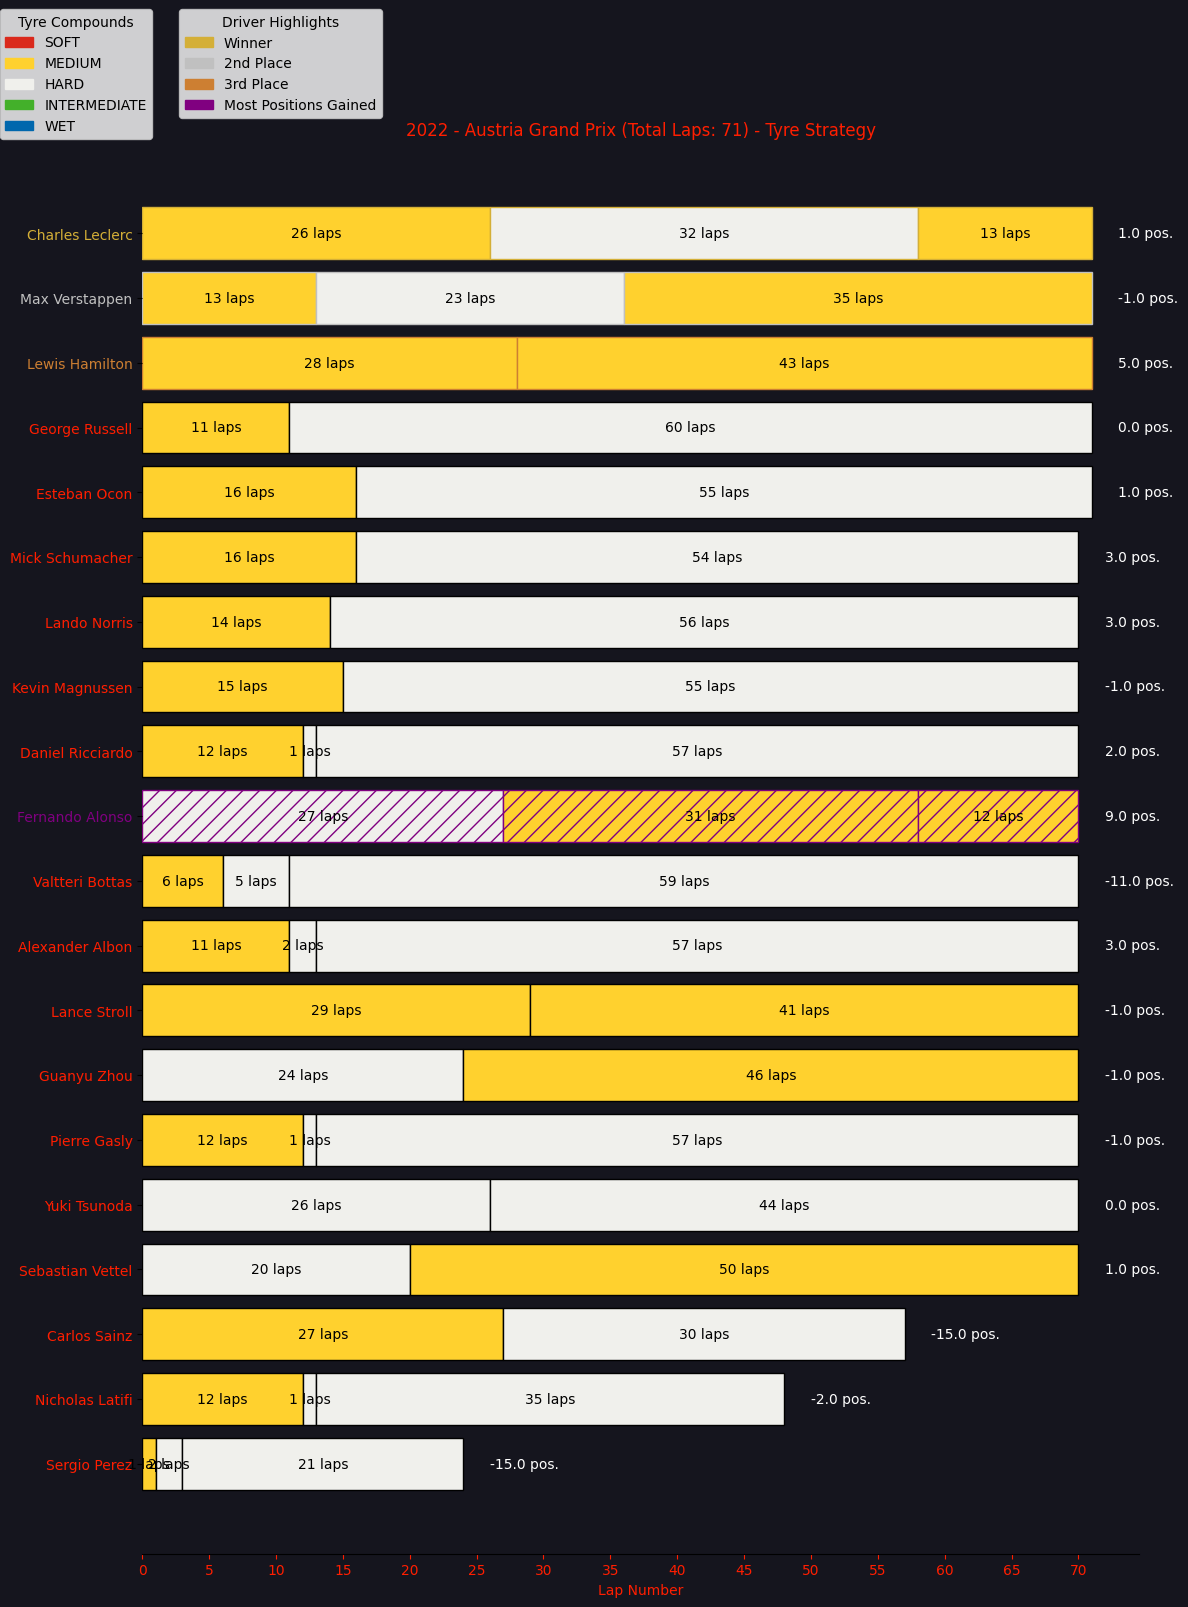

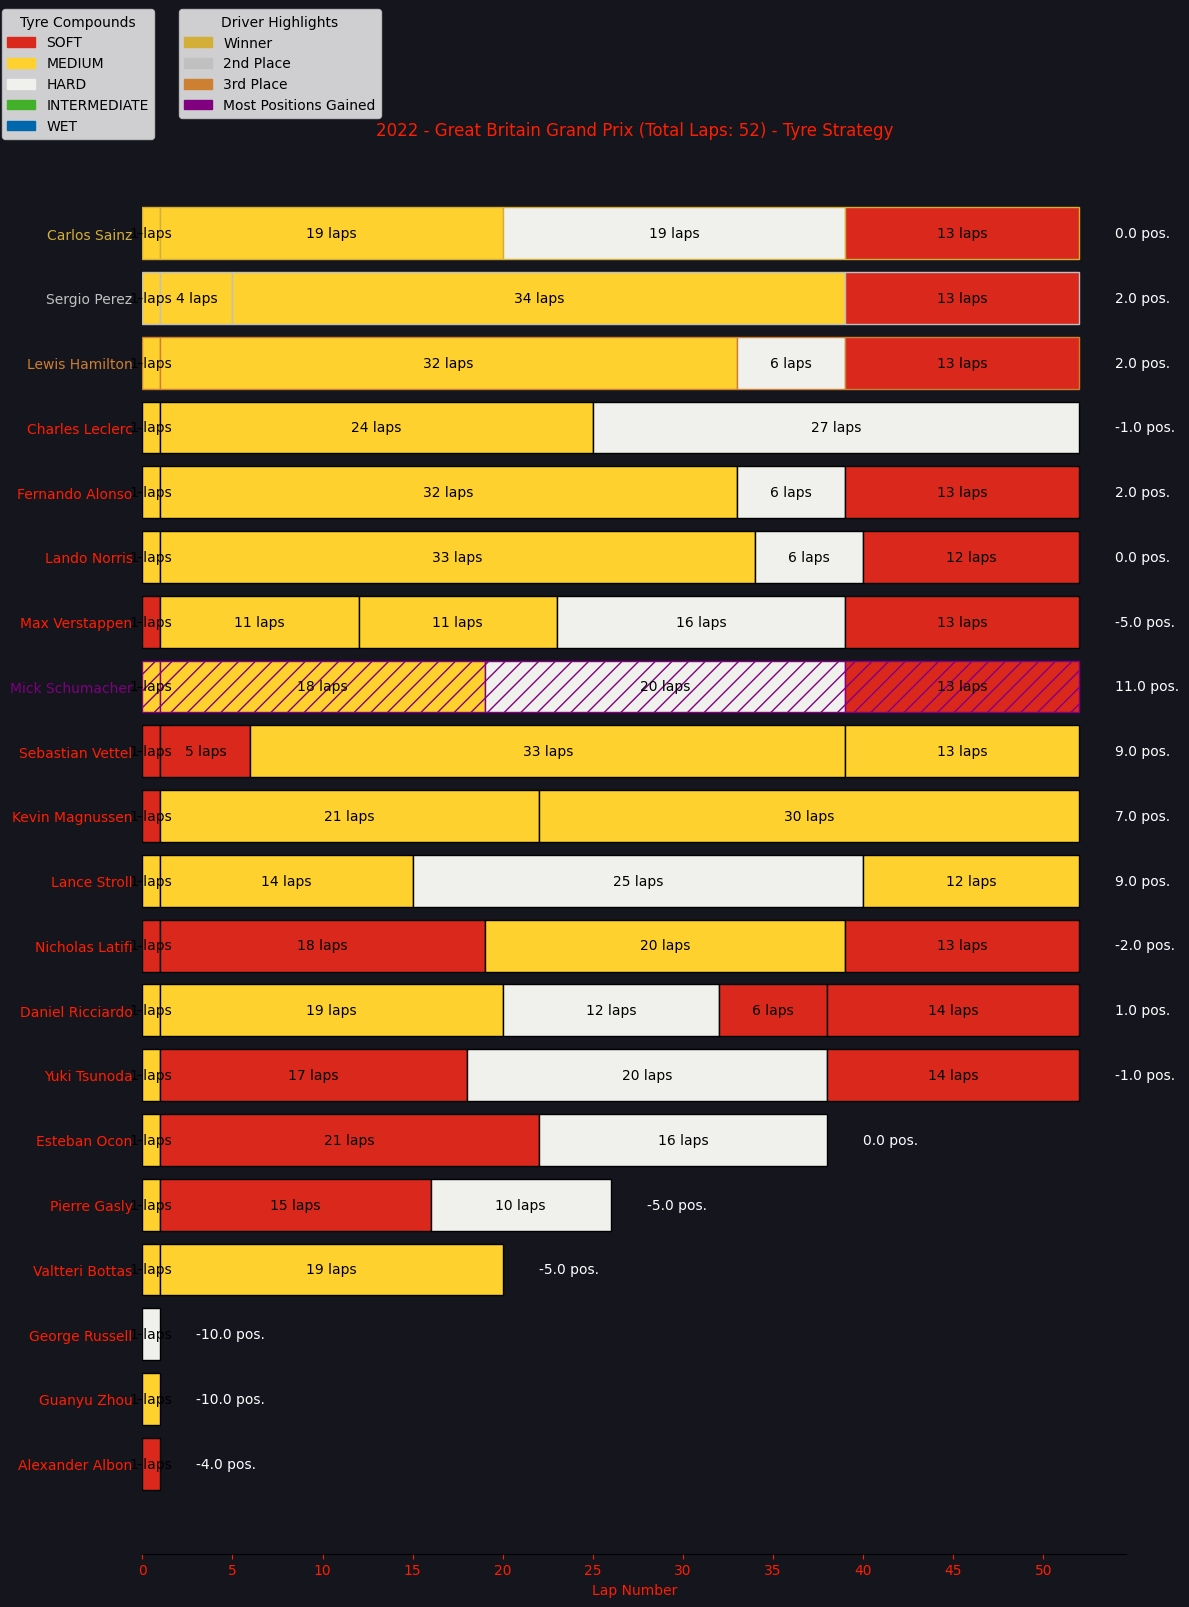

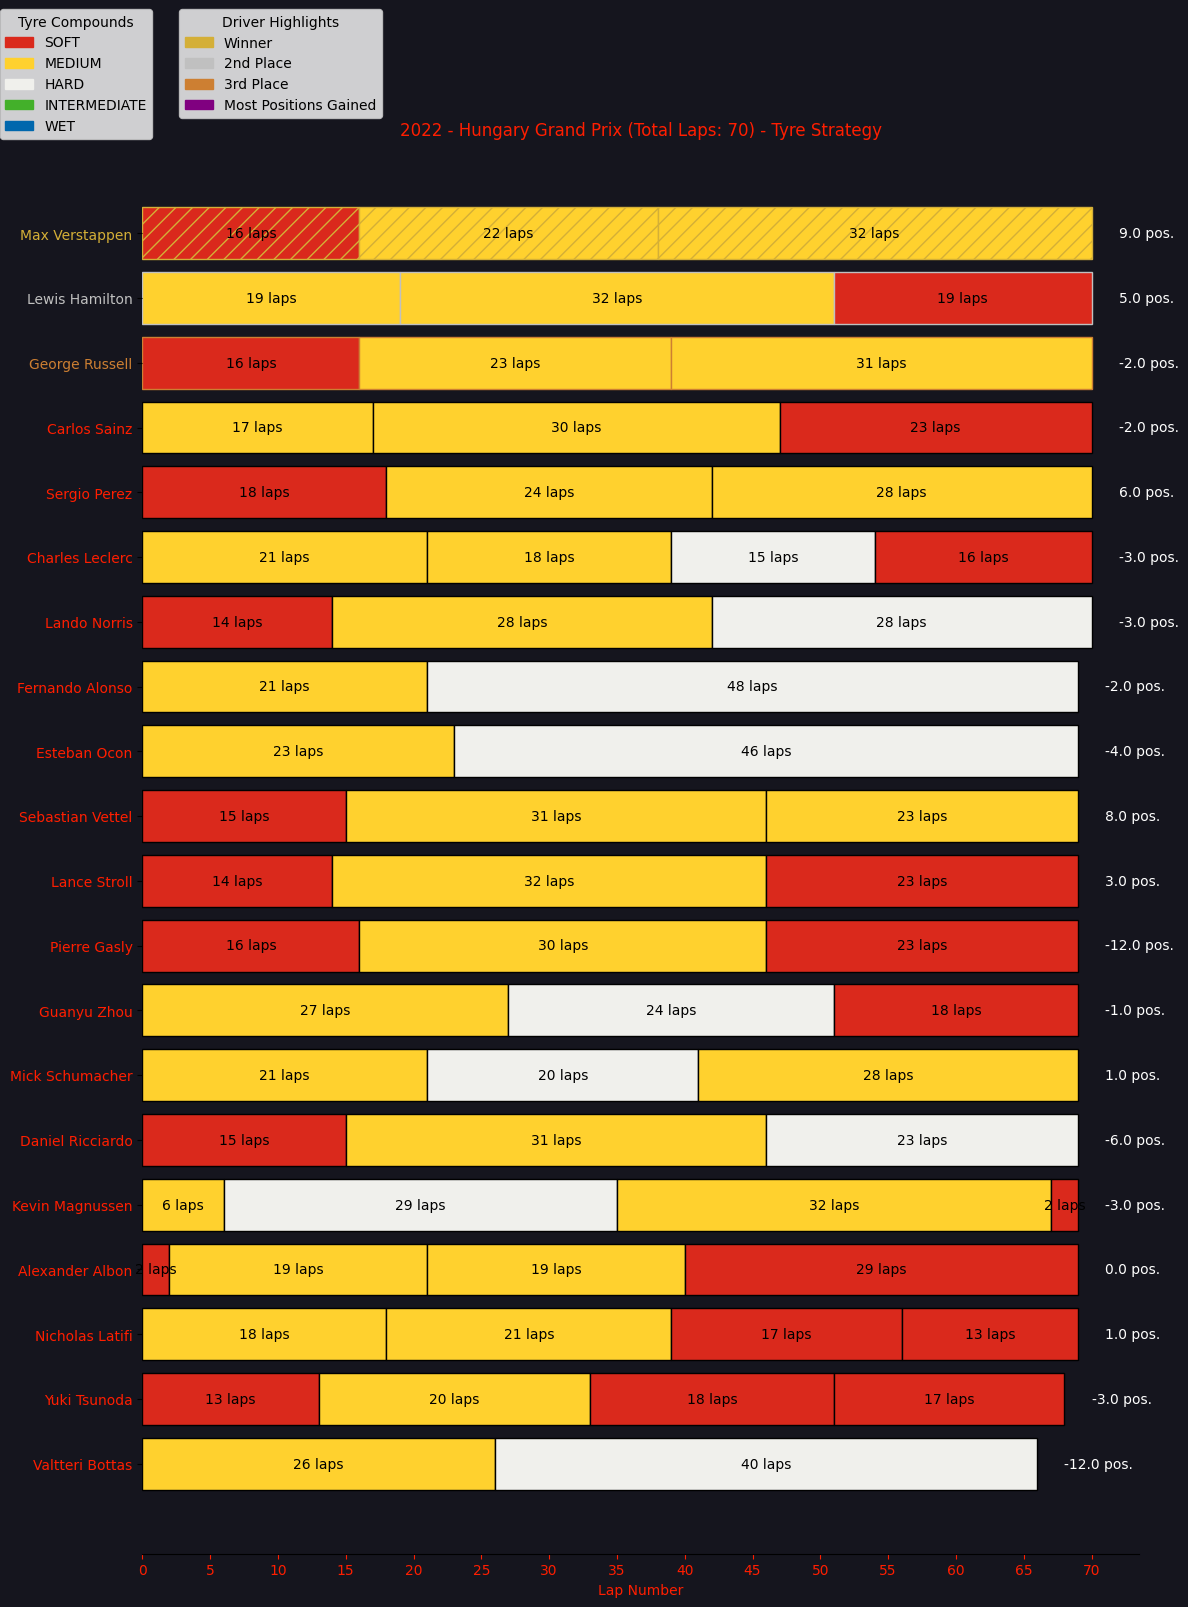

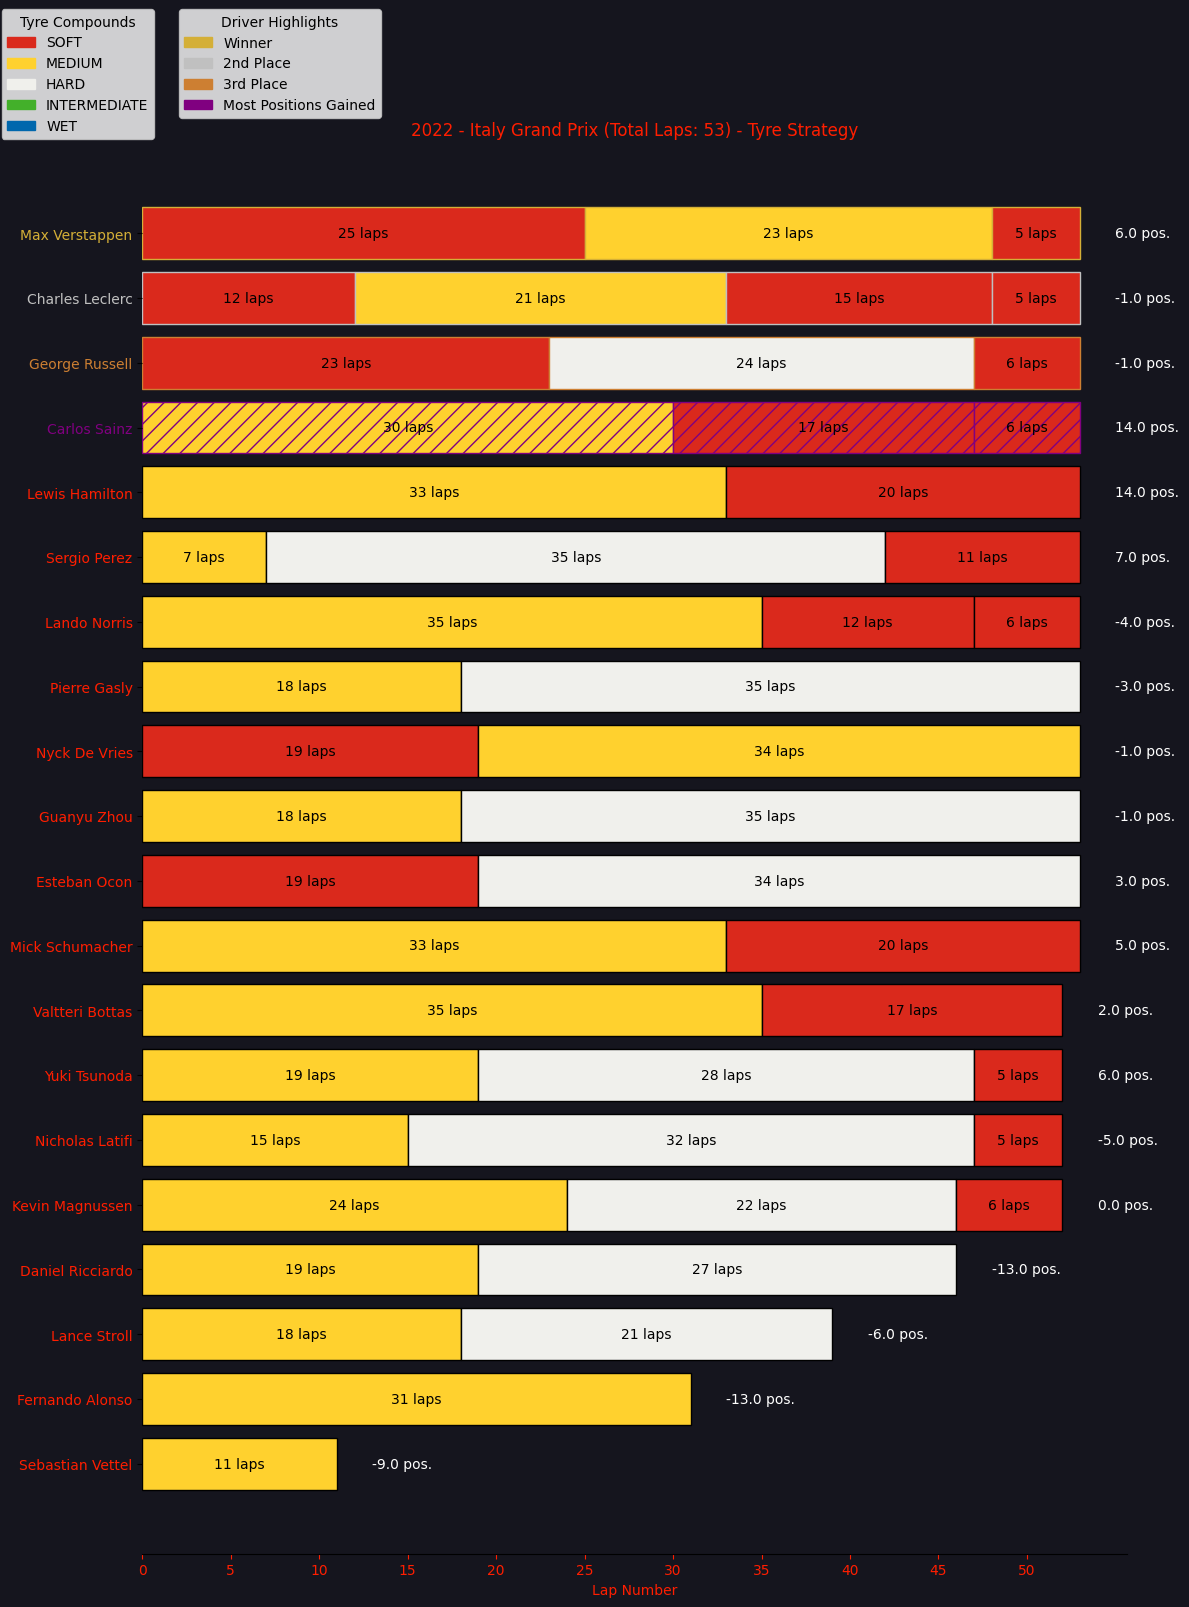

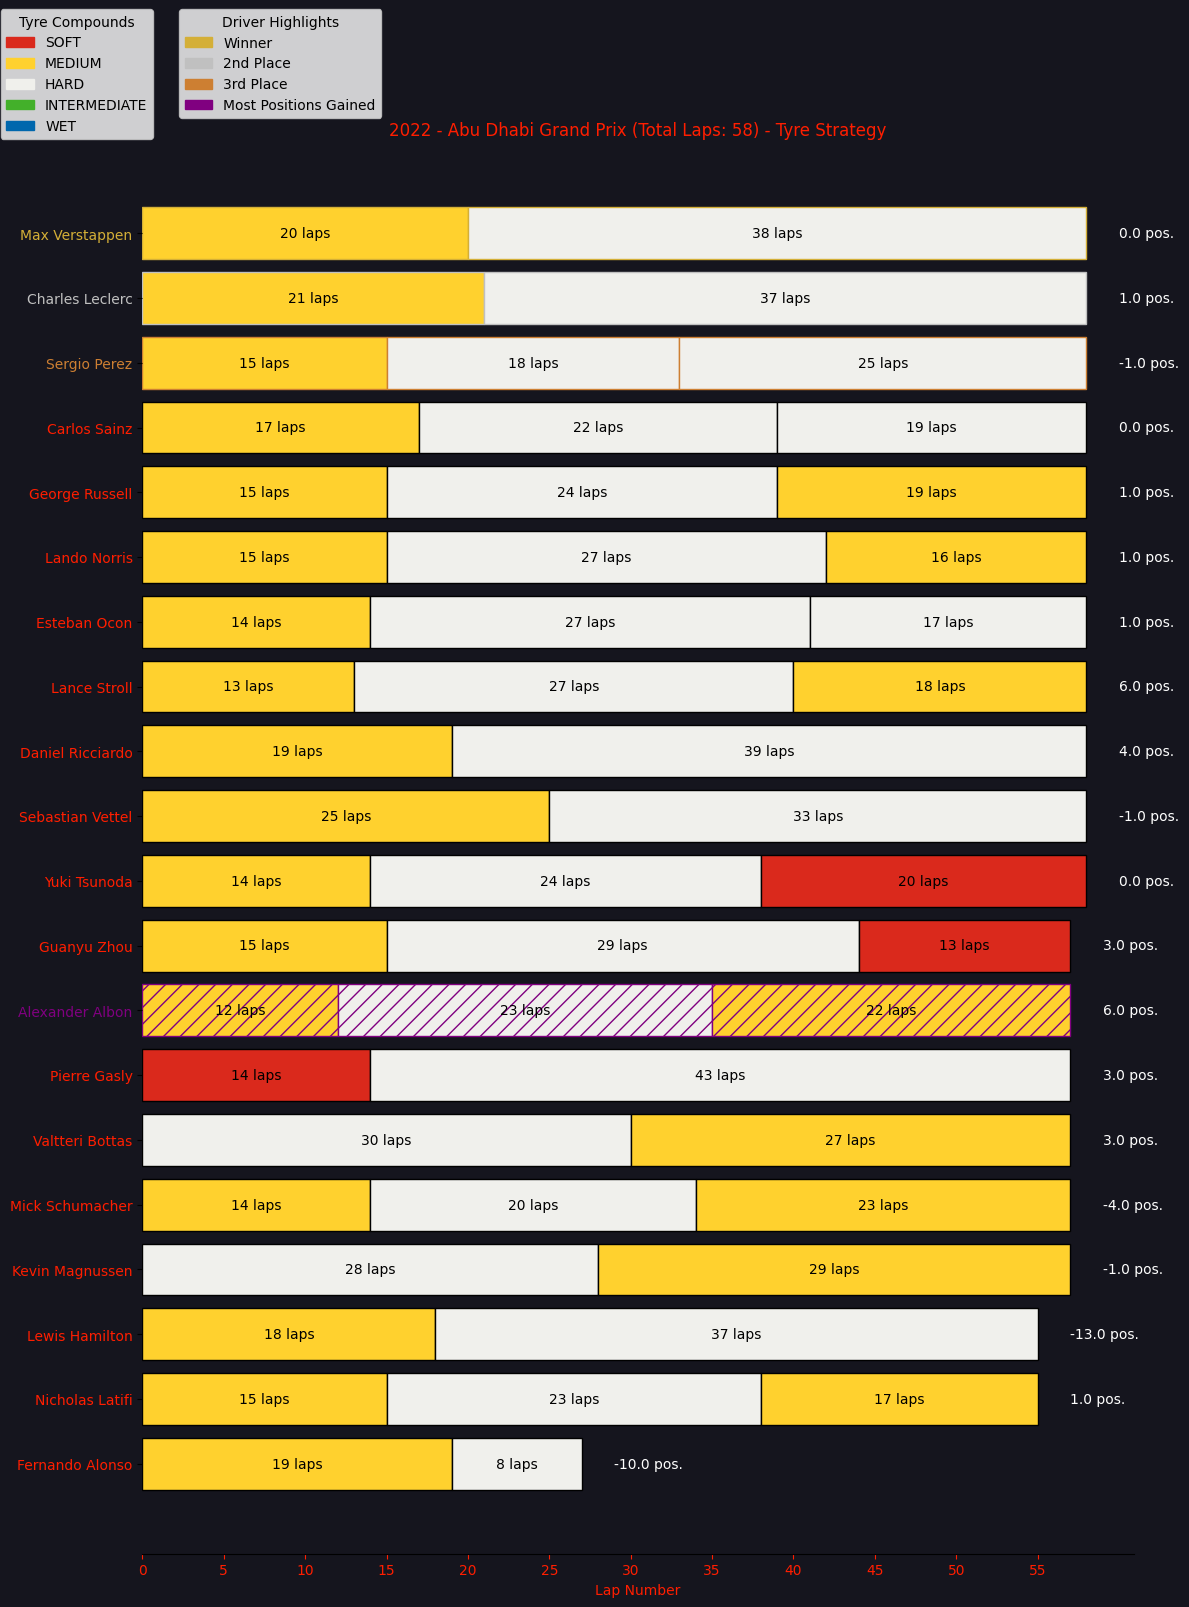

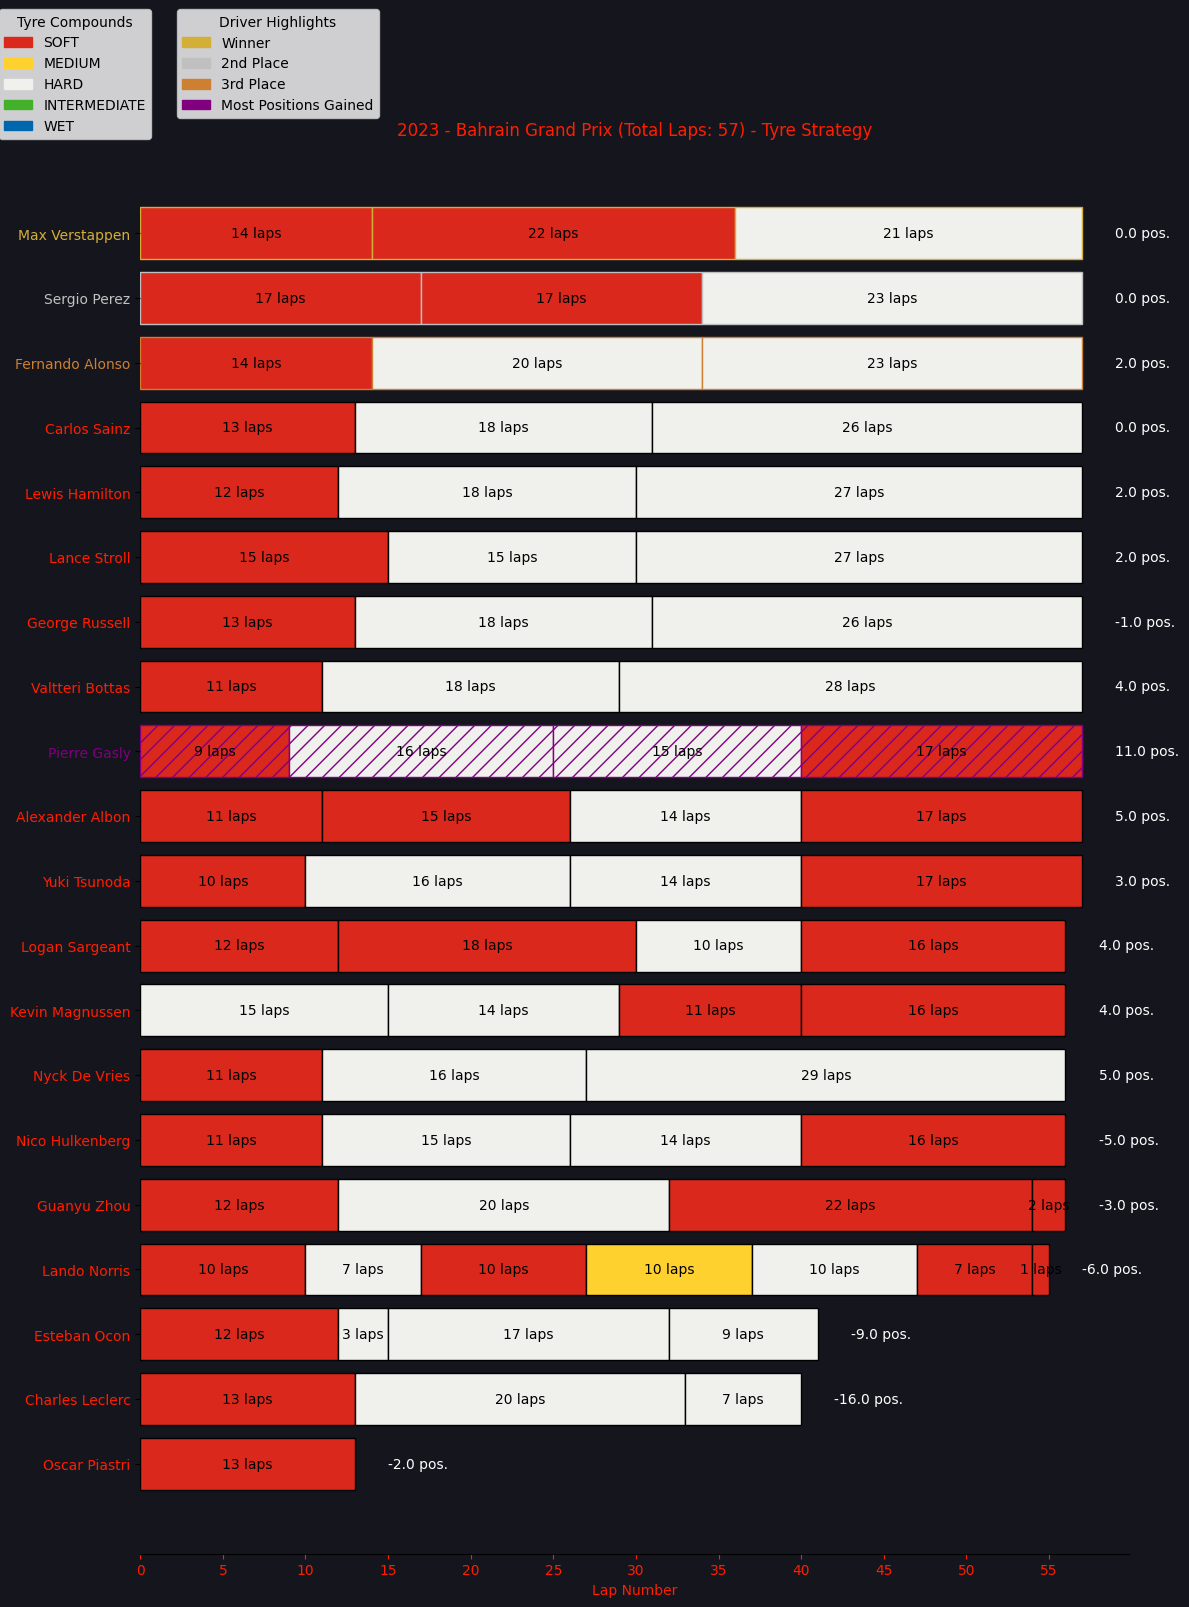

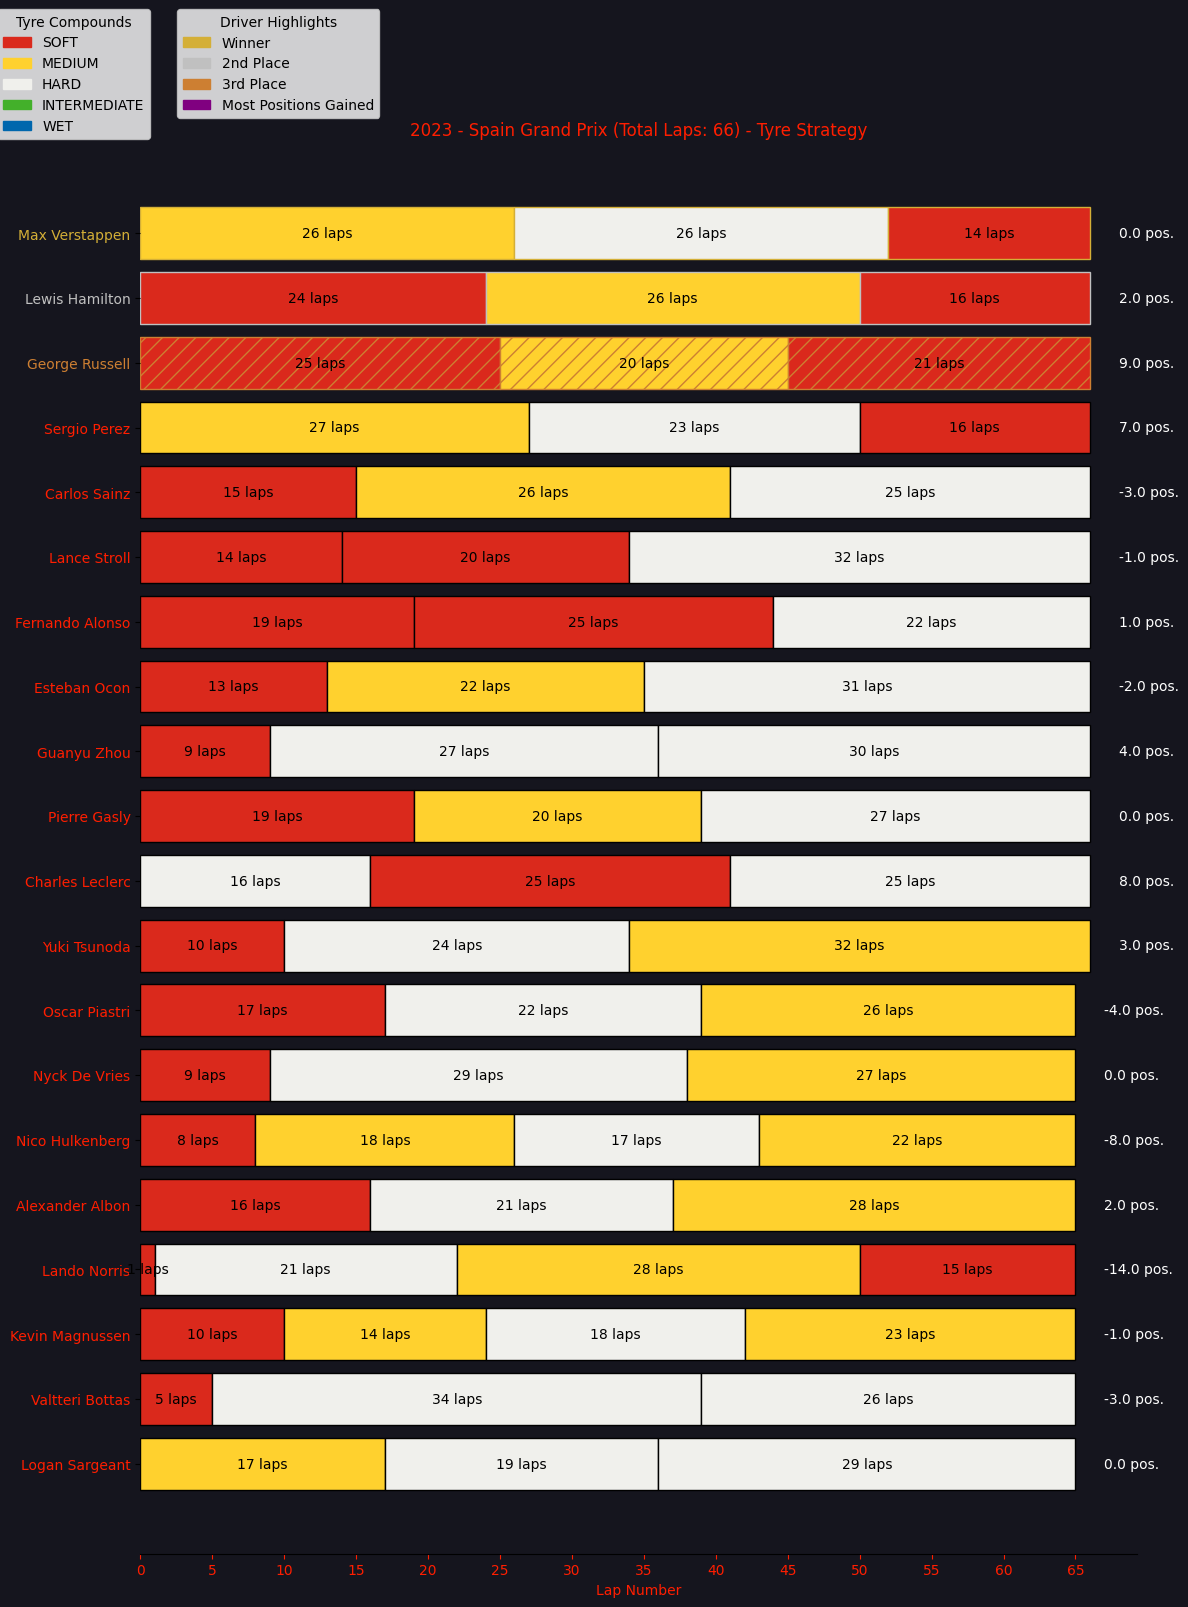

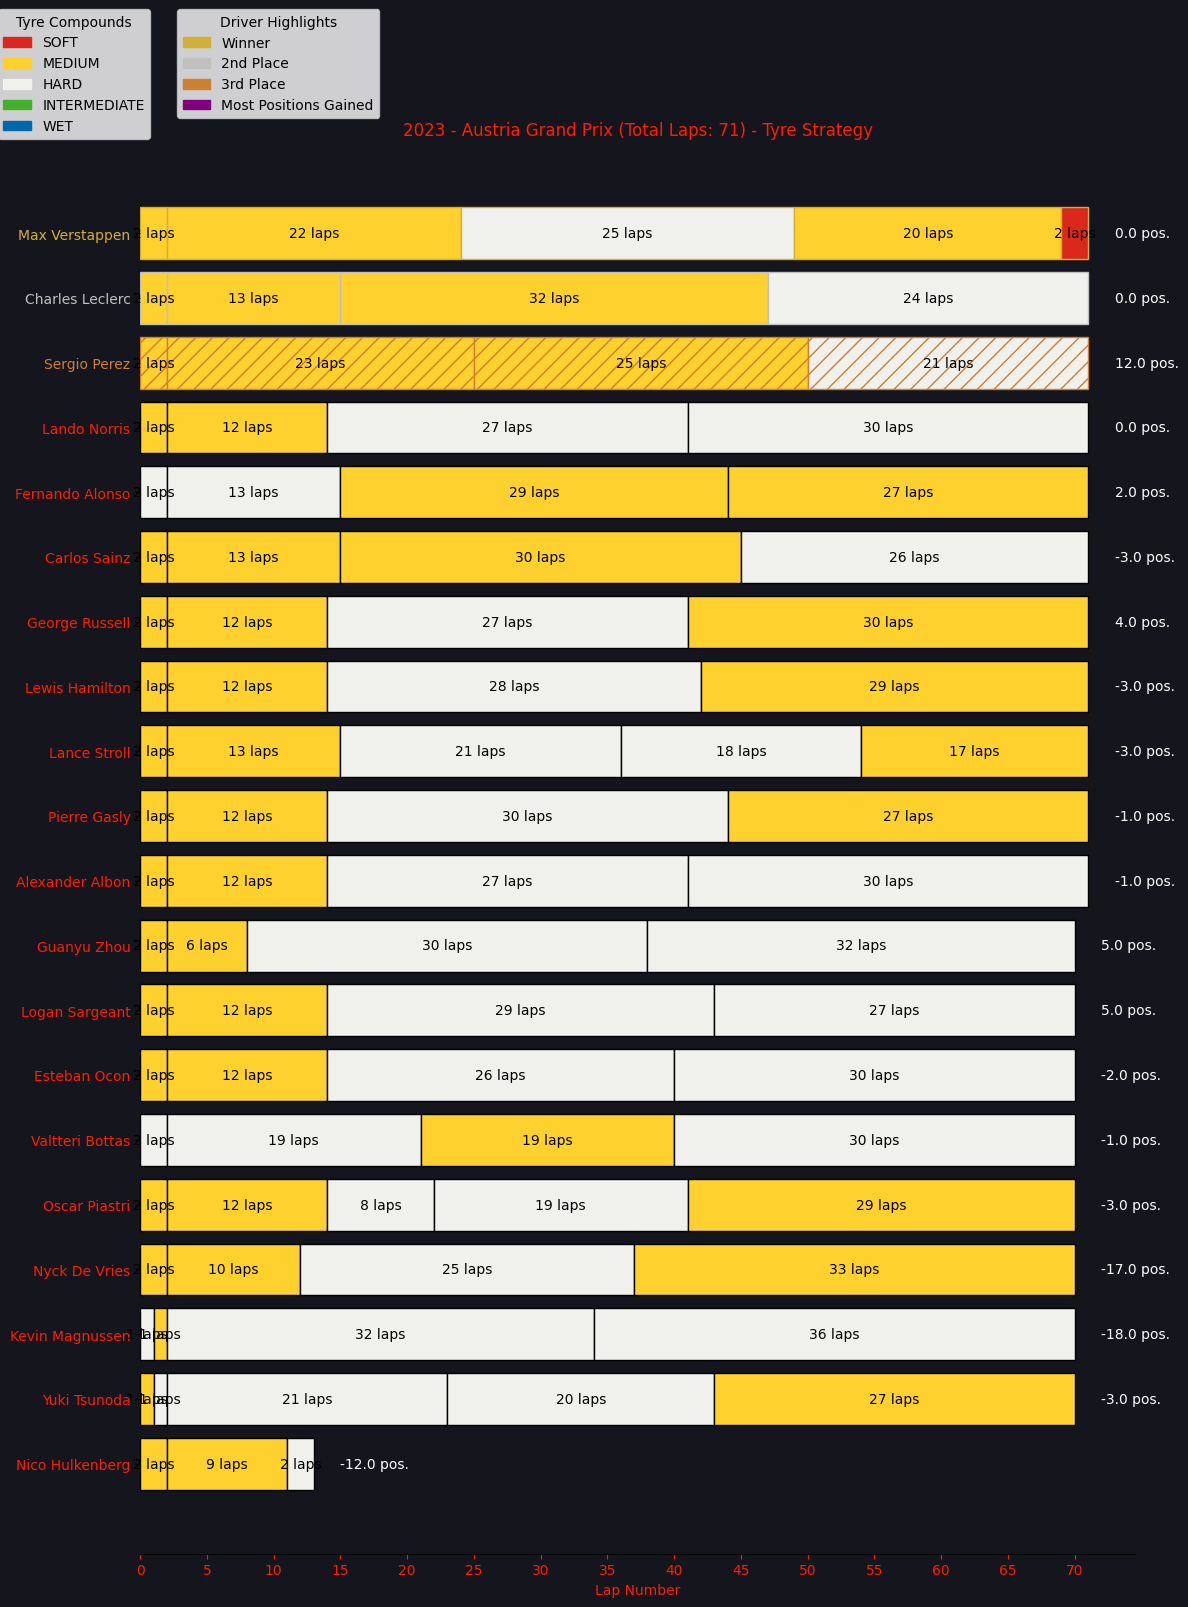

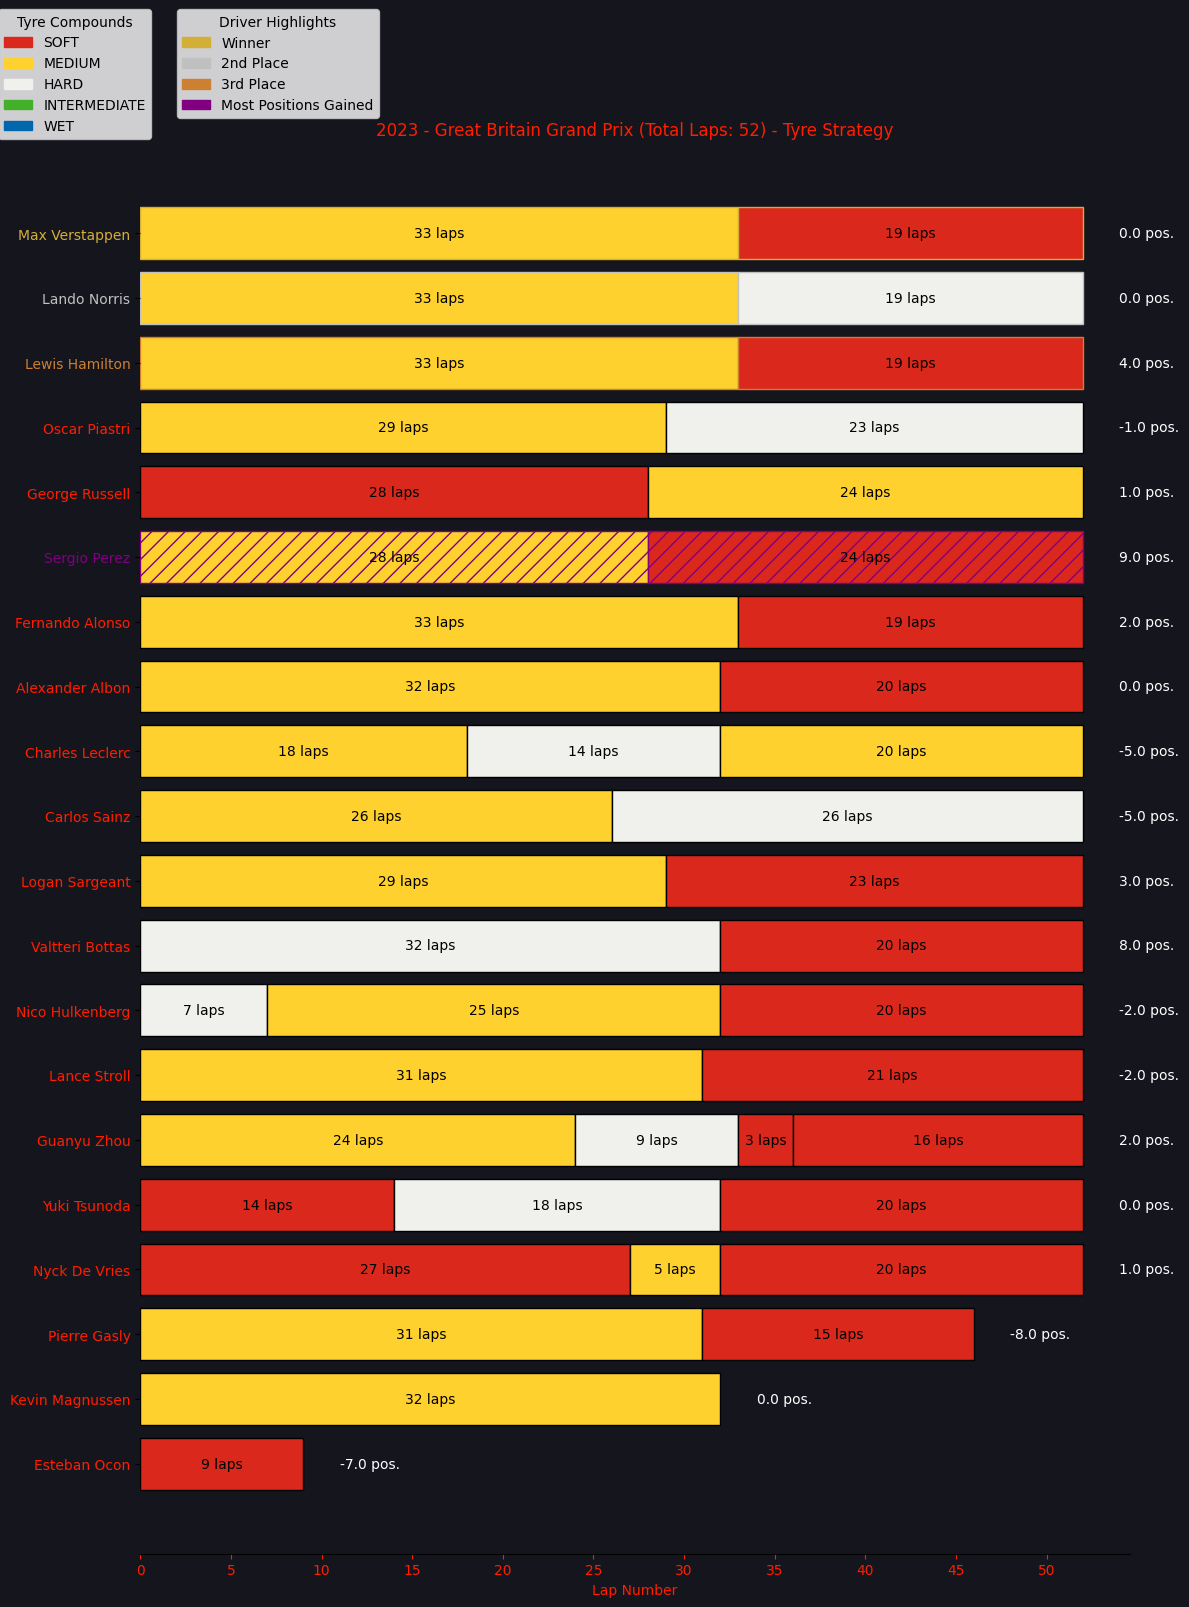

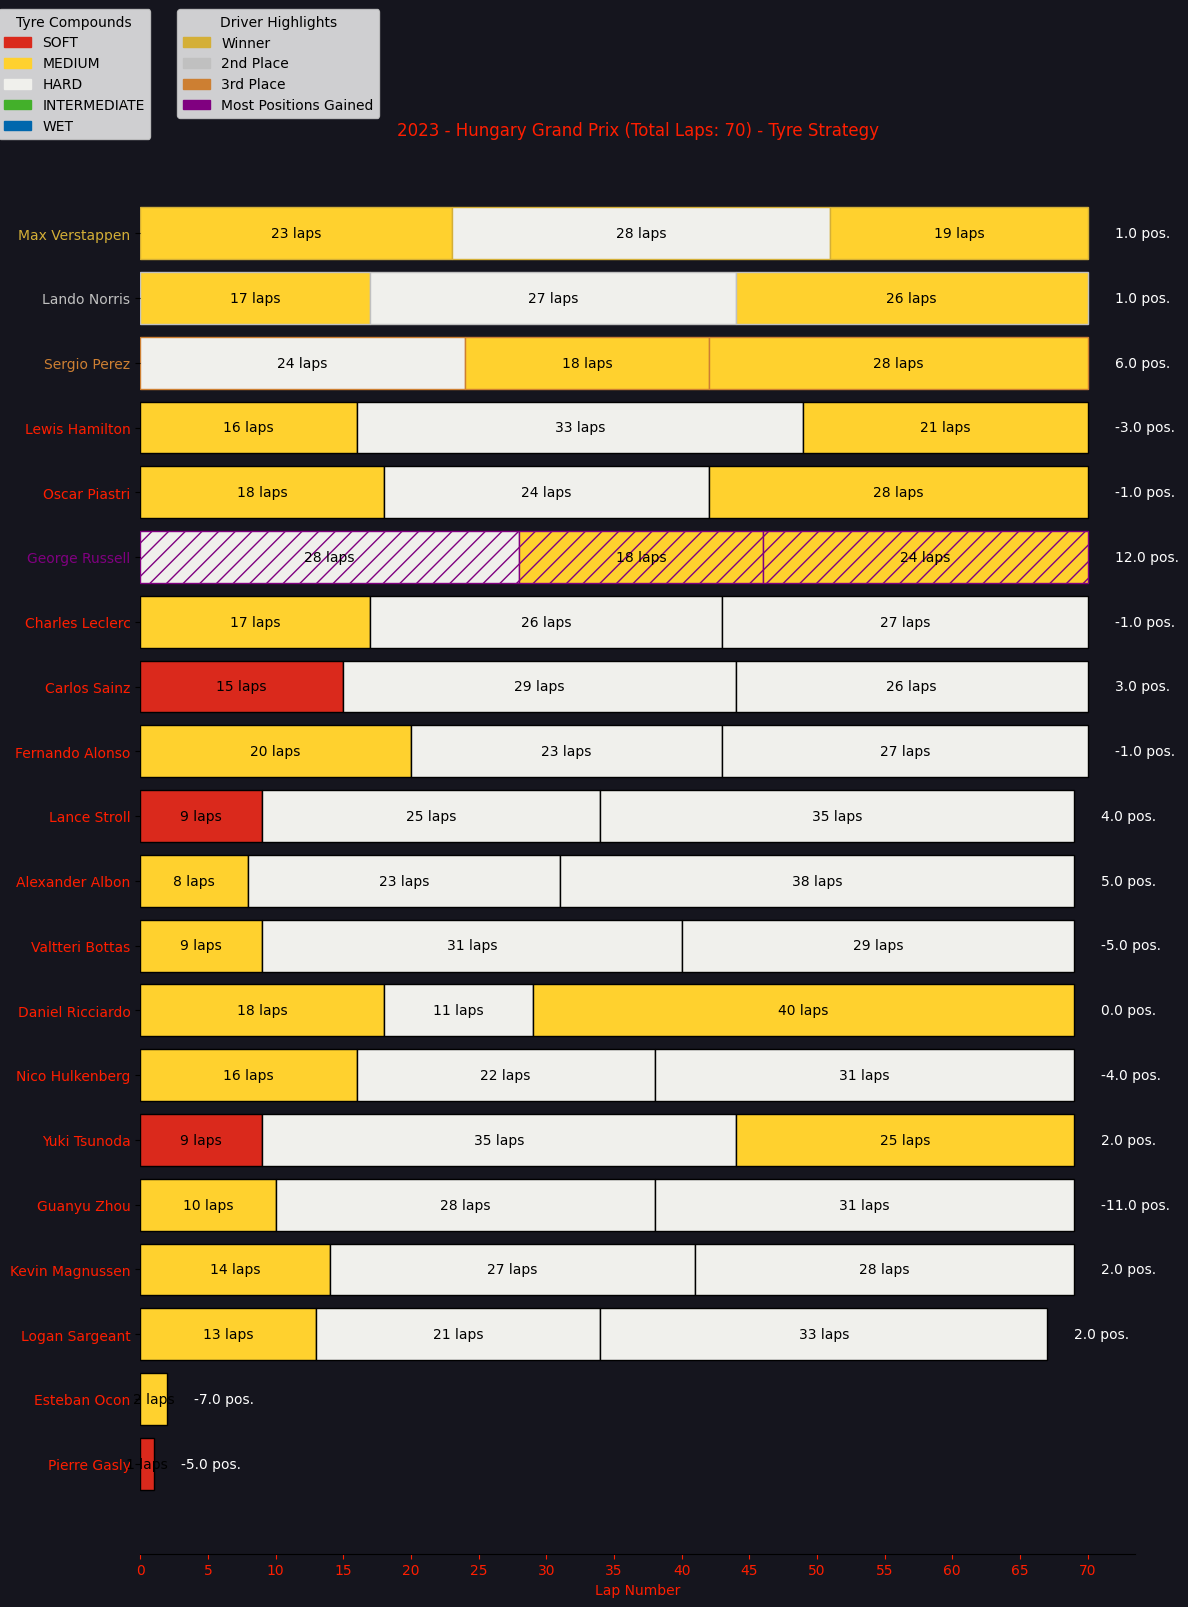

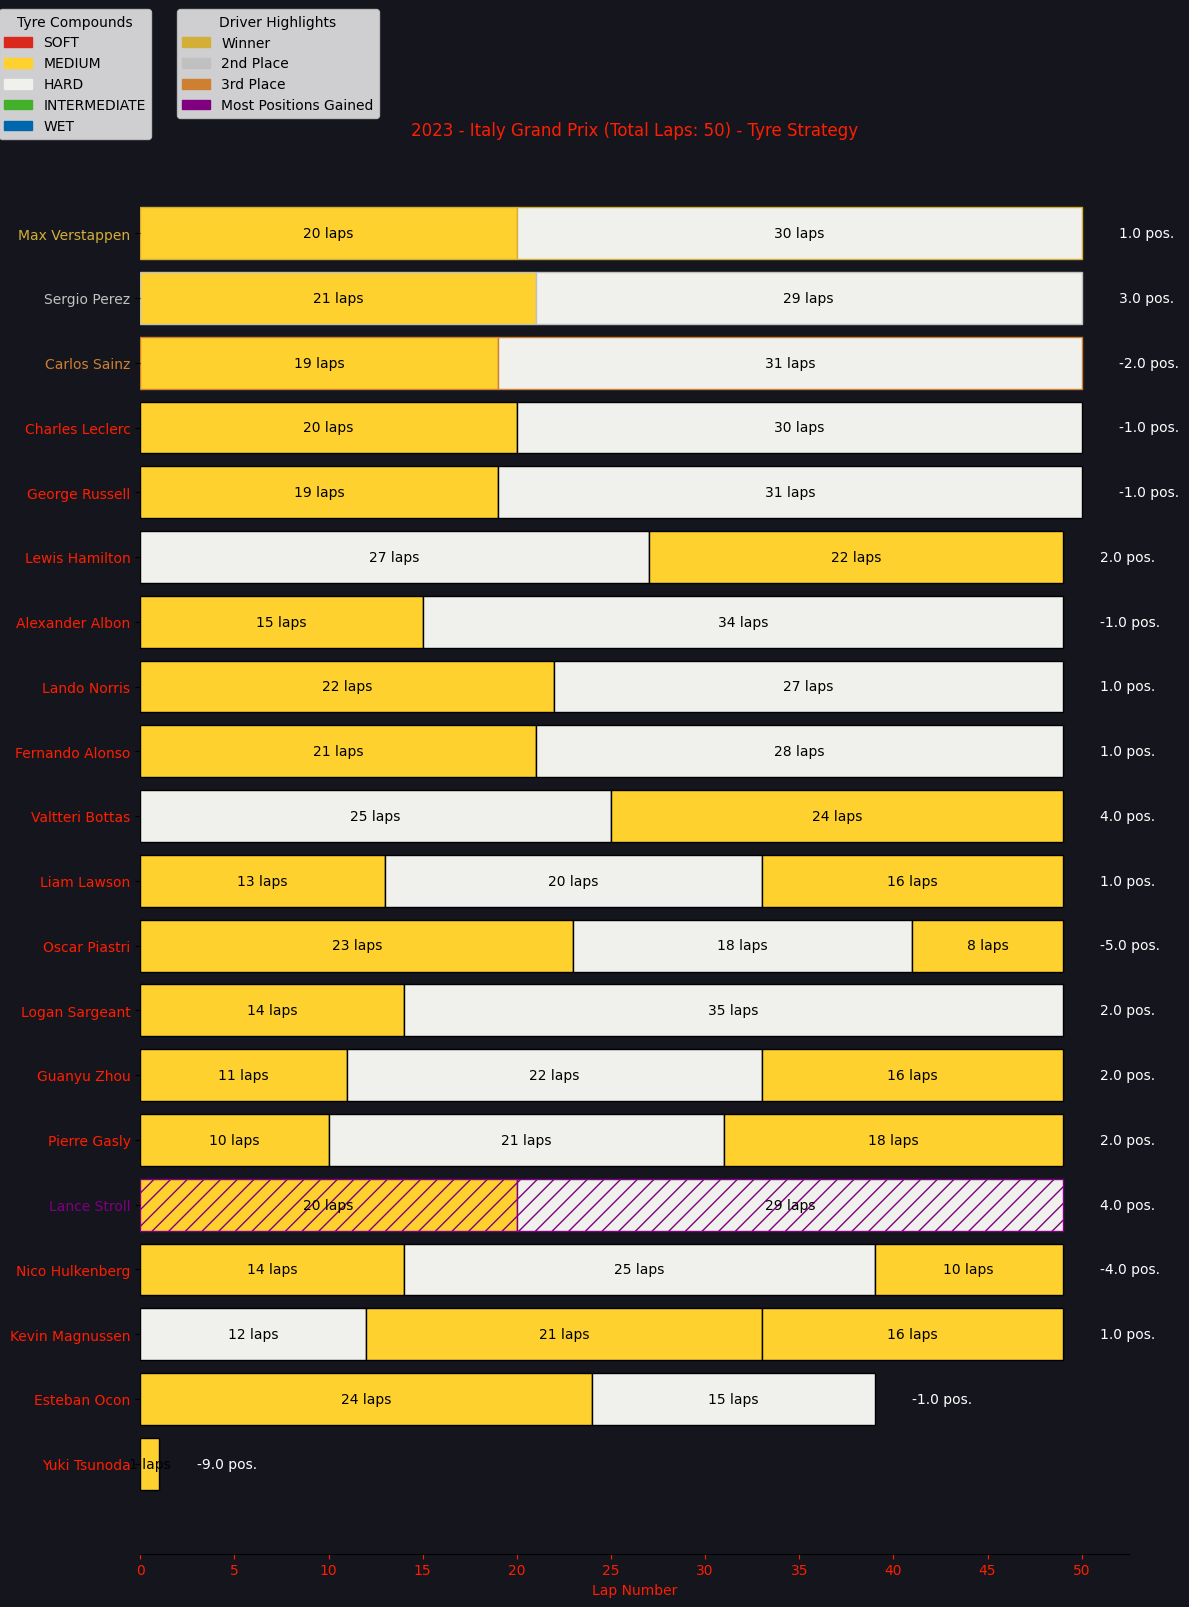

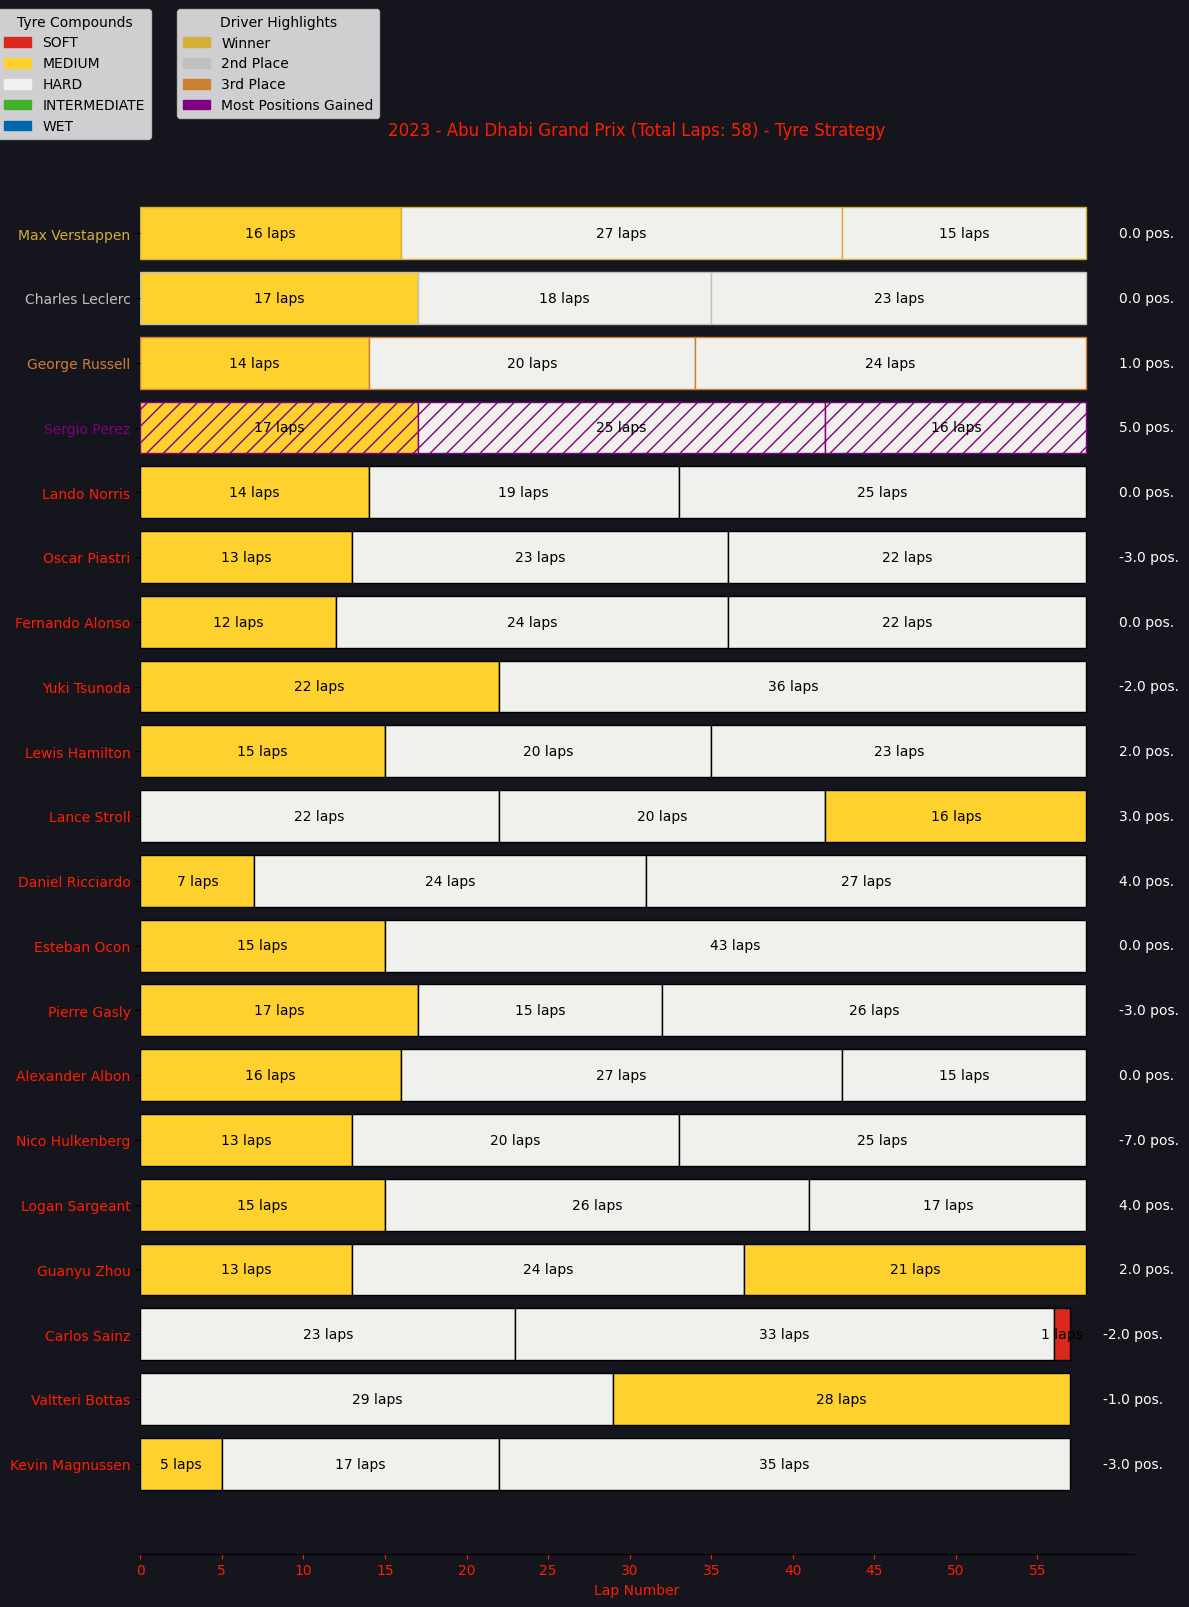

In [397]:
years = [2019, 2020, 2021, 2022, 2023]
countries = ['Bahrain', 'Spain', 'Austria', 'Great Britain', 'Hungary', 'Italy', 'Abu Dhabi']

for year in years:
    for country in countries:
            get_tyre_strategy_by_year_and_country(df_barras, year, country)

### Gráfico de barras segmentados dos pilotos com os melhores desempenhos para determinado circuito

In [7]:
def plot_best_drivers_strategy(df, country):
    # Anos que vamos analisar
    years = [2019, 2020, 2021, 2022, 2023]
    
    # Dicionário para armazenar as melhores informações de cada ano
    best_drivers = {}
    fig, ax = plt.subplots(figsize=(16, 9), facecolor='#15151E')
    
    compound_colors = {
        'SOFT': '#da291c',
        'MEDIUM': '#ffd12e',
        'HARD': '#f0f0ec',
        'INTERMEDIATE': '#43b02a',
        'WET': '#0067ad'
    }
    
    bar_positions = []

    for year in years:
        # Filtrar dados pelo ano e país
        yearly_data = df[(df['Year'] == year) & (df['Country'] == country)]
        
        if yearly_data.empty:
            continue
        
        # Calcular o número de posições ganhas por piloto
        position_changes = yearly_data.groupby('FullName').apply(
            lambda g: g['GridPosition'].iloc[0] - g['FinalPosition'].iloc[-1], include_groups=False)
        
        # Encontrar o piloto com o máximo de posições ganhas
        max_positions_gained = position_changes.max()
        top_drivers = position_changes[position_changes == max_positions_gained].index.tolist()
        best_drivers[year] = (top_drivers, max_positions_gained)
    
        for driver in best_drivers.get(year, [[], 0])[0]:
            driver_data = df[(df['Year'] == year) & (df['Country'] == country) & (df['FullName'] == driver)]
            
            stints = driver_data[["FullName", "Stint", "Compound", "LapNumber"]]
            stints = stints.groupby(["FullName", "Stint", "Compound"]).count().reset_index()
            stints = stints.rename(columns={"LapNumber": "StintLength"})
            
            previous_stint_end = 0
            for idx, row in stints.iterrows():
                bars = plt.barh(
                    y=f'{driver} ({year})',
                    width=row["StintLength"],
                    left=previous_stint_end,
                    color=compound_colors[row['Compound']],
                    edgecolor='white'
                )

                ax.text(
                    previous_stint_end + row["StintLength"] / 2,
                    f'{driver} ({year})',
                    f'{row["StintLength"]} laps',
                    va='center',
                    ha='center',
                    color='black',
                    fontsize=10
                )

                previous_stint_end += row["StintLength"]

            ax.text(
                previous_stint_end + 1,
                f'{driver} ({year})',
                f'{best_drivers[year][1]} pos.',
                va='center',
                color='white',
                fontsize=10
            )
            
            bar_positions.append(f'{driver} ({year})')
    
    # Adicionar a legenda dos pneus
    tyre_legend = [
        mpatches.Patch(color=compound_colors['SOFT'], label='SOFT'),
        mpatches.Patch(color=compound_colors['MEDIUM'], label='MEDIUM'),
        mpatches.Patch(color=compound_colors['HARD'], label='HARD'),
        mpatches.Patch(color=compound_colors['INTERMEDIATE'], label='INTERMEDIATE'),
        mpatches.Patch(color=compound_colors['WET'], label='WET')
    ]
    plt.legend(handles=tyre_legend, title="Tyre Compounds", loc='upper left', bbox_to_anchor=(-0.15, 1.1))
    
    plt.title(f'Most Efficient Drivers - Tyre Strategy (2019-2023) - {country} Grand Prix', color='white')
    plt.xlabel('Lap Number', color='#FF1E00')
    plt.ylabel('Driver (Year)', color='#FF1E00')
    
    ax.set_facecolor('#15151E')
    ax.tick_params(axis='x', colors='#FF1E00')  # Cor dos números no eixo X
    ax.tick_params(axis='y', colors='#FF1E00')  # Cor dos números no eixo Y
    plt.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#FF1E00')
    ax.spines['bottom'].set_linewidth(2)
    
    plt.tight_layout()
    plt.show()


### Plotando os gráficos de todas as corridas

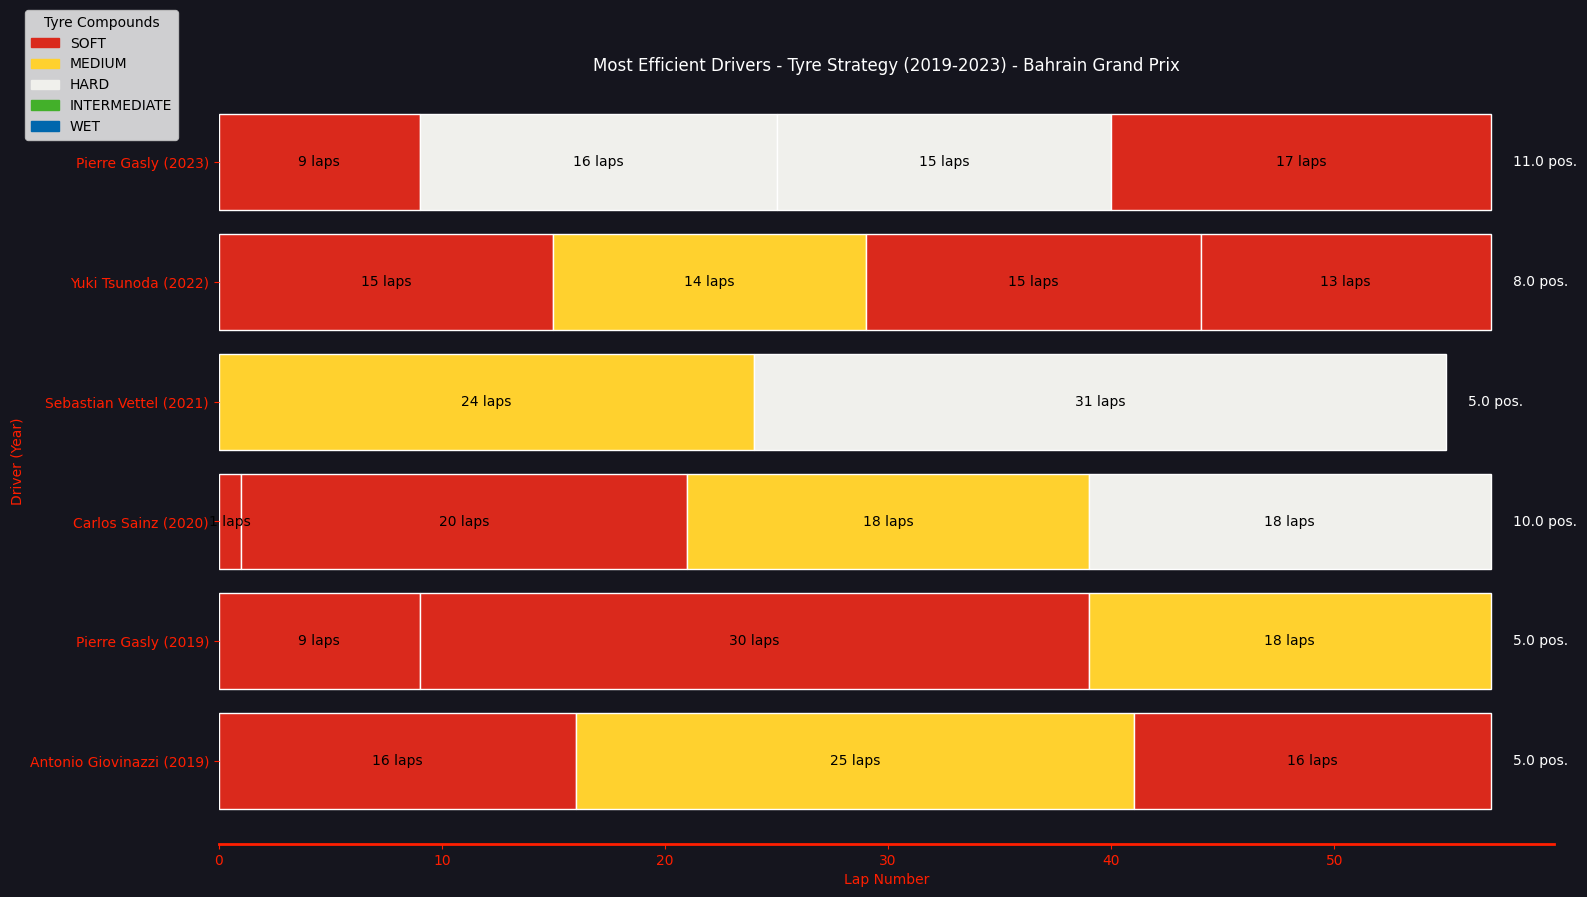

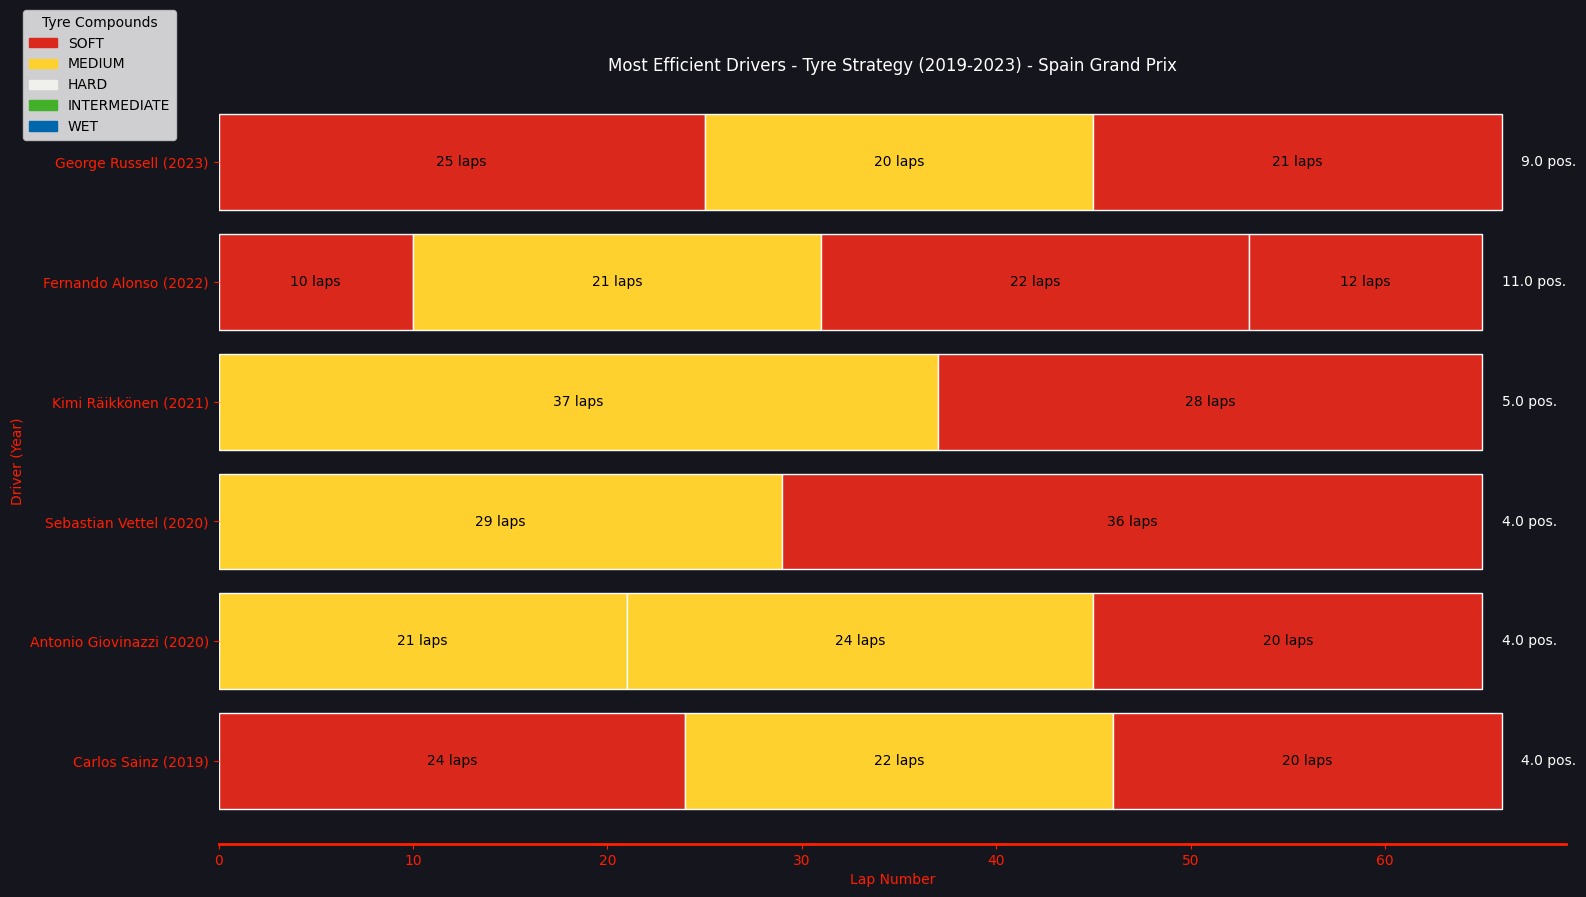

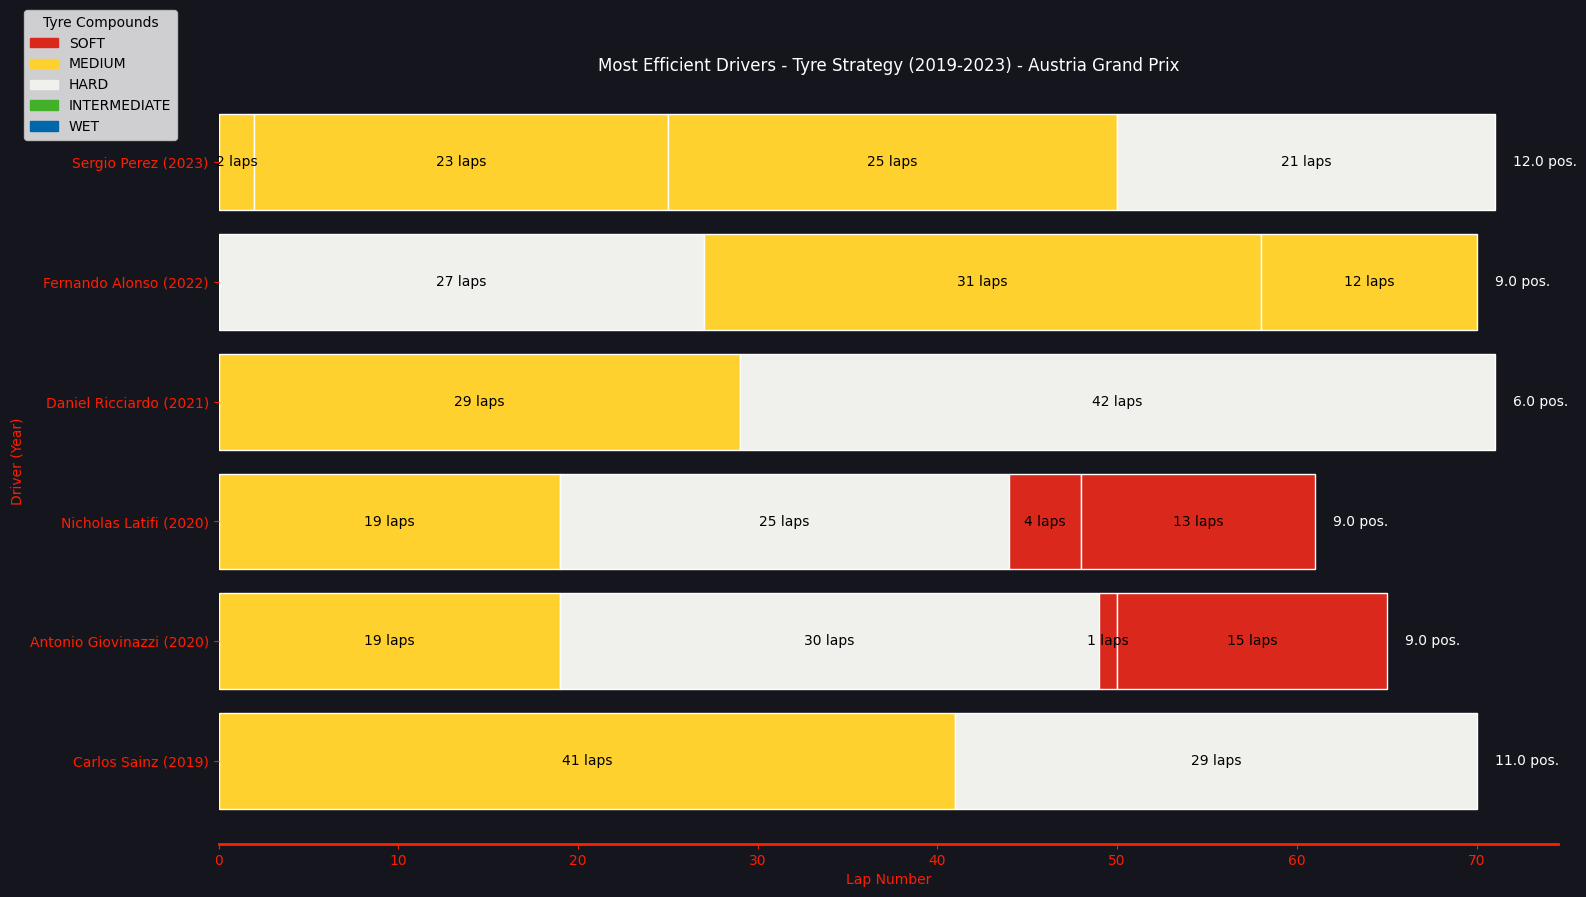

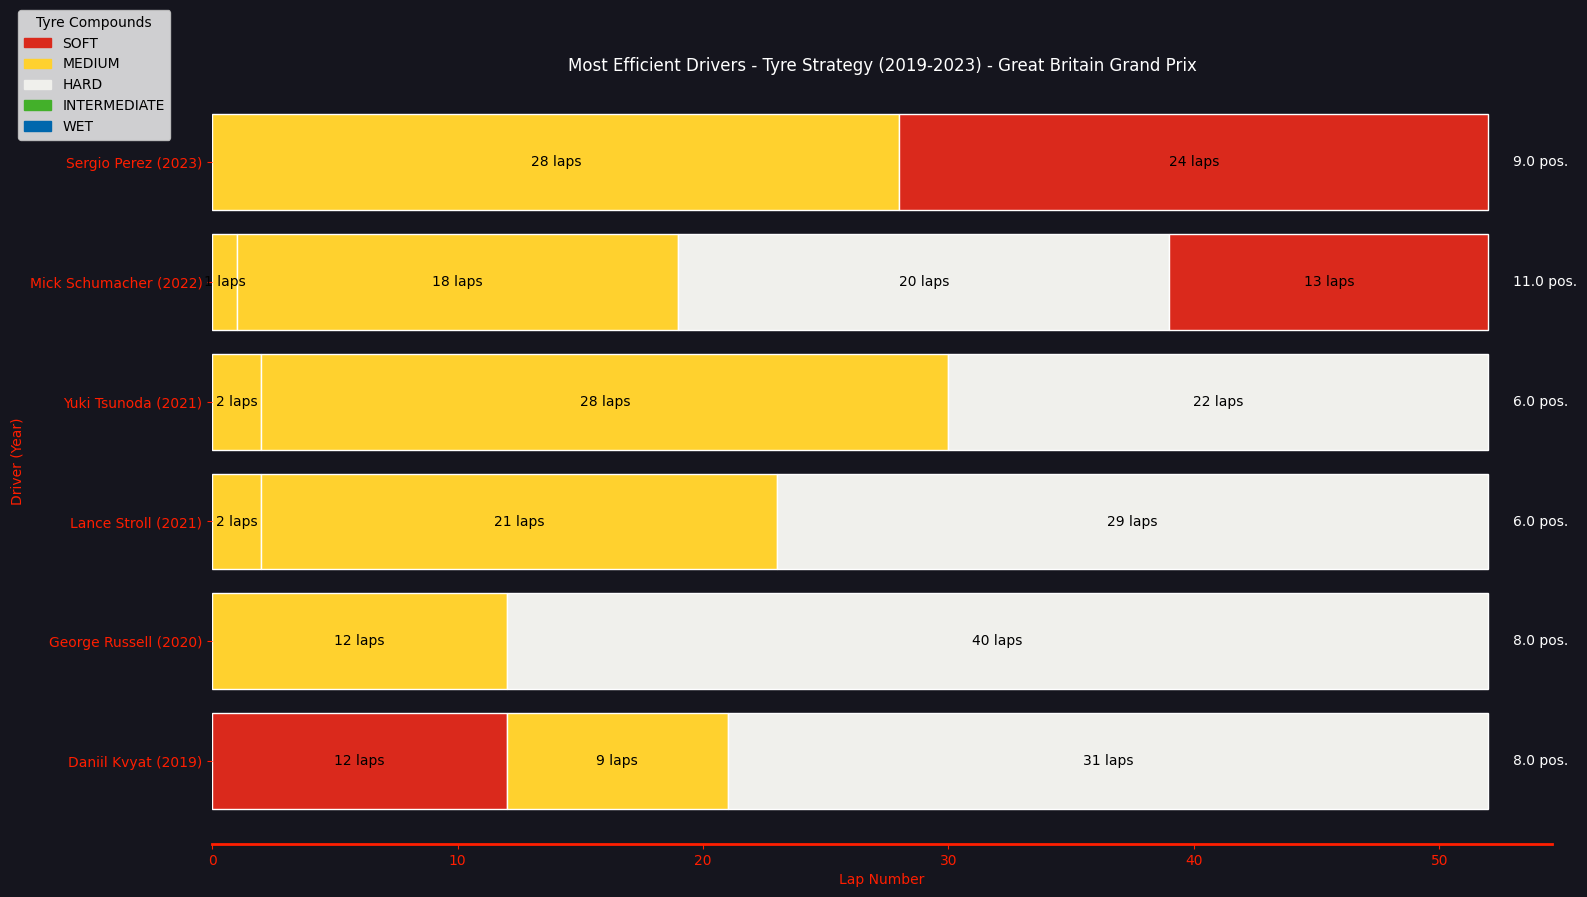

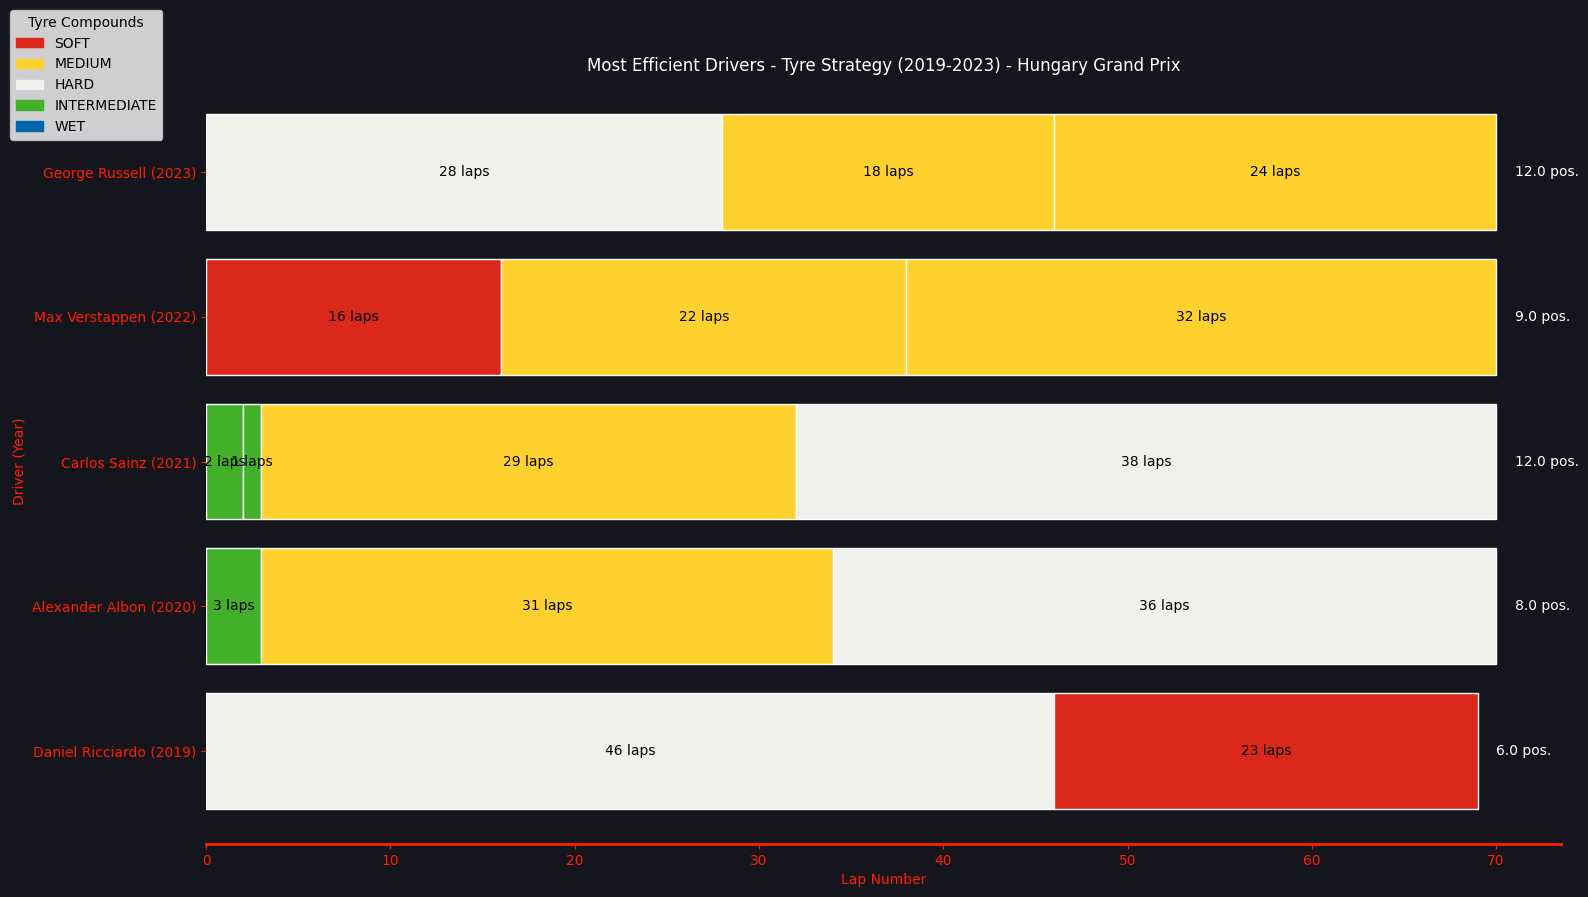

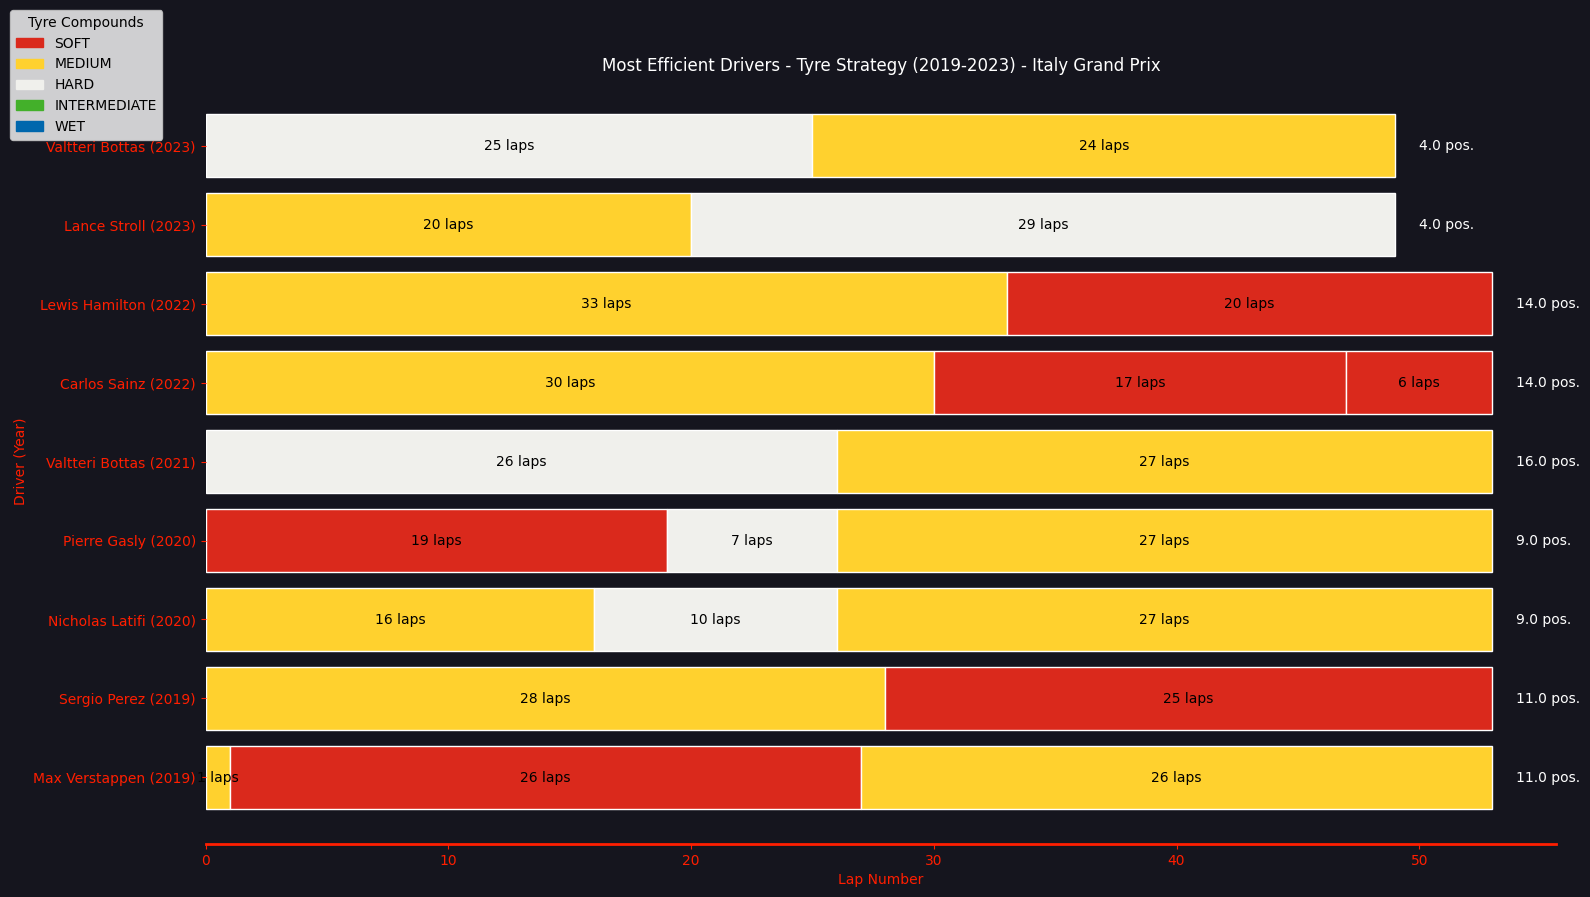

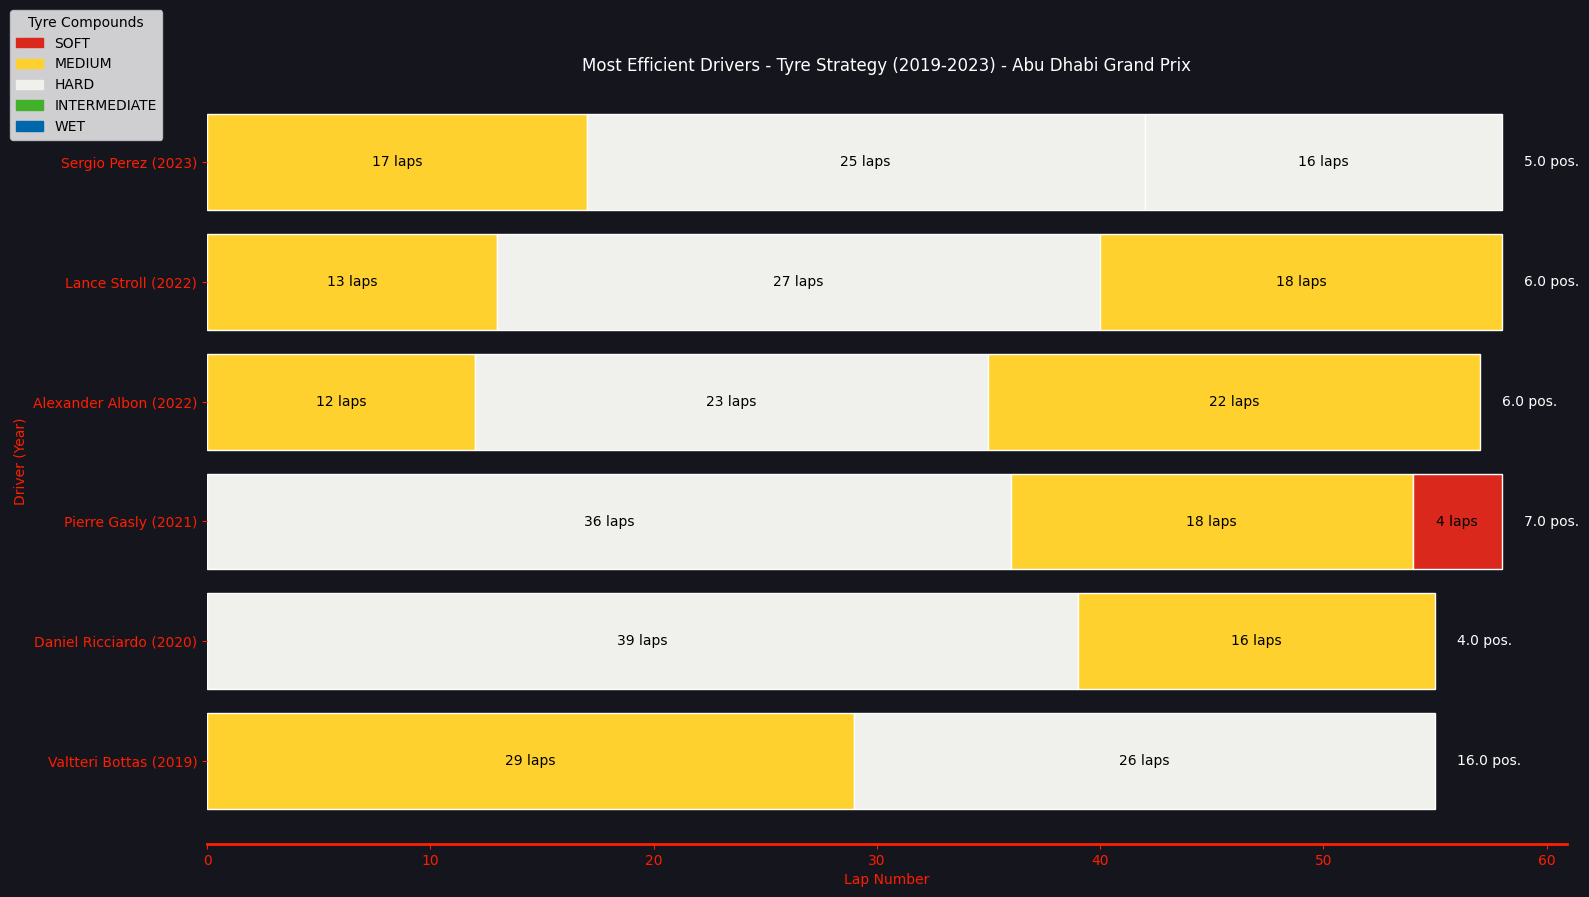

In [8]:
countries = ['Bahrain', 'Spain', 'Austria', 'Great Britain', 'Hungary', 'Italy', 'Abu Dhabi']

for country in countries:
    plot_best_drivers_strategy(df_barras, country)